# The Resources used for a web application

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
%matplotlib notebook
#calling it a second time may prevent some graphics errors
%matplotlib notebook  
import matplotlib.pyplot as plt

In [5]:
import numpy as np
import pandas as pd
from skmultiflow.data import DataStream

## Preprocessing

In [6]:
data = pd.read_excel("Data//data.xlsx")
data.head()

Column 2    Column 3                         Column 4  \
0  Timestamp [ms];  CPU cores;  CPU capacity provisioned [MHZ];   
1      1376314846;          8;                    20799.996928;   
2      1376315146;          8;                    20799.996928;   
3      1376315446;          8;                    20799.996928;   
4      1376315746;          8;                    20799.996928;   

             Column 5              Column 6  \
0    CPU usage [MHZ];        CPU usage [%];   
1  76.26665540266667;  0.36666666666666664;   
2  69.33332309333335;  0.33333333333333337;   
3  72.79998924799999;                 0.35;   
4  69.33332309333335;  0.33333333333333337;   

                            Column 7            Column 8  \
0  Memory capacity provisioned [KB];  Memory usage [KB];   
1                       3.3494804E7;           469761.6;   
2                       3.3494804E7;           178956.8;   
3                       3.3494804E7;                0.0;   
4                       3.3494804E7;            89478.4;   

                       Column 9                      Column 10  \
0  Disk read throughput [KB/s];  Disk write throughput [KB/s];   
1                          0.0;             2.066666666666667;   
2          0.06666666666666667;            1.1333333333333333;   
3                          0.0;            0.9333333333333333;   
4                          0.0;            0.9333333333333333;   

                             Column 11                              Column 12  
0  Network received throughput [KB/s];  Network transmitted throughput [KB/s]  
1                                 0.0;                     1.5333333333333334  
2                                 0.0;                                    1.0  
3                                 0.0;                                    1.0  
4                                 0.0;                                    1.0

In [7]:
# Remove ; from the columns
for i in range(2,13):
    data['Column '+ str(i)] = data['Column '+ str(i)].str.replace(';', '')
data.head()

Column 2   Column 3                        Column 4  \
0  Timestamp [ms]  CPU cores  CPU capacity provisioned [MHZ]   
1      1376314846          8                    20799.996928   
2      1376315146          8                    20799.996928   
3      1376315446          8                    20799.996928   
4      1376315746          8                    20799.996928   

            Column 5             Column 6                          Column 7  \
0    CPU usage [MHZ]        CPU usage [%]  Memory capacity provisioned [KB]   
1  76.26665540266667  0.36666666666666664                       3.3494804E7   
2  69.33332309333335  0.33333333333333337                       3.3494804E7   
3  72.79998924799999                 0.35                       3.3494804E7   
4  69.33332309333335  0.33333333333333337                       3.3494804E7   

            Column 8                     Column 9  \
0  Memory usage [KB]  Disk read throughput [KB/s]   
1           469761.6                          0.0   
2           178956.8          0.06666666666666667   
3                0.0                          0.0   
4            89478.4                          0.0   

                      Column 10                           Column 11  \
0  Disk write throughput [KB/s]  Network received throughput [KB/s]   
1             2.066666666666667                                 0.0   
2            1.1333333333333333                                 0.0   
3            0.9333333333333333                                 0.0   
4            0.9333333333333333                                 0.0   

                               Column 12  
0  Network transmitted throughput [KB/s]  
1                     1.5333333333333334  
2                                    1.0  
3                                    1.0  
4                                    1.0

In [8]:
names_cols = data.loc[0,:]
names_cols[0] = "Timestamp [s]"
print(names_cols)

Column 2                             Timestamp [s]
Column 3                                 CPU cores
Column 4            CPU capacity provisioned [MHZ]
Column 5                           CPU usage [MHZ]
Column 6                             CPU usage [%]
Column 7          Memory capacity provisioned [KB]
Column 8                         Memory usage [KB]
Column 9               Disk read throughput [KB/s]
Column 10             Disk write throughput [KB/s]
Column 11       Network received throughput [KB/s]
Column 12    Network transmitted throughput [KB/s]
Name: 0, dtype: object


In [9]:
names_cols = data.loc[0,:]
data.columns = names_cols
data.head()

0  Timestamp [s]  CPU cores  CPU capacity provisioned [MHZ]  \
0  Timestamp [s]  CPU cores  CPU capacity provisioned [MHZ]   
1     1376314846          8                    20799.996928   
2     1376315146          8                    20799.996928   
3     1376315446          8                    20799.996928   
4     1376315746          8                    20799.996928   

0    CPU usage [MHZ]        CPU usage [%]  Memory capacity provisioned [KB]  \
0    CPU usage [MHZ]        CPU usage [%]  Memory capacity provisioned [KB]   
1  76.26665540266667  0.36666666666666664                       3.3494804E7   
2  69.33332309333335  0.33333333333333337                       3.3494804E7   
3  72.79998924799999                 0.35                       3.3494804E7   
4  69.33332309333335  0.33333333333333337                       3.3494804E7   

0  Memory usage [KB]  Disk read throughput [KB/s]  \
0  Memory usage [KB]  Disk read throughput [KB/s]   
1           469761.6                          0.0   
2           178956.8          0.06666666666666667   
3                0.0                          0.0   
4            89478.4                          0.0   

0  Disk write throughput [KB/s]  Network received throughput [KB/s]  \
0  Disk write throughput [KB/s]  Network received throughput [KB/s]   
1             2.066666666666667                                 0.0   
2            1.1333333333333333                                 0.0   
3            0.9333333333333333                                 0.0   
4            0.9333333333333333                                 0.0   

0  Network transmitted throughput [KB/s]  
0  Network transmitted throughput [KB/s]  
1                     1.5333333333333334  
2                                    1.0  
3                                    1.0  
4                                    1.0

In [10]:
data = data.drop(0)
data.reset_index(drop=True, inplace=True)
data.head()

0 Timestamp [s] CPU cores CPU capacity provisioned [MHZ]    CPU usage [MHZ]  \
0    1376314846         8                   20799.996928  76.26665540266667   
1    1376315146         8                   20799.996928  69.33332309333335   
2    1376315446         8                   20799.996928  72.79998924799999   
3    1376315746         8                   20799.996928  69.33332309333335   
4    1376316046         8                   20799.996928  71.06665617066666   

0        CPU usage [%] Memory capacity provisioned [KB] Memory usage [KB]  \
0  0.36666666666666664                      3.3494804E7          469761.6   
1  0.33333333333333337                      3.3494804E7          178956.8   
2                 0.35                      3.3494804E7               0.0   
3  0.33333333333333337                      3.3494804E7           89478.4   
4   0.3416666666666666                      3.3494804E7           67108.8   

0 Disk read throughput [KB/s] Disk write throughput [KB/s]  \
0                         0.0            2.066666666666667   
1         0.06666666666666667           1.1333333333333333   
2                         0.0           0.9333333333333333   
3                         0.0           0.9333333333333333   
4                         0.0           1.1333333333333333   

0 Network received throughput [KB/s] Network transmitted throughput [KB/s]  
0                                0.0                    1.5333333333333334  
1                                0.0                                   1.0  
2                                0.0                                   1.0  
3                                0.0                                   1.0  
4                                0.0                                   1.0

In [11]:
num_cols = len(data.columns)
num_rows = data.shape[0]

In [12]:
# Put correctly the type of each column
data['Timestamp [s]'] = data['Timestamp [s]'].astype(int)
names_cols = data.columns[1:]

for i in names_cols:
    data[i] = data[i].astype(float)
print (data.dtypes)

0
Timestamp [s]                              int32
CPU cores                                float64
CPU capacity provisioned [MHZ]           float64
CPU usage [MHZ]                          float64
CPU usage [%]                            float64
Memory capacity provisioned [KB]         float64
Memory usage [KB]                        float64
Disk read throughput [KB/s]              float64
Disk write throughput [KB/s]             float64
Network received throughput [KB/s]       float64
Network transmitted throughput [KB/s]    float64
dtype: object


In [13]:
data.describe(include='all')

0      Timestamp [s]  CPU cores  CPU capacity provisioned [MHZ]  \
count   8.617000e+03     8617.0                     8617.000000   
mean    1.377609e+09        8.0                    20799.994481   
std     7.483886e+05        0.0                        0.001436   
min     1.376315e+09        8.0                    20799.991888   
25%     1.376961e+09        8.0                    20799.994304   
50%     1.377609e+09        8.0                    20799.994440   
75%     1.378256e+09        8.0                    20799.994560   
max     1.378907e+09        8.0                    20799.997080   

0      CPU usage [MHZ]  CPU usage [%]  Memory capacity provisioned [KB]  \
count      8617.000000    8617.000000                      8.617000e+03   
mean       9576.266977      46.039757                      3.352555e+07   
std        9931.301050      47.746652                      2.983508e+04   
min          68.714267       0.330357                      3.338624e+07   
25%         103.999973       0.500000                      3.349480e+07   
50%        3189.332491      15.333333                      3.355443e+07   
75%       21241.994436     102.125000                      3.355443e+07   
max       22023.727412     105.883333                      3.355443e+07   

0      Memory usage [KB]  Disk read throughput [KB/s]  \
count       8.617000e+03                  8617.000000   
mean        3.606845e+06                     3.101477   
std         4.697524e+06                    28.445077   
min         0.000000e+00                     0.000000   
25%         2.236960e+04                     0.000000   
50%         1.655350e+06                     0.000000   
75%         5.368708e+06                     0.000000   
max         3.257017e+07                   806.133333   

0      Disk write throughput [KB/s]  Network received throughput [KB/s]  \
count                   8617.000000                         8617.000000   
mean                       2.182386                          159.979882   
std                       14.040082                          729.122682   
min                        0.333333                            0.000000   
25%                        0.733333                            0.000000   
50%                        0.866667                            0.066667   
75%                        1.400000                            0.533333   
max                     1075.466667                        10335.600000   

0      Network transmitted throughput [KB/s]  
count                            8617.000000  
mean                                4.233554  
std                                14.066608  
min                                 0.533333  
25%                                 1.000000  
50%                                 1.000000  
75%                                 1.133333  
max                               209.000000

In [14]:
# Create column of Date (Converting the timestamps to dates)
date = []
from datetime import datetime
for i in range(0, num_rows):
    timestamp = data['Timestamp [s]'][i]
    date.append(datetime.fromtimestamp(timestamp))
data.insert(0, "Date", date)
num_cols = len(data.columns)
data.head()

0                Date  Timestamp [s]  CPU cores  \
0 2013-08-12 15:40:46     1376314846        8.0   
1 2013-08-12 15:45:46     1376315146        8.0   
2 2013-08-12 15:50:46     1376315446        8.0   
3 2013-08-12 15:55:46     1376315746        8.0   
4 2013-08-12 16:00:46     1376316046        8.0   

0  CPU capacity provisioned [MHZ]  CPU usage [MHZ]  CPU usage [%]  \
0                    20799.996928        76.266655       0.366667   
1                    20799.996928        69.333323       0.333333   
2                    20799.996928        72.799989       0.350000   
3                    20799.996928        69.333323       0.333333   
4                    20799.996928        71.066656       0.341667   

0  Memory capacity provisioned [KB]  Memory usage [KB]  \
0                        33494804.0           469761.6   
1                        33494804.0           178956.8   
2                        33494804.0                0.0   
3                        33494804.0            89478.4   
4                        33494804.0            67108.8   

0  Disk read throughput [KB/s]  Disk write throughput [KB/s]  \
0                     0.000000                      2.066667   
1                     0.066667                      1.133333   
2                     0.000000                      0.933333   
3                     0.000000                      0.933333   
4                     0.000000                      1.133333   

0  Network received throughput [KB/s]  Network transmitted throughput [KB/s]  
0                                 0.0                               1.533333  
1                                 0.0                               1.000000  
2                                 0.0                               1.000000  
3                                 0.0                               1.000000  
4                                 0.0                               1.000000

In [15]:
data.tail()

0                   Date  Timestamp [s]  CPU cores  \
8612 2013-09-11 15:19:58     1378905598        8.0   
8613 2013-09-11 15:24:58     1378905898        8.0   
8614 2013-09-11 15:29:58     1378906198        8.0   
8615 2013-09-11 15:34:58     1378906498        8.0   
8616 2013-09-11 15:39:58     1378906798        8.0   

0     CPU capacity provisioned [MHZ]  CPU usage [MHZ]  CPU usage [%]  \
8612                     20799.99192     21339.058377     102.591667   
8613                     20799.99192     21325.191716     102.525000   
8614                     20799.99192     21235.058418     102.091667   
8615                     20799.99192     18047.459656      86.766667   
8616                     20799.99192     19588.392391      94.175000   

0     Memory capacity provisioned [KB]  Memory usage [KB]  \
8612                        33554432.0       1.883522e+07   
8613                        33554432.0       1.404812e+07   
8614                        33554432.0       1.391390e+07   
8615                        33554432.0       1.988659e+07   
8616                        33554432.0       1.586006e+07   

0     Disk read throughput [KB/s]  Disk write throughput [KB/s]  \
8612                     1.733333                      0.733333   
8613                     0.466667                      0.800000   
8614                     0.400000                      0.733333   
8615                     0.333333                      0.866667   
8616                    33.000000                      4.866667   

0     Network received throughput [KB/s]  \
8612                            0.000000   
8613                            0.466667   
8614                            4.933333   
8615                            0.000000   
8616                         3782.666667   

0     Network transmitted throughput [KB/s]  
8612                               1.000000  
8613                               1.000000  
8614                              11.000000  
8615                               1.000000  
8616                              56.066667

In [16]:
# Create column of Memory usage [%] (Memory usage [KB] / Memory capacity provisioned [KB])
memory_usage = []
for i in range(0, num_rows):
    memory_usage.append(data['Memory usage [KB]'][i]/data['Memory capacity provisioned [KB]'][i])
data.insert(8, "Memory usage [%]", memory_usage)
num_cols = len(data.columns)
data.head()

0                Date  Timestamp [s]  CPU cores  \
0 2013-08-12 15:40:46     1376314846        8.0   
1 2013-08-12 15:45:46     1376315146        8.0   
2 2013-08-12 15:50:46     1376315446        8.0   
3 2013-08-12 15:55:46     1376315746        8.0   
4 2013-08-12 16:00:46     1376316046        8.0   

0  CPU capacity provisioned [MHZ]  CPU usage [MHZ]  CPU usage [%]  \
0                    20799.996928        76.266655       0.366667   
1                    20799.996928        69.333323       0.333333   
2                    20799.996928        72.799989       0.350000   
3                    20799.996928        69.333323       0.333333   
4                    20799.996928        71.066656       0.341667   

0  Memory capacity provisioned [KB]  Memory usage [KB]  Memory usage [%]  \
0                        33494804.0           469761.6          0.014025   
1                        33494804.0           178956.8          0.005343   
2                        33494804.0                0.0          0.000000   
3                        33494804.0            89478.4          0.002671   
4                        33494804.0            67108.8          0.002004   

0  Disk read throughput [KB/s]  Disk write throughput [KB/s]  \
0                     0.000000                      2.066667   
1                     0.066667                      1.133333   
2                     0.000000                      0.933333   
3                     0.000000                      0.933333   
4                     0.000000                      1.133333   

0  Network received throughput [KB/s]  Network transmitted throughput [KB/s]  
0                                 0.0                               1.533333  
1                                 0.0                               1.000000  
2                                 0.0                               1.000000  
3                                 0.0                               1.000000  
4                                 0.0                               1.000000

In [17]:
data = data[["Date", "Timestamp [s]", "CPU usage [%]", "Memory usage [%]", "Disk read throughput [KB/s]", 
             "Disk write throughput [KB/s]","Network received throughput [KB/s]", "Network transmitted throughput [KB/s]" ]]
num_cols = len(data.columns)
data.head()

0                Date  Timestamp [s]  CPU usage [%]  Memory usage [%]  \
0 2013-08-12 15:40:46     1376314846       0.366667          0.014025   
1 2013-08-12 15:45:46     1376315146       0.333333          0.005343   
2 2013-08-12 15:50:46     1376315446       0.350000          0.000000   
3 2013-08-12 15:55:46     1376315746       0.333333          0.002671   
4 2013-08-12 16:00:46     1376316046       0.341667          0.002004   

0  Disk read throughput [KB/s]  Disk write throughput [KB/s]  \
0                     0.000000                      2.066667   
1                     0.066667                      1.133333   
2                     0.000000                      0.933333   
3                     0.000000                      0.933333   
4                     0.000000                      1.133333   

0  Network received throughput [KB/s]  Network transmitted throughput [KB/s]  
0                                 0.0                               1.533333  
1                                 0.0                               1.000000  
2                                 0.0                               1.000000  
3                                 0.0                               1.000000  
4                                 0.0                               1.000000

In [18]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

<IPython.core.display.Javascript object>


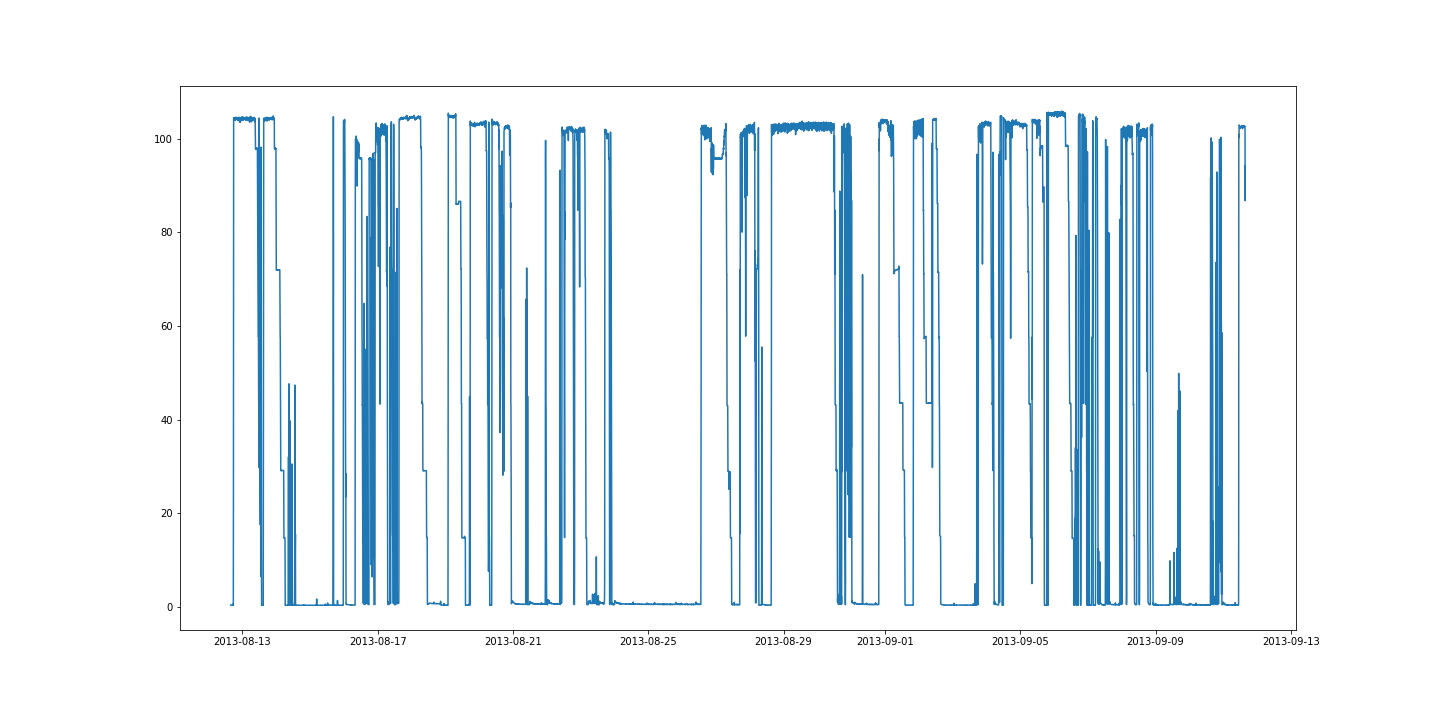

C:\Users\agustic\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\agustic\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\agustic\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


In [19]:
plt.figure(figsize=(20,10))
plt.plot(data['Date'], data['CPU usage [%]'])
plt.show()

In [20]:
data[:100]

0                 Date  Timestamp [s]  CPU usage [%]  Memory usage [%]  \
0  2013-08-12 15:40:46     1376314846       0.366667          0.014025   
1  2013-08-12 15:45:46     1376315146       0.333333          0.005343   
2  2013-08-12 15:50:46     1376315446       0.350000          0.000000   
3  2013-08-12 15:55:46     1376315746       0.333333          0.002671   
4  2013-08-12 16:00:46     1376316046       0.341667          0.002004   
..                 ...            ...            ...               ...   
95 2013-08-12 23:35:48     1376343348     104.041667          0.245770   
96 2013-08-12 23:40:48     1376343648     104.250000          0.189670   
97 2013-08-12 23:45:48     1376343948     104.500000          0.140249   
98 2013-08-12 23:50:48     1376344248     103.991667          0.146260   
99 2013-08-12 23:55:48     1376344548     104.400000          0.147596   

0   Disk read throughput [KB/s]  Disk write throughput [KB/s]  \
0                      0.000000                      2.066667   
1                      0.066667                      1.133333   
2                      0.000000                      0.933333   
3                      0.000000                      0.933333   
4                      0.000000                      1.133333   
..                          ...                           ...   
95                     0.000000                      0.733333   
96                     0.000000                      2.933333   
97                     0.000000                      1.533333   
98                     0.000000                      0.933333   
99                     0.000000                      1.000000   

0   Network received throughput [KB/s]  Network transmitted throughput [KB/s]  
0                             0.000000                               1.533333  
1                             0.000000                               1.000000  
2                             0.000000                               1.000000  
3                             0.000000                               1.000000  
4                             0.000000                               1.000000  
..                                 ...                                    ...  
95                           92.000000                               1.733333  
96                            0.666667                               1.333333  
97                            0.333333                               1.133333  
98                            0.666667                               1.400000  
99                            0.000000                               0.866667  

[100 rows x 8 columns]

In [21]:
DATA_COLUMNS = ["CPU usage [%]","Memory usage [%]", "Disk read throughput [KB/s]", 
                     "Disk write throughput [KB/s]","Network received throughput [KB/s]", "Network transmitted throughput [KB/s]" ]

data_describe = data[DATA_COLUMNS]

data_describe.describe(include='all')

0      CPU usage [%]  Memory usage [%]  Disk read throughput [KB/s]  \
count    8617.000000       8617.000000                  8617.000000   
mean       46.039757          0.107574                     3.101477   
std        47.746652          0.140098                    28.445077   
min         0.330357          0.000000                     0.000000   
25%         0.500000          0.000667                     0.000000   
50%        15.333333          0.049421                     0.000000   
75%       102.125000          0.160285                     0.000000   
max       105.883333          0.970667                   806.133333   

0      Disk write throughput [KB/s]  Network received throughput [KB/s]  \
count                   8617.000000                         8617.000000   
mean                       2.182386                          159.979882   
std                       14.040082                          729.122682   
min                        0.333333                            0.000000   
25%                        0.733333                            0.000000   
50%                        0.866667                            0.066667   
75%                        1.400000                            0.533333   
max                     1075.466667                        10335.600000   

0      Network transmitted throughput [KB/s]  
count                            8617.000000  
mean                                4.233554  
std                                14.066608  
min                                 0.533333  
25%                                 1.000000  
50%                                 1.000000  
75%                                 1.133333  
max                               209.000000

In [160]:
def take_values_time_intervals(minutes):
    # Create a subset taking a value of the dataset each "minutes"
    list_values = []

    difference_between_times = 0

    for i in range(0,num_rows):
        if i != num_rows-1:
            if(i==0):
                list_values.append(data.iloc[i,:])
            elif(minutes<=difference_between_times):
                list_values.append(data.iloc[i,:])
                difference_between_times = 0
            difference_between_times += (data.iloc[:,0][i+1] - data.iloc[:,0][i]).total_seconds() / 60
            
    return pd.DataFrame(list_values)

In [161]:
# Create a subset for every value of the time_intervals
time_intervals = [5,10,15,30,60,1440]
for i in time_intervals:
    name_variable = "subset_" + str(i)
    locals()[name_variable]= take_values_time_intervals(i)

In [162]:
plt.figure(figsize=(20,10))
plt.plot(subset_1440[:]['Date'], subset_1440['CPU usage [%]'])
plt.show()

<IPython.core.display.Javascript object>

## Implementation of the algorithms

### HoeffdingTreeRegressor

In [163]:
def hoeffdingTreeRegressor(label_option, data):
    from skmultiflow.trees import HoeffdingTreeRegressor
    import numpy as np
    from skmultiflow.data import DataStream
    # Setup a data stream
    if(label_option == 0): #Predict "CPU usage [%]"
        DATA_COLUMNS = ["CPU usage [%]","Memory usage [%]", "Disk read throughput [KB/s]", 
                     "Disk write throughput [KB/s]","Network received throughput [KB/s]", "Network transmitted throughput [KB/s]" ]
        LABEL_COLUMN = "CPU usage [%]"
        comparison = data[["CPU usage [%]"]].copy()
    else: #Predict "Memory usage [%]"
        DATA_COLUMNS = ["Memory usage [%]","CPU usage [%]", "Disk read throughput [KB/s]", 
                     "Disk write throughput [KB/s]","Network received throughput [KB/s]", "Network transmitted throughput [KB/s]" ]
        LABEL_COLUMN = "Memory usage [%]"
        comparison = data[["Memory usage [%]"]].copy()
    
    TIME_COLUMN = "Date"
    # Convert time column to datetime
    data[TIME_COLUMN] = pd.to_datetime(data[TIME_COLUMN])

    # Sort data by time
    data = data.sort_values(by=TIME_COLUMN)

    # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")
    ht_reg = HoeffdingTreeRegressor()

    n_samples = 0
    max_samples = num_rows
    y_pred = np.zeros(max_samples)
    y_true = np.zeros(max_samples)

    while n_samples < max_samples and stream.has_more_samples():
        X, y = stream.next_sample()
        y_true[n_samples] = y[0]
        y_pred[n_samples] = ht_reg.predict(X)[0]
        ht_reg.partial_fit(X, y)
        n_samples += 1

    if(label_option==0): comparison.insert(1, "CPU usage [%] predicted", y_pred)
    else : comparison.insert(1, "Memory usage predicted[%]", y_pred)
    print('Hoeffding Tree regressor')
    print('{} samples analyzed.'.format(n_samples))
    print('Mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred))))
    pd.set_option('display.max_rows', None)
    print(comparison)


In [164]:
hoeffdingTreeRegressor(0,data)

Hoeffding Tree regressor
8617 samples analyzed.
Mean absolute error: 3.0300776068190842
0     CPU usage [%]  CPU usage [%] predicted
0          0.366667                 0.000000
1          0.333333                 0.000000
2          0.350000                 0.359346
3          0.333333                 0.351939
4          0.341667                 0.350889
5          0.350000                 0.350149
6          0.333333                 0.347116
7          0.341667                 0.346987
8          0.341667                 0.372316
9          0.341667                 0.345436
10         0.341667                 0.338926
11         0.341667                 0.345071
12         0.366667                 0.343336
13         0.350000                 0.348247
14         0.341667                 0.344056
15         0.333333                 0.344867
16         0.350000                 0.348448
17         0.341667                 0.345348
18         0.583333                 2.446293
19         0

In [165]:
hoeffdingTreeRegressor(1,data)

Hoeffding Tree regressor
8617 samples analyzed.
Mean absolute error: 0.010985761891479451
0     Memory usage [%]  Memory usage predicted[%]
0             0.014025               0.000000e+00
1             0.005343               0.000000e+00
2             0.000000               9.791698e-03
3             0.002671               7.037959e-03
4             0.002004               5.032081e-03
5             0.000000               3.282723e-03
6             0.000000               4.156971e-03
7             0.000000               2.451442e-03
8             0.000000               9.811437e-03
9             0.000000               1.289109e-03
10            0.000000              -2.171431e-03
11            0.000000               9.775653e-04
12            0.000000              -3.177466e-03
13            0.006679              -3.505206e-04
14            0.018032              -3.159454e-04
15            0.001336               3.429084e-03
16            0.000000               1.175554e-03
17        

### KNN Regressor

In [166]:
def knnReg(label_option, data):
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    from skmultiflow.data import DataStream
    import numpy as np
    # Setup a data stream
    if(label_option == 0): #Predict "CPU usage [%]"
        DATA_COLUMNS = ["CPU usage [%]","Memory usage [%]", "Disk read throughput [KB/s]", 
                     "Disk write throughput [KB/s]","Network received throughput [KB/s]", "Network transmitted throughput [KB/s]" ]
        LABEL_COLUMN = "CPU usage [%]"
        comparison = data[["CPU usage [%]"]].copy()
    else: #Predict "Memory usage [%]"
        DATA_COLUMNS = ["Memory usage [%]","CPU usage [%]", "Disk read throughput [KB/s]", 
                     "Disk write throughput [KB/s]","Network received throughput [KB/s]", "Network transmitted throughput [KB/s]" ]
        LABEL_COLUMN = "Memory usage [%]"
        comparison = data[["Memory usage [%]"]].copy()

    TIME_COLUMN = "Date"
    # Convert time column to datetime
    data[TIME_COLUMN] = pd.to_datetime(data[TIME_COLUMN])

    # Sort data by time
    data = data.sort_values(by=TIME_COLUMN)

    # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")

    knn = KNNRegressor()

    n_samples = 0
    correct_cnt = 0
    max_samples = num_rows
    y_pred = np.zeros(max_samples)
    y_true = np.zeros(max_samples)

    while n_samples < max_samples and stream.has_more_samples():
        X, y = stream.next_sample()
        y_true[n_samples] = y[0]
        y_pred[n_samples] = knn.predict(X)[0]
        knn.partial_fit(X, y)
        n_samples += 1

    if(label_option==0): comparison.insert(1, "CPU usage [%] predicted", y_pred)
    else : comparison.insert(1, "Memory usage predicted[%]", y_pred)    
    print('{} samples analyzed.'.format(n_samples))
    print('KNN regressor mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred))))
    pd.set_option('display.max_rows', None)
    print(comparison)

In [167]:
knnReg(0,data)

8617 samples analyzed.
KNN regressor mean absolute error: 2.2929845938686024
0     CPU usage [%]  CPU usage [%] predicted
0          0.366667                 0.000000
1          0.333333                 0.000000
2          0.350000                 0.000000
3          0.333333                 0.000000
4          0.341667                 0.000000
5          0.350000                 0.345000
6          0.333333                 0.341667
7          0.341667                 0.341667
8          0.341667                 0.345000
9          0.341667                 0.341667
10         0.341667                 0.340000
11         0.341667                 0.343333
12         0.366667                 0.346667
13         0.350000                 0.341667
14         0.341667                 0.338333
15         0.333333                 0.340000
16         0.350000                 0.338333
17         0.341667                 0.338333
18         0.583333                 0.353333
19         0.350000    

In [168]:
knnReg(1,data)

8617 samples analyzed.
KNN regressor mean absolute error: 0.039420099496819766
0     Memory usage [%]  Memory usage predicted[%]
0             0.014025                   0.000000
1             0.005343                   0.000000
2             0.000000                   0.000000
3             0.002671                   0.000000
4             0.002004                   0.000000
5             0.000000                   0.004809
6             0.000000                   0.002004
7             0.000000                   0.000935
8             0.000000                   0.004274
9             0.000000                   0.000534
10            0.000000                   0.001469
11            0.000000                   0.000000
12            0.000000                   0.004274
13            0.006679                   0.001469
14            0.018032                   0.000534
15            0.001336                   0.000534
16            0.000000                   0.000801
17            0.00868

In [169]:
def knn_changing_n_neighbors(k, label_option,data):
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    import numpy as np
    
    for K in range(1,k+1):
        # Setup a data stream
        if(label_option == 0): #Predict "CPU usage [%]"
            DATA_COLUMNS = ["CPU usage [%]","Memory usage [%]", "Disk read throughput [KB/s]", 
                         "Disk write throughput [KB/s]","Network received throughput [KB/s]", "Network transmitted throughput [KB/s]" ]
            LABEL_COLUMN = "CPU usage [%]"
        else: #Predict "Memory usage [%]"
            DATA_COLUMNS = ["Memory usage [%]","CPU usage [%]", "Disk read throughput [KB/s]", 
                         "Disk write throughput [KB/s]","Network received throughput [KB/s]", "Network transmitted throughput [KB/s]" ]
            LABEL_COLUMN = "Memory usage [%]"
        
        TIME_COLUMN = "Date" 
        # Convert time column to datetime
        data[TIME_COLUMN] = pd.to_datetime(data[TIME_COLUMN])

        # Sort data by time
        data = data.sort_values(by=TIME_COLUMN)

        # Get X, y and time
        X = data[DATA_COLUMNS].values
        y = data[LABEL_COLUMN].values
        time = data[TIME_COLUMN].values

        stream = DataStream(X, y, name="stream")

        knn = KNNRegressor(n_neighbors = K)

        n_samples = 0
        correct_cnt = 0
        max_samples = num_rows
        y_pred = np.zeros(max_samples)
        y_true = np.zeros(max_samples)

        while n_samples < max_samples and stream.has_more_samples():
            X, y = stream.next_sample()
            y_true[n_samples] = y[0]
            y_pred[n_samples] = knn.predict(X)[0]
            knn.partial_fit(X, y)
            n_samples += 1
           
        print('{} samples analyzed.'.format(n_samples))
        print('KNN with value for K: {}'.format(K))
        print('KNN regressor mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred))))
    

In [170]:
knn_changing_n_neighbors(10, 0, data)

8617 samples analyzed.
KNN with value for K: 1
KNN regressor mean absolute error: 1.7537943078368252
8617 samples analyzed.
KNN with value for K: 2
KNN regressor mean absolute error: 1.8998123548485477
8617 samples analyzed.
KNN with value for K: 3
KNN regressor mean absolute error: 2.062806778362874
8617 samples analyzed.
KNN with value for K: 4
KNN regressor mean absolute error: 2.192363882068282
8617 samples analyzed.
KNN with value for K: 5
KNN regressor mean absolute error: 2.2929845938686024
8617 samples analyzed.
KNN with value for K: 6
KNN regressor mean absolute error: 2.372437015565787
8617 samples analyzed.
KNN with value for K: 7
KNN regressor mean absolute error: 2.4522841293958706
8617 samples analyzed.
KNN with value for K: 8
KNN regressor mean absolute error: 2.5438448794697255
8617 samples analyzed.
KNN with value for K: 9
KNN regressor mean absolute error: 2.6024229969041093
8617 samples analyzed.
KNN with value for K: 10
KNN regressor mean absolute error: 2.653548462

In [171]:
knn_changing_n_neighbors(10, 1, data)

8617 samples analyzed.
KNN with value for K: 1
KNN regressor mean absolute error: 0.04341114329620242
8617 samples analyzed.
KNN with value for K: 2
KNN regressor mean absolute error: 0.04021723696804361
8617 samples analyzed.
KNN with value for K: 3
KNN regressor mean absolute error: 0.03914577950639218
8617 samples analyzed.
KNN with value for K: 4
KNN regressor mean absolute error: 0.03903197697878807
8617 samples analyzed.
KNN with value for K: 5
KNN regressor mean absolute error: 0.039420099496819766
8617 samples analyzed.
KNN with value for K: 6
KNN regressor mean absolute error: 0.039645968703303246
8617 samples analyzed.
KNN with value for K: 7
KNN regressor mean absolute error: 0.03982542824008748
8617 samples analyzed.
KNN with value for K: 8
KNN regressor mean absolute error: 0.04001080260297045
8617 samples analyzed.
KNN with value for K: 9
KNN regressor mean absolute error: 0.040207228032124606
8617 samples analyzed.
KNN with value for K: 10
KNN regressor mean absolute err

#### Finding the optimal value of K in KNN

In [172]:
def knn_best_n_neighbors(label_option, k, data):
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    import numpy as np
    
    best_k = 1
    best_mean = 100
    
    for K in range(1,k+1,5):
        # Setup a data stream
        if(label_option == 0): #Predict "CPU usage [%]"
            DATA_COLUMNS = ["CPU usage [%]","Memory usage [%]", "Disk read throughput [KB/s]", 
                         "Disk write throughput [KB/s]","Network received throughput [KB/s]", "Network transmitted throughput [KB/s]" ]
            LABEL_COLUMN = "CPU usage [%]"
        else: #Predict "Memory usage [%]"
            DATA_COLUMNS = ["Memory usage [%]","CPU usage [%]", "Disk read throughput [KB/s]", 
                         "Disk write throughput [KB/s]","Network received throughput [KB/s]", "Network transmitted throughput [KB/s]" ]
            LABEL_COLUMN = "Memory usage [%]"
        
        TIME_COLUMN = "Date"
        # Convert time column to datetime
        data[TIME_COLUMN] = pd.to_datetime(data[TIME_COLUMN])

        # Sort data by time
        data = data.sort_values(by=TIME_COLUMN)

        # Get X, y and time
        X = data[DATA_COLUMNS].values
        y = data[LABEL_COLUMN].values
        time = data[TIME_COLUMN].values

        stream = DataStream(X, y, name="stream")

        knn = KNNRegressor(n_neighbors = K)

        n_samples = 0
        correct_cnt = 0
        max_samples = num_rows
        y_pred = np.zeros(max_samples)
        y_true = np.zeros(max_samples)

        while n_samples < max_samples and stream.has_more_samples():
            X, y = stream.next_sample()
            y_true[n_samples] = y[0]
            y_pred[n_samples] = knn.predict(X)[0]
            knn.partial_fit(X, y)
            n_samples += 1
        
        if(best_mean>np.mean(np.abs(y_true - y_pred))):
            best_mean = np.mean(np.abs(y_true - y_pred))
            best_k = K
        print('{} samples analyzed.'.format(n_samples))
        print('KNN with value for K: {}'.format(K))
        print('KNN regressor mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred))))
        
    return best_k
    

In [173]:
import math

best_k = knn_best_n_neighbors(0,10,data)

8617 samples analyzed.
KNN with value for K: 1
KNN regressor mean absolute error: 1.7537943078368252
8617 samples analyzed.
KNN with value for K: 6
KNN regressor mean absolute error: 2.372437015565787


### HoeffdingAdaptiveTreeRegressor

In [174]:
def hoeffdingAdaptativeTreeRegressor(label_option, data):
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor

    # Setup a data stream
    if(label_option == 0): #Predict "CPU usage [%]"
        DATA_COLUMNS = ["CPU usage [%]","Memory usage [%]", "Disk read throughput [KB/s]", 
                     "Disk write throughput [KB/s]","Network received throughput [KB/s]", "Network transmitted throughput [KB/s]" ]
        LABEL_COLUMN = "CPU usage [%]"
    else: #Predict "Memory usage [%]"
        DATA_COLUMNS = ["Memory usage [%]","CPU usage [%]", "Disk read throughput [KB/s]", 
                     "Disk write throughput [KB/s]","Network received throughput [KB/s]", "Network transmitted throughput [KB/s]" ]
        LABEL_COLUMN = "Memory usage [%]"
    
    TIME_COLUMN = "Date"
    # Convert time column to datetime
    data[TIME_COLUMN] = pd.to_datetime(data[TIME_COLUMN])

    # Sort data by time
    data = data.sort_values(by=TIME_COLUMN)

    # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")

    hat_reg = HoeffdingAdaptiveTreeRegressor()

    n_samples = 0
    max_samples = num_rows
    y_pred = np.zeros(max_samples)
    y_true = np.zeros(max_samples)

    while n_samples < max_samples and stream.has_more_samples():
        X, y = stream.next_sample()
        y_true[n_samples] = y[0]
        y_pred[n_samples] = hat_reg.predict(X)[0]
        hat_reg.partial_fit(X, y)
        n_samples += 1

    print('{} samples analyzed.'.format(n_samples))
    print('Hoeffding Adaptive Tree regressor mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred))))

In [175]:
hoeffdingAdaptativeTreeRegressor(0,data)

8617 samples analyzed.
Hoeffding Adaptive Tree regressor mean absolute error: 3.8069988118053724


In [176]:
hoeffdingAdaptativeTreeRegressor(1,data)

8617 samples analyzed.
Hoeffding Adaptive Tree regressor mean absolute error: 0.020384219697732256


### Persistence model

In [177]:
def persistenceModel(label_option, data):
    # Setup a data stream
    if(label_option == 0): #Predict "CPU usage [%]"
        DATA_COLUMNS = ["CPU usage [%]","Memory usage [%]", "Disk read throughput [KB/s]", 
                     "Disk write throughput [KB/s]","Network received throughput [KB/s]", "Network transmitted throughput [KB/s]" ]
        LABEL_COLUMN = "CPU usage [%]"
    else: #Predict "Memory usage [%]"
        DATA_COLUMNS = ["Memory usage [%]","CPU usage [%]", "Disk read throughput [KB/s]", 
                     "Disk write throughput [KB/s]","Network received throughput [KB/s]", "Network transmitted throughput [KB/s]" ]
        LABEL_COLUMN = "Memory usage [%]"
    
    TIME_COLUMN = "Date"
    # Convert time column to datetime
    data[TIME_COLUMN] = pd.to_datetime(data[TIME_COLUMN])

    # Sort data by time
    data = data.sort_values(by=TIME_COLUMN)

    # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream=DataStream(X, y, name="stream")

    n_samples = 0
    max_samples = num_rows
    y_previo = 0
    y_pred = np.zeros(max_samples)
    y_true = np.zeros(max_samples)

    while n_samples < max_samples and stream.has_more_samples():
        X, y = stream.next_sample()
        y_true[n_samples] = y[0]
        y_pred[n_samples] = y_previo
        y_previo = y[0]
        n_samples += 1

    print('{} samples analyzed.'.format(n_samples))
    print('Persistence model mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred))))

In [178]:
persistenceModel(0,data)

8617 samples analyzed.
Persistence model mean absolute error: 2.609773446094091


In [179]:
persistenceModel(1,data)

8617 samples analyzed.
Persistence model mean absolute error: 0.025474262339270186


### VAR (Vector Auto Regression) - Multivariate Time Series

In [180]:
DATA_COLUMNS = ["CPU usage [%]", "Memory usage [%]", "Disk read throughput [KB/s]", 
                     "Disk write throughput [KB/s]","Network received throughput [KB/s]", "Network transmitted throughput [KB/s]" ]
data_var = data[DATA_COLUMNS]
cols = data_var.columns

df = data_var
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data_var = df[df.columns[i]]
    ax.plot(data_var, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

<IPython.core.display.Javascript object>

In [181]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)  

CPU usage [%]_x  Memory usage [%]_x  \
CPU usage [%]_y                                   1.0000               0.000   
Memory usage [%]_y                                0.0000               1.000   
Disk read throughput [KB/s]_y                     0.0251               0.000   
Disk write throughput [KB/s]_y                    0.9729               0.938   
Network received throughput [KB/s]_y              0.0000               0.000   
Network transmitted throughput [KB/s]_y           0.0000               0.000   

                                         Disk read throughput [KB/s]_x  \
CPU usage [%]_y                                                 0.6238   
Memory usage [%]_y                                              0.0021   
Disk read throughput [KB/s]_y                                   0.9995   
Disk write throughput [KB/s]_y                                  0.0000   
Network received throughput [KB/s]_y                            0.1816   
Network transmitted throughput [KB/s]_y                         0.0897   

                                         Disk write throughput [KB/s]_x  \
CPU usage [%]_y                                                  0.7384   
Memory usage [%]_y                                               0.4629   
Disk read throughput [KB/s]_y                                    0.0346   
Disk write throughput [KB/s]_y                                   0.8889   
Network received throughput [KB/s]_y                             0.7276   
Network transmitted throughput [KB/s]_y                          0.5596   

                                         Network received throughput [KB/s]_x  \
CPU usage [%]_y                                                        0.0000   
Memory usage [%]_y                                                     0.0000   
Disk read throughput [KB/s]_y                                          0.0171   
Disk write throughput [KB/s]_y                                         0.6429   
Network received throughput [KB/s]_y                                   0.9996   
Network transmitted throughput [KB/s]_y                                0.0000   

                                         Network transmitted throughput [KB/s]_x  
CPU usage [%]_y                                                           0.0000  
Memory usage [%]_y                                                        0.0000  
Disk read throughput [KB/s]_y                                             0.0135  
Disk write throughput [KB/s]_y                                            0.4215  
Network received throughput [KB/s]_y                                      0.0000  
Network transmitted throughput [KB/s]_y                                   1.0000

In [182]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
CPU usage [%] ::  4071.3    > 83.9383   =>   True
Memory usage [%] ::  2870.57   > 60.0627   =>   True
Disk read throughput [KB/s] ::  1742.5    > 40.1749   =>   True
Disk write throughput [KB/s] ::  750.34    > 24.2761   =>   True
Network received throughput [KB/s] ::  282.28    > 12.3212   =>   True
Network transmitted throughput [KB/s] ::  35.5      > 4.1296    =>   True


#### Autocorrelation

In [30]:
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

DATA_COLUMNS = ["CPU usage [%]", "Memory usage [%]", "Disk read throughput [KB/s]", 
                     "Disk write throughput [KB/s]","Network received throughput [KB/s]", "Network transmitted throughput [KB/s]" ]
data_new = data[DATA_COLUMNS]
data_new.head()

0  CPU usage [%]  Memory usage [%]  Disk read throughput [KB/s]  \
0       0.366667          0.014025                     0.000000   
1       0.333333          0.005343                     0.066667   
2       0.350000          0.000000                     0.000000   
3       0.333333          0.002671                     0.000000   
4       0.341667          0.002004                     0.000000   

0  Disk write throughput [KB/s]  Network received throughput [KB/s]  \
0                      2.066667                                 0.0   
1                      1.133333                                 0.0   
2                      0.933333                                 0.0   
3                      0.933333                                 0.0   
4                      1.133333                                 0.0   

0  Network transmitted throughput [KB/s]  
0                               1.533333  
1                               1.000000  
2                               1.000000  
3                               1.000000  
4                               1.000000

<IPython.core.display.Javascript object>


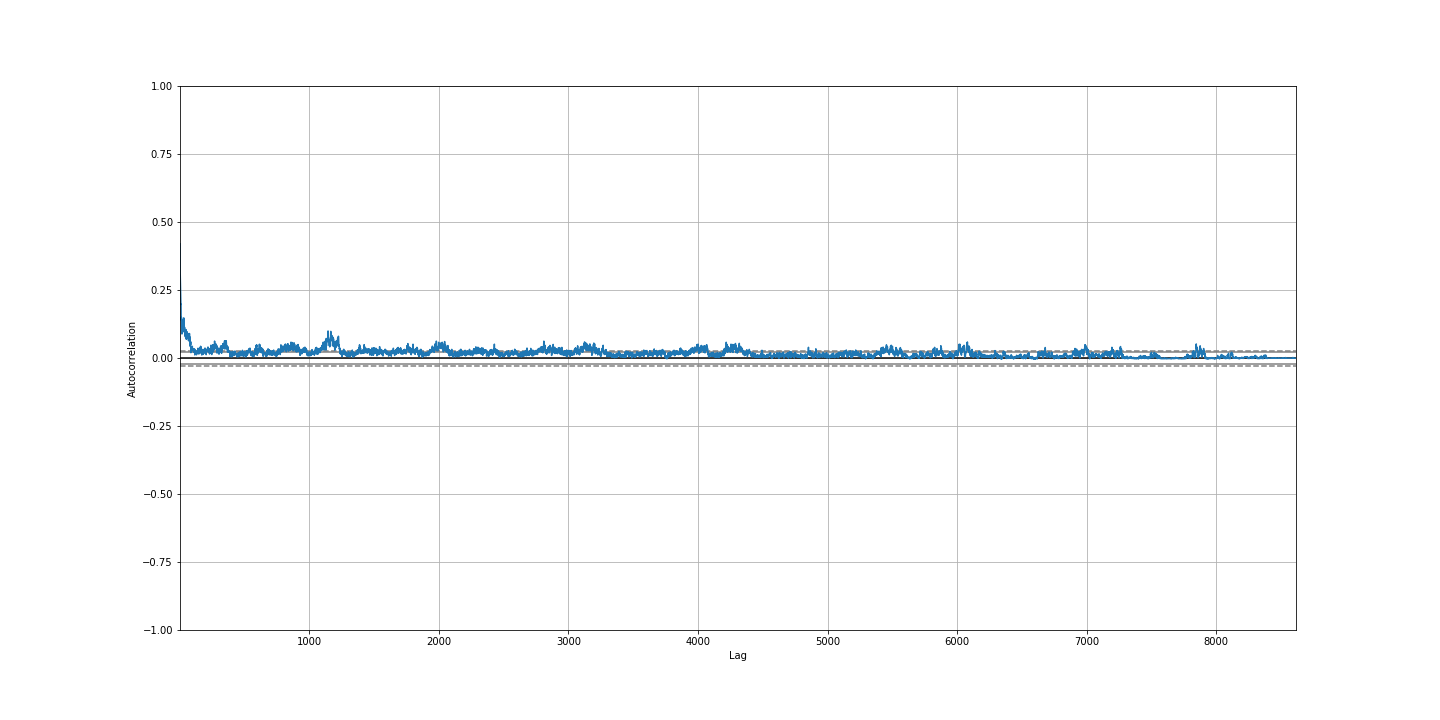

In [31]:
plt.figure(figsize=(20,10))
autocorrelation_plot(data_new)
plt.show()

#### VAR implementation

In [185]:
import numpy as np
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.vector_ar.var_model import VAR

import warnings
warnings.filterwarnings('ignore')

DATA_COLUMNS = ["Date","CPU usage [%]", "Memory usage [%]", "Disk read throughput [KB/s]", 
                     "Disk write throughput [KB/s]","Network received throughput [KB/s]", "Network transmitted throughput [KB/s]" ]
data_var = data[DATA_COLUMNS]
data_var['Date'] = pd.to_datetime(data_var.Date , format = '%d/%m/%Y %H.%M.%S')
data_v= data_var.drop(['Date'], axis=1)
data_v.index = data_var.Date
cols = data_v.columns
    
comparison = data_v[["CPU usage [%]", "Memory usage [%]"]].copy()
cpu_col = []
mem_col = []

for i in range(0,len(data_v)):
    if(i<3): train = data_v.iloc[:3]
    else: train = data_v.iloc[:i]
    
    valid = data_v.iloc[i]
    
    model = VAR(endog=train)
    model_fit = model.fit()

    # make prediction on validation
    prediction = model_fit.forecast(model_fit.y, steps=1)
    
    pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
    for j in range(0,6):
        for i in range(0, len(prediction)):
            pred.iloc[i][j] = prediction[i][j]
    
    cpu_col.append(pred.iloc[0][0])
    mem_col.append(pred.iloc[0][1])
    
comparison.insert(1, "CPU usage [%] predicted", cpu_col)
comparison.insert(3, "Memory usage [%] predicted", mem_col)

print(' "CPU usage [%]" mean absolute error: {}'.format(np.mean(np.abs(comparison["CPU usage [%]"] - comparison["CPU usage [%] predicted"]))))
print(' "Memory usage [%]" mean absolute error: {}'.format(np.mean(np.abs(comparison["Memory usage [%]"] - comparison["Memory usage [%] predicted"]))))    

 "CPU usage [%]" mean absolute error: 11.445081618530102
 "Memory usage [%]" mean absolute error: 0.04583037376672438


In [186]:
comparison.describe()
comparison.sort_values('CPU usage [%] predicted')

0                    CPU usage [%]  CPU usage [%] predicted  Memory usage [%]  \
Date                                                                            
2013-08-12 17:50:47     104.233333              -121.522175          0.233749   
2013-08-14 19:31:02       0.341667               -67.181123          0.000000   
2013-08-26 09:47:50       0.516667               -53.260275          0.000000   
2013-08-23 14:37:29       0.850000               -36.314802          0.000000   
2013-08-27 15:12:58       0.475000               -32.592129          0.004667   
2013-08-23 11:17:28       0.500000               -28.394307          0.106857   
2013-08-30 14:38:18       1.625000               -28.292320          0.052000   
2013-08-30 14:28:18       1.758333               -19.477343          0.014000   
2013-09-03 16:03:51       0.466667               -16.859475          0.113333   
2013-08-14 10:50:59       0.341667               -16.625730          0.003339   
2013-08-15 04:46:06       0.375000               -15.582380          0.012689   
2013-08-30 14:43:18       0.650000               -14.314122          0.032667   
2013-08-30 14:33:18       2.658333               -11.692462          0.046000   
2013-08-23 11:37:28       0.525000                -8.411537          0.004675   
2013-08-15 16:46:10       0.375000                -7.550665          0.098174   
2013-09-09 10:24:41       0.600000                -7.438364          0.083333   
2013-08-30 14:23:18       1.641667                -6.927799          0.013333   
2013-08-14 09:10:59       0.341667                -6.230813          0.189670   
2013-09-06 15:59:18      14.258333                -6.022069          0.104667   
2013-08-14 08:50:59       0.341667                -6.002743          0.065450   
2013-09-07 08:49:23       0.991667                -5.884553          0.088000   
2013-08-21 09:37:12       0.525000                -4.272552          0.199688   
2013-08-14 09:30:59       0.341667                -4.149208          0.085485   
2013-08-14 09:45:59       0.391667                -4.056071          0.397373   
2013-08-23 10:32:28       1.008333                -3.777931          0.022707   
2013-09-07 08:34:23       2.758333                -3.719303          0.150000   
2013-09-07 08:19:23       0.708333                -3.623401          0.104000   
2013-09-06 16:49:18       0.350000                -3.535754          0.056000   
2013-09-09 16:34:43       0.575000                -3.340827          0.196000   
2013-08-14 09:50:59       0.341667                -3.258462          0.096171   
2013-09-10 15:19:50      12.850000                -3.185239          0.129333   
2013-08-23 12:37:28       0.491667                -3.093684          0.038735   
2013-09-07 04:34:22       0.350000                -3.088707          0.005333   
2013-08-27 16:07:58       0.466667                -2.872718          0.000000   
2013-08-30 17:08:19       0.583333                -2.825810          0.014667   
2013-08-23 09:52:27       0.966667                -2.813059          0.058771   
2013-08-23 08:32:27       1.000000                -2.794799          0.074132   
2013-08-23 16:57:29       1.925000                -2.688348          0.040071   
2013-09-09 17:39:43       0.516667                -2.637662          0.130000   
2013-09-06 14:29:17       0.350000                -2.605036          0.015333   
2013-09-07 08:39:23       9.225000                -2.557589          0.088000   
2013-08-30 15:08:18       0.658333                -2.415689          0.074000   
2013-08-27 11:22:57       0.500000                -2.368066          0.001333   
2013-08-23 11:32:28       1.191667                -2.333011          0.009350   
2013-09-10 17:24:51       1.191667                -2.270735          0.061333   
2013-09-05 19:19:10       0.333333                -2.226425          0.094000   
2013-08-17 13:56:24       0.683333                -2.188854          0.126224   
2013-09-07 15:09:25       0.608

In [18]:
def arimaModel(label_option, n_samples, data):
    import numpy as np
    from sklearn.metrics import mean_squared_error
    from statsmodels.tsa.vector_ar.var_model import VAR

    import warnings
    warnings.filterwarnings('ignore')
    
    DATA_COLUMNS = ["Date","CPU usage [%]", "Memory usage [%]", "Disk read throughput [KB/s]", 
                     "Disk write throughput [KB/s]","Network received throughput [KB/s]", "Network transmitted throughput [KB/s]" ]
    data_var = data[DATA_COLUMNS]
    data_var['Date'] = pd.to_datetime(data_var.Date , format = '%d/%m/%Y %H.%M.%S')
    data_v= data_var.drop(['Date'], axis=1)
    data_v.index = data_var.Date
    cols = data_v.columns
    
    if(n_samples<3): train = data_v.iloc[:3]
    else: train = data_v.iloc[:n_samples]

    valid = data_v.iloc[n_samples]

    model = VAR(endog=train)
    model_fit = model.fit()

    # make prediction on validation
    prediction = model_fit.forecast(model_fit.y, steps=1)

    pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
    for j in range(0,6):
        for i in range(0, len(prediction)):
            pred.iloc[i][j] = prediction[i][j]
    
    if(label_option==0): return pred.iloc[0][0]
    else: return pred.iloc[0][1]

In [22]:
def arimaModelv2(label_option, n_samples, DATA_COLUMNS,data):
    import numpy as np
    from sklearn.metrics import mean_squared_error
    from statsmodels.tsa.vector_ar.var_model import VAR

    import warnings
    warnings.filterwarnings('ignore')
    
    data_v = data[DATA_COLUMNS]
    cols = data_v.columns
    
    if(n_samples<3): train = data_v.iloc[:3]
    else: train = data_v.iloc[:n_samples]

    valid = data_v.iloc[n_samples]

    model = VAR(endog=train)
    model_fit = model.fit()

    # make prediction on validation
    prediction = model_fit.forecast(model_fit.y, steps=1)

    pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
    for j in range(0,len(DATA_COLUMNS)):
        for i in range(0, len(prediction)):
            pred.iloc[i][j] = prediction[i][j]
    
    if(label_option==0): return pred.iloc[0][0]
    else: return pred.iloc[0][1]

## Plotting the predictions

In [188]:
x_time = np.arange(0, len(data)*5, 5).tolist() # Create x_time every each 5 minutes

<IPython.core.display.Javascript object>


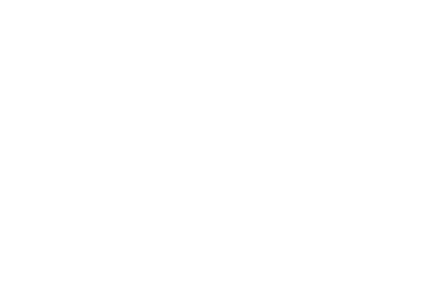

NameError: name 'y_pred_ht_reg' is not defined

In [189]:
import matplotlib.pyplot as plt

fig = plt.figure() 
plt.plot(x_time,y_pred_ht_reg, label = "HoeffdingTreeRegressor")
plt.plot(x_time,y_pred_hat_reg, label = "HoeffdingAdaptiveTreeRegressor")
plt.plot(x_time,y_pred_knn, label = "KNNRegressor")
plt.plot(x_time,y_pred_pers_model, label = "PersistenceModel")
plt.plot(x_time,y_pred_ensem, label = "Ensemble Learning")
plt.xlabel('x - time')
plt.ylabel('y - CPU usage [%]')
plt.title('Comparison of predictions')
plt.legend()
plt.show()

### Plotting the predictions [First 10 values]

In [190]:
import matplotlib.pyplot as plt

x_time = x_time[:10]
fig = plt.figure() 
plt.plot(x_time,y_pred_ht_reg[:10], label = "HoeffdingTreeRegressor")
plt.plot(x_time,y_pred_hat_reg[:10], label = "HoeffdingAdaptiveTreeRegressor")
plt.plot(x_time,y_pred_knn[:10], label = "KNNRegressor")
plt.plot(x_time,y_pred_pers_model[:10], label = "PersistenceModel")
plt.plot(x_time,y_pred_ensem[:10], label = "Ensemble Learning")
plt.xlabel('x - time')
plt.ylabel('y - CPU usage [%]')
plt.title('Comparison of predictions')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

NameError: name 'y_pred_ht_reg' is not defined

## Ensemble learning

### Base ensemble case

In [191]:
def ensemble_learning(label_option, data):
    '''
    label_option: 0 --> Predict (CPU usage [%])
                  1 --> Predict (Memory usage [%])

    '''
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    from skmultiflow.trees import HoeffdingTreeRegressor
    from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor
    from skmultiflow.data import DataStream
    import numpy as np

    # Setup a data stream
    if(label_option == 0): #Predict "CPU usage [%]"
        DATA_COLUMNS = ["CPU usage [%]","Memory usage [%]", "Disk read throughput [KB/s]", 
                     "Disk write throughput [KB/s]","Network received throughput [KB/s]", "Network transmitted throughput [KB/s]" ]
        LABEL_COLUMN = "CPU usage [%]"
    else: #Predict "Memory usage [%]"
        DATA_COLUMNS = ["Memory usage [%]","CPU usage [%]", "Disk read throughput [KB/s]", 
                     "Disk write throughput [KB/s]","Network received throughput [KB/s]", "Network transmitted throughput [KB/s]" ]
        LABEL_COLUMN = "Memory usage [%]"
    
    TIME_COLUMN = "Date"
    # Convert time column to datetime
    data[TIME_COLUMN] = pd.to_datetime(data[TIME_COLUMN])

    # Sort data by time
    data = data.sort_values(by=TIME_COLUMN)

    # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")

    #best_k = knn_best_n_neighbors(10,data)

    knn = KNNRegressor(n_neighbors = 1)
    ht_reg = HoeffdingTreeRegressor()
    hat_reg = HoeffdingAdaptiveTreeRegressor()

    y_previo = 0

    n_samples = 0
    correct_cnt = 0
    max_samples = num_rows

    y_pred_ensem = np.zeros(max_samples)
    y_pred_knn = np.zeros(max_samples)
    y_pred_ht_reg = np.zeros(max_samples)
    y_pred_hat_reg= np.zeros(max_samples)
    y_pred_pers_model = np.zeros(max_samples)
    y_pred_arima_model = np.zeros(max_samples)
    
    y_true = np.zeros(max_samples)

    while n_samples < max_samples and stream.has_more_samples():
        X, y = stream.next_sample()
        y_true[n_samples]= y[0]

        y_pred_ht_reg[n_samples] = ht_reg.predict(X)[0]
        y_pred_hat_reg[n_samples] = hat_reg.predict(X)[0]
        y_pred_knn[n_samples] = knn.predict(X)[0]
        y_pred_pers_model[n_samples] = y_previo
        y_pred_arima_model[n_samples] = arimaModel(label_option,n_samples,data)

        y_pred_ensem[n_samples] = (y_pred_ht_reg[n_samples]+y_pred_hat_reg[n_samples]+y_pred_knn[n_samples]
                                   +y_pred_pers_model[n_samples]+y_pred_arima_model[n_samples])/5

        knn.partial_fit(X, y)
        ht_reg.partial_fit(X, y)
        hat_reg.partial_fit(X, y)

        y_previo = y[0]
        n_samples += 1

    if(label_option == 0): print('Ensemble learning "CPU usage [%]" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))
    else: print('Ensemble learning "Memory usage [%]" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))

In [192]:
ensemble_learning(0, data) 

Ensemble learning "CPU usage [%]" mean absolute error: 3.761850293344095


In [193]:
ensemble_learning(1, data) 

Ensemble learning "Memory usage [%]" mean absolute error: 0.022196015003858514


### Prediction using the best algorithm of the previous step

In [197]:
def ensemble_learning_previous_step(label_option, data):
    '''
    The prediction is made by the best predictor from the previous iteration.
    '''
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    from skmultiflow.trees import HoeffdingTreeRegressor
    from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor
    from skmultiflow.data import DataStream
    import numpy as np
    
    # Setup a data stream
    if(label_option == 0): #Predict "CPU usage [%]"
        DATA_COLUMNS = ["CPU usage [%]","Memory usage [%]", "Disk read throughput [KB/s]", 
                     "Disk write throughput [KB/s]","Network received throughput [KB/s]", "Network transmitted throughput [KB/s]" ]
        LABEL_COLUMN = "CPU usage [%]"
    else: #Predict "Memory usage [%]"
        DATA_COLUMNS = ["Memory usage [%]","CPU usage [%]", "Disk read throughput [KB/s]", 
                     "Disk write throughput [KB/s]","Network received throughput [KB/s]", "Network transmitted throughput [KB/s]" ]
        LABEL_COLUMN = "Memory usage [%]"
    
    TIME_COLUMN = "Date"
    # Convert time column to datetime
    data[TIME_COLUMN] = pd.to_datetime(data[TIME_COLUMN])

    # Sort data by time
    data = data.sort_values(by=TIME_COLUMN)
    
    # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")

    #best_k = knn_best_n_neighbors(10,data)

    knn = KNNRegressor(n_neighbors = 1)
    ht_reg = HoeffdingTreeRegressor()
    hat_reg = HoeffdingAdaptiveTreeRegressor()
    
    best_previous_step = 0
    y_predictions = np.zeros(5)
        
    n_samples = 0
    correct_cnt = 0
    max_samples = num_rows
    y_previo = 0

    y_pred_ensem = np.zeros(max_samples)
    y_pred_knn = np.zeros(max_samples)
    y_pred_ht_reg = np.zeros(max_samples)
    y_pred_hat_reg= np.zeros(max_samples)
    y_pred_pers_model = np.zeros(max_samples)
    y_pred_arima_model = np.zeros(max_samples)

    y_true = np.zeros(max_samples)

    while n_samples < max_samples and stream.has_more_samples():
        X, y = stream.next_sample()

        y_true[n_samples]= y[0]

        y_pred_ht_reg[n_samples] = y_predictions[0] = ht_reg.predict(X)[0]
        y_pred_hat_reg[n_samples] = y_predictions[1] = hat_reg.predict(X)[0]
        y_pred_knn[n_samples] = y_predictions[2] = knn.predict(X)[0]
        y_pred_pers_model[n_samples] = y_predictions[3] = y_previo
        y_pred_arima_model[n_samples] = y_predictions[4] = arimaModel(label_option,n_samples,data)
        
        import operator
        
        if(n_samples==0):
            y_pred_ensem[n_samples] = (y_pred_ht_reg[n_samples]+y_pred_hat_reg[n_samples]+y_pred_knn[n_samples]+
                                       y_pred_pers_model[n_samples]+y_pred_arima_model[n_samples])/5
        else:
            y_pred_ensem[n_samples] = y_predictions[best_previous_step]
            best_previous_step, value = min(enumerate(abs(y_predictions-y[0])), key=operator.itemgetter(1))

        knn.partial_fit(X, y)
        ht_reg.partial_fit(X, y)
        hat_reg.partial_fit(X, y)

        y_previo = y[0]
        n_samples += 1

    if(label_option == 0): print('Ensemble learning "CPU usage [%]" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))
    else: print('Ensemble learning "Memory usage [%]" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))

In [198]:
ensemble_learning_previous_step(0,data)
ensemble_learning_previous_step(1,data)

Ensemble learning "CPU usage [%]" mean absolute error: 1.7187427568784819
Ensemble learning "Memory usage [%]" mean absolute error: 0.022726907460787912


### Increase the weight to the best and decrease to the rest by constant

In [16]:
def ensemble_learning_weight_change(label_option, data, learning):
    '''
    The weight of the best predictor increases "learning" and the weight of the other predictors decreases 
    the same value among them.
    '''
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    from skmultiflow.trees import HoeffdingTreeRegressor
    from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor
    import numpy as np
    
   
    # Setup a data stream
    if(label_option == 0): #Predict "CPU usage [%]"
        DATA_COLUMNS = ["CPU usage [%]","Memory usage [%]", "Disk read throughput [KB/s]", 
                     "Disk write throughput [KB/s]","Network received throughput [KB/s]", "Network transmitted throughput [KB/s]" ]
        LABEL_COLUMN = "CPU usage [%]"
    else: #Predict "Memory usage [%]"
        DATA_COLUMNS = ["Memory usage [%]","CPU usage [%]", "Disk read throughput [KB/s]", 
                     "Disk write throughput [KB/s]","Network received throughput [KB/s]", "Network transmitted throughput [KB/s]" ]
        LABEL_COLUMN = "Memory usage [%]"
    
    TIME_COLUMN = "Date"
    # Convert time column to datetime
    data[TIME_COLUMN] = pd.to_datetime(data[TIME_COLUMN])

    # Sort data by time
    data = data.sort_values(by=TIME_COLUMN)
    
    # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")

    #best_k = knn_best_n_neighbors(10,data)

    knn = KNNRegressor(n_neighbors = 1)
    ht_reg = HoeffdingTreeRegressor()
    hat_reg = HoeffdingAdaptiveTreeRegressor()
    
    best_previous_step = 0
    y_predictions = np.zeros(5)
    algorithm_weights = np.full(5,0.20)
        
    n_samples = 0
    correct_cnt = 0
    max_samples = num_rows
    y_previo = 0

    y_pred_ensem = np.zeros(max_samples)
    y_pred_knn = np.zeros(max_samples)
    y_pred_ht_reg = np.zeros(max_samples)
    y_pred_hat_reg= np.zeros(max_samples)
    y_pred_pers_model = np.zeros(max_samples)
    y_pred_arima_model = np.zeros(max_samples)

    y_true = np.zeros(max_samples)
    
    print(learning)

    while n_samples < max_samples and stream.has_more_samples():
        X, y = stream.next_sample()

        y_true[n_samples]= y[0]

        y_pred_ht_reg[n_samples] = y_predictions[0] = ht_reg.predict(X)[0]
        y_pred_hat_reg[n_samples] = y_predictions[1] = hat_reg.predict(X)[0]
        y_pred_knn[n_samples] = y_predictions[2] = knn.predict(X)[0]
        y_pred_pers_model[n_samples] = y_predictions[3] = y_previo
        y_pred_arima_model[n_samples] = y_predictions[4] = arimaModel(label_option, n_samples,data)
        
        y_pred_ensem[n_samples] = (y_pred_ht_reg[n_samples]*algorithm_weights[0])+(y_pred_hat_reg[n_samples]*algorithm_weights[1])+(y_pred_knn[n_samples]*algorithm_weights[2])+(y_pred_pers_model[n_samples]*algorithm_weights[3])+(y_pred_arima_model[n_samples]*algorithm_weights[4])
                
        import operator
        
        best_previous_step, value = min(enumerate(abs(y_predictions-y[0])), key=operator.itemgetter(1))
               
        for i in range(len(algorithm_weights)):
            if(i == best_previous_step): 
                algorithm_weights[i] += (learning)
                if(algorithm_weights[i]>1.0): algorithm_weights[i] = 1.0
            else: 
                algorithm_weights[i] -= (learning/(len(algorithm_weights)-1))
                if(algorithm_weights[i]<0.0): algorithm_weights[i] = 0.0
        
        algorithm_weights /= sum(algorithm_weights)
                
        knn.partial_fit(X, y)
        ht_reg.partial_fit(X, y)
        hat_reg.partial_fit(X, y)

        y_previo = y[0]
        n_samples += 1
    
    if(label_option == 0): print('Ensemble learning "CPU usage [%]" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))
    else: print('Ensemble learning "Memory usage [%]" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))

In [19]:
for i in range(0,10):
    ensemble_learning_weight_change(0,data, i/10)

0.0


C:\Users\agustic\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Ensemble learning "CPU usage [%]" mean absolute error: 3.6580846646153233
0.1
Ensemble learning "CPU usage [%]" mean absolute error: 1.5068415196659428
0.2
Ensemble learning "CPU usage [%]" mean absolute error: 1.4787431400829796
0.3
Ensemble learning "CPU usage [%]" mean absolute error: 1.3886308851598594
0.4
Ensemble learning "CPU usage [%]" mean absolute error: 1.5208777989421594
0.5
Ensemble learning "CPU usage [%]" mean absolute error: 1.4161408938518478
0.6
Ensemble learning "CPU usage [%]" mean absolute error: 1.3476492464287706
0.7
Ensemble learning "CPU usage [%]" mean absolute error: 1.3830610184661571
0.8
Ensemble learning "CPU usage [%]" mean absolute error: 1.3516328432851434
0.9
Ensemble learning "CPU usage [%]" mean absolute error: 1.512220282115355


In [20]:
for i in range(0,10):
    ensemble_learning_weight_change(1,data, i/10)

0.0
Ensemble learning "Memory usage [%]" mean absolute error: 0.02249843965114581
0.1
Ensemble learning "Memory usage [%]" mean absolute error: 0.01450703779480315
0.2
Ensemble learning "Memory usage [%]" mean absolute error: 0.01869108154750483
0.3
Ensemble learning "Memory usage [%]" mean absolute error: 0.015455272619113168
0.4
Ensemble learning "Memory usage [%]" mean absolute error: 0.01678692884464482
0.5
Ensemble learning "Memory usage [%]" mean absolute error: 0.01754612481911518
0.6
Ensemble learning "Memory usage [%]" mean absolute error: 0.017569938474011483
0.7
Ensemble learning "Memory usage [%]" mean absolute error: 0.01901472081418352
0.8
Ensemble learning "Memory usage [%]" mean absolute error: 0.01956935122903817
0.9
Ensemble learning "Memory usage [%]" mean absolute error: 0.019682058373030834


### Increase the weight to the best and decrease to the worst by a constant

In [203]:
def ensemble_learning_weight_change_different(label_option, data, learning):
    '''
    The weight of the best predictor increases "learning" and the worst predictor decreases 
    the same amount.
    '''
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    from skmultiflow.trees import HoeffdingTreeRegressor
    from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor
    from skmultiflow.data import DataStream
    import numpy as np
    # Setup a data stream
    if(label_option == 0): #Predict "CPU usage [%]"
        DATA_COLUMNS = ["CPU usage [%]","Memory usage [%]", "Disk read throughput [KB/s]", 
                     "Disk write throughput [KB/s]","Network received throughput [KB/s]", "Network transmitted throughput [KB/s]" ]
        LABEL_COLUMN = "CPU usage [%]"
    else: #Predict "Memory usage [%]"
        DATA_COLUMNS = ["Memory usage [%]","CPU usage [%]", "Disk read throughput [KB/s]", 
                     "Disk write throughput [KB/s]","Network received throughput [KB/s]", "Network transmitted throughput [KB/s]" ]
        LABEL_COLUMN = "Memory usage [%]"
    
    TIME_COLUMN = "Date"
    # Convert time column to datetime
    data[TIME_COLUMN] = pd.to_datetime(data[TIME_COLUMN])

    # Sort data by time
    data = data.sort_values(by=TIME_COLUMN)
    
    # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")

    #best_k = knn_best_n_neighbors(10,data)

    knn = KNNRegressor(n_neighbors = 1)
    ht_reg = HoeffdingTreeRegressor()
    hat_reg = HoeffdingAdaptiveTreeRegressor()
    
    best_previous_step = 0
    y_predictions = np.zeros(5)
    algorithm_weights = np.full(5,0.20)
        
    n_samples = 0
    correct_cnt = 0
    max_samples = num_rows
    y_previo = 0

    y_pred_ensem = np.zeros(max_samples)
    y_pred_knn = np.zeros(max_samples)
    y_pred_ht_reg = np.zeros(max_samples)
    y_pred_hat_reg= np.zeros(max_samples)
    y_pred_pers_model = np.zeros(max_samples)
    y_pred_arima_model = np.zeros(max_samples)

    y_true = np.zeros(max_samples)
    
    print(learning)
    
    while n_samples < max_samples and stream.has_more_samples():
        X, y = stream.next_sample()
        
        y_true[n_samples]= y[0]

        y_pred_ht_reg[n_samples] = y_predictions[0] = ht_reg.predict(X)[0]
        y_pred_hat_reg[n_samples] = y_predictions[1] = hat_reg.predict(X)[0]
        y_pred_knn[n_samples] = y_predictions[2] = knn.predict(X)[0]
        y_pred_pers_model[n_samples] = y_predictions[3] = y_previo
        y_pred_arima_model[n_samples] = y_predictions[4] = arimaModel(label_option,n_samples,data)
        
        y_pred_ensem[n_samples] = (y_pred_ht_reg[n_samples]*algorithm_weights[0])+(y_pred_hat_reg[n_samples]*algorithm_weights[1])+(y_pred_knn[n_samples]*algorithm_weights[2])+(y_pred_pers_model[n_samples]*algorithm_weights[3])+(y_pred_arima_model[n_samples]*algorithm_weights[4])
                
        import operator
        
        best_previous_step, value = min(enumerate(abs(y_predictions-y[0])), key=operator.itemgetter(1))
        
        worst_previous_step = -1   
        worst_value = 0
        results = abs(y_predictions-y[0])
        
        for i in range(len(results)):
            if((results[i] >= worst_value) and (algorithm_weights[i]>0)):
                worst_value = results[i]
                worst_previous_step = i            
            
        if(worst_previous_step!=best_previous_step):
            algorithm_weights[best_previous_step] += (learning)
            algorithm_weights[worst_previous_step] -= (learning)
                
        for i in range(len(algorithm_weights)):
            if(algorithm_weights[i]>1.0): algorithm_weights[i] = 1.0
            if(algorithm_weights[i]<0.0): algorithm_weights[i] = 0.0
                    
        algorithm_weights /= sum(algorithm_weights)
        
        knn.partial_fit(X, y)
        ht_reg.partial_fit(X, y)
        hat_reg.partial_fit(X, y)

        y_previo = y[0]
        n_samples += 1
    
    if(label_option == 0): print('Ensemble learning "CPU usage [%]" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))
    else: print('Ensemble learning "Memory usage [%]" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))

In [204]:
for i in range(0,100):
    ensemble_learning_weight_change_different(0,data, i/100)

0.0
Ensemble learning "CPU usage [%]" mean absolute error: 3.735373388340828
0.01
Ensemble learning "CPU usage [%]" mean absolute error: 2.6811346110107297
0.02
Ensemble learning "CPU usage [%]" mean absolute error: 1.8222765049508127
0.03
Ensemble learning "CPU usage [%]" mean absolute error: 1.7890431789614147
0.04
Ensemble learning "CPU usage [%]" mean absolute error: 1.6718861251107917
0.05
Ensemble learning "CPU usage [%]" mean absolute error: 1.6611399547661765
0.06
Ensemble learning "CPU usage [%]" mean absolute error: 1.5767951403600362
0.07
Ensemble learning "CPU usage [%]" mean absolute error: 1.621643389432888
0.08
Ensemble learning "CPU usage [%]" mean absolute error: 1.6345674239486554
0.09
Ensemble learning "CPU usage [%]" mean absolute error: 1.563019951179045
0.1
Ensemble learning "CPU usage [%]" mean absolute error: 1.5770268853520448
0.11
Ensemble learning "CPU usage [%]" mean absolute error: 1.581228275162427
0.12
Ensemble learning "CPU usage [%]" mean absolute error

In [206]:
for i in range(0,10):
    ensemble_learning_weight_change_different(1,data, i/10)

0.0
Ensemble learning "Memory usage [%]" mean absolute error: 0.021361815508926657
0.1
Ensemble learning "Memory usage [%]" mean absolute error: 0.015354254001822217
0.2
Ensemble learning "Memory usage [%]" mean absolute error: 0.022624338184934204
0.3
Ensemble learning "Memory usage [%]" mean absolute error: 0.020111346034127644
0.4
Ensemble learning "Memory usage [%]" mean absolute error: 0.016329967850789284
0.5
Ensemble learning "Memory usage [%]" mean absolute error: 0.028092566680093606
0.6
Ensemble learning "Memory usage [%]" mean absolute error: 0.01910984537064973
0.7
Ensemble learning "Memory usage [%]" mean absolute error: 0.027828609114783544
0.8
Ensemble learning "Memory usage [%]" mean absolute error: 0.020130451541132376
0.9
Ensemble learning "Memory usage [%]" mean absolute error: 0.02172687561780269


### Increase the weight to the best and decrease to the worst and perhaps the others too

In [22]:
def ensemble_learning_weight_change_different_substract(label_option, data, learning):
    '''
    The weight of the best predictor increases "learning" and the worst predictor decreases 
    the same amount.
    In case the weight of the worst algorithm is less than "learning", then it will be decrease the remaining value among 
    the weight of the other algorithms without taking into account the best predictor.
    '''
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    from skmultiflow.trees import HoeffdingTreeRegressor
    from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor
    from skmultiflow.data import DataStream
    import numpy as np

    # Setup a data stream
    if(label_option == 0): #Predict "CPU usage [%]"
        DATA_COLUMNS = ["CPU usage [%]","Memory usage [%]", "Disk read throughput [KB/s]", 
                     "Disk write throughput [KB/s]","Network received throughput [KB/s]", "Network transmitted throughput [KB/s]" ]
        LABEL_COLUMN = "CPU usage [%]"
    else: #Predict "Memory usage [%]"
        DATA_COLUMNS = ["Memory usage [%]","CPU usage [%]", "Disk read throughput [KB/s]", 
                     "Disk write throughput [KB/s]","Network received throughput [KB/s]", "Network transmitted throughput [KB/s]" ]
        LABEL_COLUMN = "Memory usage [%]"
    
    TIME_COLUMN = "Date"
    # Convert time column to datetime
    data[TIME_COLUMN] = pd.to_datetime(data[TIME_COLUMN])

    # Sort data by time
    data = data.sort_values(by=TIME_COLUMN)
    
    # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")

    #best_k = knn_best_n_neighbors(10,data)

    knn = KNNRegressor(n_neighbors = 1)
    ht_reg = HoeffdingTreeRegressor()
    hat_reg = HoeffdingAdaptiveTreeRegressor()
    
    best_previous_step = 0
    y_predictions = np.zeros(5)
    algorithm_weights = np.full(5,0.20)
        
    n_samples = 0
    correct_cnt = 0
    max_samples = num_rows
    y_previo = 0

    y_pred_ensem = np.zeros(max_samples)
    y_pred_knn = np.zeros(max_samples)
    y_pred_ht_reg = np.zeros(max_samples)
    y_pred_hat_reg= np.zeros(max_samples)
    y_pred_pers_model = np.zeros(max_samples)
    y_pred_arima_model = np.zeros(max_samples)

    y_true = np.zeros(max_samples)
    
    print(learning)

    while n_samples < max_samples and stream.has_more_samples():
        X, y = stream.next_sample()
        
        y_true[n_samples]= y[0]

        y_pred_ht_reg[n_samples] = y_predictions[0] = ht_reg.predict(X)[0]
        y_pred_hat_reg[n_samples] = y_predictions[1] = hat_reg.predict(X)[0]
        y_pred_knn[n_samples] = y_predictions[2] = knn.predict(X)[0]
        y_pred_pers_model[n_samples] = y_predictions[3] = y_previo
        y_pred_arima_model[n_samples] = y_predictions[4] = arimaModel(label_option, n_samples, data)
        
        y_pred_ensem[n_samples] = (y_pred_ht_reg[n_samples]*algorithm_weights[0])+(y_pred_hat_reg[n_samples]*algorithm_weights[1])+(y_pred_knn[n_samples]*algorithm_weights[2])+(y_pred_pers_model[n_samples]*algorithm_weights[3])+(y_pred_arima_model[n_samples]*algorithm_weights[4])
                
        import operator
        
        best_previous_step, value = min(enumerate(abs(y_predictions-y[0])), key=operator.itemgetter(1))
        
        worst_previous_step = -1   
        worst_value = 0
        results = abs(y_predictions-y[0])
        
        for i in range(len(results)):
            if((results[i] >= worst_value) and (algorithm_weights[i]>0)):
                worst_value = results[i]
                worst_previous_step = i            
            
        if(worst_previous_step!=best_previous_step):
            algorithm_weights[best_previous_step] += (learning)
            if(algorithm_weights[worst_previous_step]<learning):
                worst_weight = algorithm_weights[worst_previous_step]
                algorithm_weights[worst_previous_step] = 0.0
                list_pos_with_values = []
                for i in range(len(results)):
                    if(i!=best_previous_step and algorithm_weights[i]>0.0):
                        list_pos_with_values.append(i)
                for i in list_pos_with_values:
                    algorithm_weights[i] -= (learning-worst_weight)/len(list_pos_with_values)
            else:
                algorithm_weights[worst_previous_step] -= (learning)
                
        for i in range(len(algorithm_weights)):
            if(algorithm_weights[i]>1.0): algorithm_weights[i] = 1.0
            if(algorithm_weights[i]<0.0): algorithm_weights[i] = 0.0
                    
        algorithm_weights /= sum(algorithm_weights)
        
        knn.partial_fit(X, y)
        ht_reg.partial_fit(X, y)
        hat_reg.partial_fit(X, y)

        y_previo = y[0]
        n_samples += 1
    
    if(label_option == 0): print('Ensemble learning "CPU usage [%]" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))
    else: print('Ensemble learning "Memory usage [%]" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))

In [208]:
for i in range(0,10 ):
    ensemble_learning_weight_change_different_substract(0,data, i/10)

0.0
Ensemble learning "CPU usage [%]" mean absolute error: 3.822735412292491
0.1
Ensemble learning "CPU usage [%]" mean absolute error: 1.6019605596673439
0.2
Ensemble learning "CPU usage [%]" mean absolute error: 1.4984268147633142
0.3
Ensemble learning "CPU usage [%]" mean absolute error: 1.4921383862722286
0.4
Ensemble learning "CPU usage [%]" mean absolute error: 1.5141110538382754
0.5
Ensemble learning "CPU usage [%]" mean absolute error: 1.3770670398621079
0.6
Ensemble learning "CPU usage [%]" mean absolute error: 1.5666639069551234
0.7
Ensemble learning "CPU usage [%]" mean absolute error: 1.5262634359935632
0.8
Ensemble learning "CPU usage [%]" mean absolute error: 1.6648405056523903
0.9
Ensemble learning "CPU usage [%]" mean absolute error: 1.6520951975372191


In [209]:
for i in range(0,10):
    ensemble_learning_weight_change_different_substract(1,data, i/10)

0.0
Ensemble learning "Memory usage [%]" mean absolute error: 0.021879666335313255
0.1
Ensemble learning "Memory usage [%]" mean absolute error: 0.01912165587898956
0.2
Ensemble learning "Memory usage [%]" mean absolute error: 0.013684866460552548
0.3
Ensemble learning "Memory usage [%]" mean absolute error: 0.01297047040019496
0.4
Ensemble learning "Memory usage [%]" mean absolute error: 0.016053981742914992
0.5
Ensemble learning "Memory usage [%]" mean absolute error: 0.02716227362084691
0.6
Ensemble learning "Memory usage [%]" mean absolute error: 0.018388424922096015
0.7
Ensemble learning "Memory usage [%]" mean absolute error: 0.01915861407060172
0.8
Ensemble learning "Memory usage [%]" mean absolute error: 0.024749939643369284
0.9
Ensemble learning "Memory usage [%]" mean absolute error: 0.025006171875091833


### Feature Selection Techniques

In [210]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

DATA_COLUMNS = ["CPU usage [%]","Memory usage [%]", "Disk read throughput [KB/s]", 
             "Disk write throughput [KB/s]","Network received throughput [KB/s]", "Network transmitted throughput [KB/s]" ]
LABEL_COLUMN = "CPU usage [%]"
TIME_COLUMN = "Date"

# Convert time column to datetime
data[TIME_COLUMN] = pd.to_datetime(data[TIME_COLUMN])

# Sort data by time
data = data.sort_values(by=TIME_COLUMN)

# Get X, y and time
X = data[DATA_COLUMNS]
y = data[LABEL_COLUMN]

bestfeatures = SelectKBest(score_func=f_regression, k=6)
print(bestfeatures)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(6,'Score'))  #print 6 best features

SelectKBest(k=6, score_func=<function f_regression at 0x0000029B76C08EE8>)
                                   Specs         Score
0                          CPU usage [%]  6.466418e+18
1                       Memory usage [%]  7.636000e+03
4     Network received throughput [KB/s]  9.484549e+01
5  Network transmitted throughput [KB/s]  7.569852e+01
2            Disk read throughput [KB/s]  2.689169e+00
3           Disk write throughput [KB/s]  7.349290e-03


In [211]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

DATA_COLUMNS = ["Memory usage [%]","CPU usage [%]", "Disk read throughput [KB/s]", 
             "Disk write throughput [KB/s]","Network received throughput [KB/s]", "Network transmitted throughput [KB/s]" ]
LABEL_COLUMN = "Memory usage [%]"
TIME_COLUMN = "Date"

# Convert time column to datetime
data[TIME_COLUMN] = pd.to_datetime(data[TIME_COLUMN])

# Sort data by time
data = data.sort_values(by=TIME_COLUMN)

# Get X, y and time
X = data[DATA_COLUMNS]
y = data[LABEL_COLUMN]

bestfeatures = SelectKBest(score_func=f_regression, k=6)
print(bestfeatures)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(6,'Score'))  #print 6 best features

SelectKBest(k=6, score_func=<function f_regression at 0x0000029B76C08EE8>)
                                   Specs         Score
0                       Memory usage [%]  1.939926e+19
1                          CPU usage [%]  7.636000e+03
5  Network transmitted throughput [KB/s]  7.187701e+02
4     Network received throughput [KB/s]  4.322707e+02
2            Disk read throughput [KB/s]  3.637745e+01
3           Disk write throughput [KB/s]  8.816859e-01


In [212]:
DATA_COLUMNS = ["Memory usage [%]","CPU usage [%]", "Disk read throughput [KB/s]", 
             "Disk write throughput [KB/s]","Network received throughput [KB/s]", "Network transmitted throughput [KB/s]" ]
LABEL_COLUMN = "Memory usage [%]"
TIME_COLUMN = "Date"

# Convert time column to datetime
data[TIME_COLUMN] = pd.to_datetime(data[TIME_COLUMN])

# Sort data by time
data = data.sort_values(by=TIME_COLUMN)

# Get X, y and time
X = data[DATA_COLUMNS]
y = data[LABEL_COLUMN]

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

[7.13482468e-01 2.85126299e-01 1.64613526e-05 2.07701588e-05
 1.50979760e-04 1.20302145e-03]


<IPython.core.display.Javascript object>


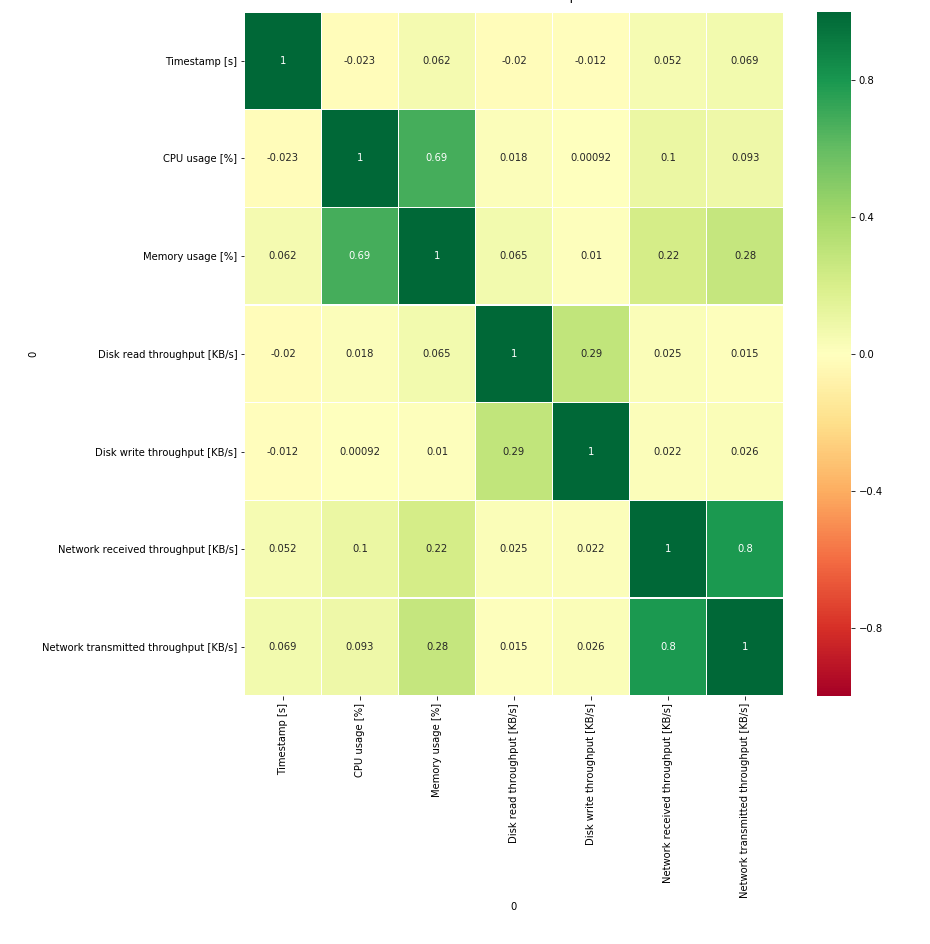

In [54]:
import seaborn as sns

DATA_COLUMNS = ["Memory usage [%]","CPU usage [%]", "Disk read throughput [KB/s]", 
             "Disk write throughput [KB/s]","Network received throughput [KB/s]", "Network transmitted throughput [KB/s]" ]
LABEL_COLUMN = "Memory usage [%]"
TIME_COLUMN = "Date"

# Convert time column to datetime
data[TIME_COLUMN] = pd.to_datetime(data[TIME_COLUMN])

# Sort data by time
data = data.sort_values(by=TIME_COLUMN)

# Get X, y and time
X = data[DATA_COLUMNS]
y = data[LABEL_COLUMN]

corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,12))
#plot heat map


g=sns.heatmap(data[top_corr_features].corr(), vmin=-1, vmax=1, annot=True,cmap="RdYlGn", linewidth=0.5)
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
g.figure.tight_layout()
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 10)
g.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.savefig('output1.png', dpi=300, bbox_inches='tight')

In [214]:
import seaborn as sns

DATA_COLUMNS = ["CPU usage [%]","Memory usage [%]", "Disk read throughput [KB/s]", 
             "Disk write throughput [KB/s]","Network received throughput [KB/s]", "Network transmitted throughput [KB/s]" ]
LABEL_COLUMN = "CPU usage [%]"
TIME_COLUMN = "Date"

# Convert time column to datetime
data[TIME_COLUMN] = pd.to_datetime(data[TIME_COLUMN])

# Sort data by time
data = data.sort_values(by=TIME_COLUMN)

# Get X, y and time
X = data[DATA_COLUMNS]
y = data[LABEL_COLUMN]

corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(), vmin=-1, vmax=1, annot=True,cmap="RdYlGn")
g.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.savefig('heatmap3.png')

<IPython.core.display.Javascript object>

#### Ensemble learning with feature selection

In [21]:
def ensemble_learning_weight_change_feature_selection(label_option, data, learning):
    '''
    The same ensemble learning = "ensemble_learning_weight_change_different_substract".
    However, this ensemble learning only uses 3 columns as DATA_COLUMNS, the ones that were the most important in the
    feature-selection.
    '''
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    from skmultiflow.trees import HoeffdingTreeRegressor
    from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor
    from skmultiflow.data import DataStream
    import numpy as np
    
       
    # Setup a data stream
    if(label_option == 0): #Predict "CPU usage [%]"
        DATA_COLUMNS = ["CPU usage [%]","Memory usage [%]", "Disk write throughput [KB/s]" ]
        LABEL_COLUMN = "CPU usage [%]"
    else: #Predict "Memory usage [%]"
        DATA_COLUMNS = ["Memory usage [%]","CPU usage [%]","Network received throughput [KB/s]", "Network transmitted throughput [KB/s]" ]
        LABEL_COLUMN = "Memory usage [%]"
    
    TIME_COLUMN = "Date"
    # Convert time column to datetime
    data[TIME_COLUMN] = pd.to_datetime(data[TIME_COLUMN])

    # Sort data by time
    data = data.sort_values(by=TIME_COLUMN)
    
    # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")

    #best_k = knn_best_n_neighbors(10,data)

    knn = KNNRegressor(n_neighbors = 1)
    ht_reg = HoeffdingTreeRegressor()
    hat_reg = HoeffdingAdaptiveTreeRegressor()
    
    best_previous_step = 0
    y_predictions = np.zeros(5)
    algorithm_weights = np.full(5,0.20)
        
    n_samples = 0
    correct_cnt = 0
    max_samples = num_rows
    y_previo = 0

    y_pred_ensem = np.zeros(max_samples)
    y_pred_knn = np.zeros(max_samples)
    y_pred_ht_reg = np.zeros(max_samples)
    y_pred_hat_reg= np.zeros(max_samples)
    y_pred_pers_model = np.zeros(max_samples)
    y_pred_arima_model = np.zeros(max_samples)

    y_true = np.zeros(max_samples)
    
    print(learning)

    while n_samples < max_samples and stream.has_more_samples():
        X, y = stream.next_sample()
        
        y_true[n_samples]= y[0]

        y_pred_ht_reg[n_samples] = y_predictions[0] = ht_reg.predict(X)[0]
        y_pred_hat_reg[n_samples] = y_predictions[1] = hat_reg.predict(X)[0]
        y_pred_knn[n_samples] = y_predictions[2] = knn.predict(X)[0]
        y_pred_pers_model[n_samples] = y_predictions[3] = y_previo
        y_pred_arima_model[n_samples] = y_predictions[4] = arimaModelv2(label_option, n_samples, DATA_COLUMNS, data)
        
        y_pred_ensem[n_samples] = (y_pred_ht_reg[n_samples]*algorithm_weights[0])+(y_pred_hat_reg[n_samples]*algorithm_weights[1])+(y_pred_knn[n_samples]*algorithm_weights[2])+(y_pred_pers_model[n_samples]*algorithm_weights[3])+(y_pred_arima_model[n_samples]*algorithm_weights[4])
                
        import operator
        
        best_previous_step, value = min(enumerate(abs(y_predictions-y[0])), key=operator.itemgetter(1))
        
        worst_previous_step = -1   
        worst_value = 0
        results = abs(y_predictions-y[0])
        
        for i in range(len(results)):
            if((results[i] >= worst_value) and (algorithm_weights[i]>0)):
                worst_value = results[i]
                worst_previous_step = i            
            
        if(worst_previous_step!=best_previous_step):
            algorithm_weights[best_previous_step] += (learning)
            if(algorithm_weights[worst_previous_step]<learning):
                worst_weight = algorithm_weights[worst_previous_step]
                algorithm_weights[worst_previous_step] = 0.0
                list_pos_with_values = []
                for i in range(len(results)):
                    if(i!=best_previous_step and algorithm_weights[i]>0.0):
                        list_pos_with_values.append(i)
                for i in list_pos_with_values:
                    algorithm_weights[i] -= (learning-worst_weight)/len(list_pos_with_values)
            else:
                algorithm_weights[worst_previous_step] -= (learning)
                
        for i in range(len(algorithm_weights)):
            if(algorithm_weights[i]>1.0): algorithm_weights[i] = 1.0
            if(algorithm_weights[i]<0.0): algorithm_weights[i] = 0.0
                    
        algorithm_weights /= sum(algorithm_weights)
        
        knn.partial_fit(X, y)
        ht_reg.partial_fit(X, y)
        hat_reg.partial_fit(X, y)

        y_previo = y[0]
        n_samples += 1
    
    if(label_option == 0): print('Ensemble learning "CPU usage [%]" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))
    else: print('Ensemble learning "Memory usage [%]" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))

In [25]:
for i in range(0,10):
    ensemble_learning_weight_change_feature_selection(0,data,i/10)
    ensemble_learning_weight_change_different_substract(0,data, i/10)

0.0
Ensemble learning "CPU usage [%]" mean absolute error: 2.5817585503900906
0.0
Ensemble learning "CPU usage [%]" mean absolute error: 3.981211557325837
0.1
Ensemble learning "CPU usage [%]" mean absolute error: 0.21590706049352337
0.1
Ensemble learning "CPU usage [%]" mean absolute error: 1.6393680782084457
0.2
Ensemble learning "CPU usage [%]" mean absolute error: 0.24987821120610648
0.2
Ensemble learning "CPU usage [%]" mean absolute error: 1.6034693330184813
0.3
Ensemble learning "CPU usage [%]" mean absolute error: 0.2885932036113899
0.3
Ensemble learning "CPU usage [%]" mean absolute error: 1.5181655886856253
0.4
Ensemble learning "CPU usage [%]" mean absolute error: 0.30178260014893993
0.4
Ensemble learning "CPU usage [%]" mean absolute error: 1.5238946000766382
0.5
Ensemble learning "CPU usage [%]" mean absolute error: 0.36966466747817395
0.5
Ensemble learning "CPU usage [%]" mean absolute error: 1.366200558071397
0.6
Ensemble learning "CPU usage [%]" mean absolute error: 0.4

In [231]:
for i in range(0,10):
    ensemble_learning_weight_change_feature_selection(1,data,i/10)
    ensemble_learning_weight_change_different_substract(1,data, i/10)

0.0
Ensemble learning "Memory usage [%]" mean absolute error: 10.580527195172326
0.0
Ensemble learning "Memory usage [%]" mean absolute error: 0.02188039398844296
0.1
Ensemble learning "Memory usage [%]" mean absolute error: 0.01005720429120525
0.1
Ensemble learning "Memory usage [%]" mean absolute error: 0.013791527633126634
0.2
Ensemble learning "Memory usage [%]" mean absolute error: 0.011483101567411561
0.2
Ensemble learning "Memory usage [%]" mean absolute error: 0.013817091156487861
0.3
Ensemble learning "Memory usage [%]" mean absolute error: 0.009277810926311759
0.3
Ensemble learning "Memory usage [%]" mean absolute error: 0.014704737128363744
0.4
Ensemble learning "Memory usage [%]" mean absolute error: 0.012987893922178466
0.4
Ensemble learning "Memory usage [%]" mean absolute error: 0.016245302586641867
0.5
Ensemble learning "Memory usage [%]" mean absolute error: 0.012131407683178748
0.5
Ensemble learning "Memory usage [%]" mean absolute error: 0.017795559450747834
0.6
Ense

In [26]:
def ensemble_learning_weight_change_feature_selection_two(label_option, data, learning):
    '''
    The same ensemble learning = "ensemble_learning_weight_change_different_substract".
    However, this ensemble learning only uses 2 columns as DATA_COLUMNS, the ones that were the most important in the
    feature-selection.
    '''
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    from skmultiflow.trees import HoeffdingTreeRegressor
    from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor
    from skmultiflow.data import DataStream
    import numpy as np
    
    # Setup a data stream
    if(label_option == 0): #Predict "CPU usage [%]"
        DATA_COLUMNS = ["Memory usage [%]", "CPU usage [%]" ]
        LABEL_COLUMN = "CPU usage [%]"
    else: #Predict "Memory usage [%]"
        DATA_COLUMNS = ["CPU usage [%]","Memory usage [%]"]
        LABEL_COLUMN = "Memory usage [%]"
    
    TIME_COLUMN = "Date"
    # Convert time column to datetime
    data[TIME_COLUMN] = pd.to_datetime(data[TIME_COLUMN])

    # Sort data by time
    data = data.sort_values(by=TIME_COLUMN)
    
    # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")

    #best_k = knn_best_n_neighbors(10,data)

    knn = KNNRegressor(n_neighbors = 1)
    ht_reg = HoeffdingTreeRegressor()
    hat_reg = HoeffdingAdaptiveTreeRegressor()
    
    best_previous_step = 0
    y_predictions = np.zeros(5)
    algorithm_weights = np.full(5,0.20)
        
    n_samples = 0
    correct_cnt = 0
    max_samples = num_rows
    y_previo = 0

    y_pred_ensem = np.zeros(max_samples)
    y_pred_knn = np.zeros(max_samples)
    y_pred_ht_reg = np.zeros(max_samples)
    y_pred_hat_reg= np.zeros(max_samples)
    y_pred_pers_model = np.zeros(max_samples)
    y_pred_arima_model = np.zeros(max_samples)
        
    y_true = np.zeros(max_samples)
    
    print(learning)

    while n_samples < max_samples and stream.has_more_samples():
        X, y = stream.next_sample()
        
        y_true[n_samples]= y[0]

        y_pred_ht_reg[n_samples] = y_predictions[0] = ht_reg.predict(X)[0]
        y_pred_hat_reg[n_samples] = y_predictions[1] = hat_reg.predict(X)[0]
        y_pred_knn[n_samples] = y_predictions[2] = knn.predict(X)[0]
        y_pred_pers_model[n_samples] = y_predictions[3] = y_previo
        y_pred_arima_model[n_samples] = y_predictions[4] = arimaModelv2(label_option, n_samples,DATA_COLUMNS, data)
        
        y_pred_ensem[n_samples] = (y_pred_ht_reg[n_samples]*algorithm_weights[0])+(y_pred_hat_reg[n_samples]*algorithm_weights[1])+(y_pred_knn[n_samples]*algorithm_weights[2])+(y_pred_pers_model[n_samples]*algorithm_weights[3])+(y_pred_arima_model[n_samples]*algorithm_weights[4])
                
        import operator
        
        best_previous_step, value = min(enumerate(abs(y_predictions-y[0])), key=operator.itemgetter(1))
        
        worst_previous_step = -1   
        worst_value = 0
        results = abs(y_predictions-y[0])
        
        for i in range(len(results)):
            if((results[i] >= worst_value) and (algorithm_weights[i]>0)):
                worst_value = results[i]
                worst_previous_step = i            
            
        if(worst_previous_step!=best_previous_step):
            algorithm_weights[best_previous_step] += (learning)
            if(algorithm_weights[worst_previous_step]<learning):
                worst_weight = algorithm_weights[worst_previous_step]
                algorithm_weights[worst_previous_step] = 0.0
                list_pos_with_values = []
                for i in range(len(results)):
                    if(i!=best_previous_step and algorithm_weights[i]>0.0):
                        list_pos_with_values.append(i)
                for i in list_pos_with_values:
                    algorithm_weights[i] -= (learning-worst_weight)/len(list_pos_with_values)
            else:
                algorithm_weights[worst_previous_step] -= (learning)
           
        for i in range(len(algorithm_weights)):
            if(algorithm_weights[i]>1.0): algorithm_weights[i] = 1.0
            if(algorithm_weights[i]<0.0): algorithm_weights[i] = 0.0
                    
        algorithm_weights /= sum(algorithm_weights)
        

        knn.partial_fit(X, y)
        ht_reg.partial_fit(X, y)
        hat_reg.partial_fit(X, y)

        y_previo = y[0]
        n_samples += 1
    
    if(label_option == 0): print('Ensemble learning "CPU usage [%]" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))
    else: print('Ensemble learning "Memory usage [%]" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))

In [234]:
def ensemble_learning_weight_change_feature_selection_three(label_option, data, learning):
    '''
    The same ensemble learning = "ensemble_learning_weight_change_different_substract".
    However, this ensemble learning only uses 2 columns as DATA_COLUMNS, the ones that were the most important in the
    feature-selection.
    '''
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    from skmultiflow.trees import HoeffdingTreeRegressor
    from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor
    from skmultiflow.data import DataStream
    import numpy as np
    
    # Setup a data stream
    if(label_option == 0): #Predict "CPU usage [%]"
        DATA_COLUMNS = ["Memory usage [%]", "CPU usage [%]","Network received throughput [KB/s]"]
        LABEL_COLUMN = "CPU usage [%]"
    else: #Predict "Memory usage [%]"
        DATA_COLUMNS = ["CPU usage [%]","Network received throughput [KB/s]", "Network transmitted throughput [KB/s]" ]
        LABEL_COLUMN = "Memory usage [%]"
    
    TIME_COLUMN = "Date"
    # Convert time column to datetime
    data[TIME_COLUMN] = pd.to_datetime(data[TIME_COLUMN])

    # Sort data by time
    data = data.sort_values(by=TIME_COLUMN)
    
    # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")

    #best_k = knn_best_n_neighbors(10,data)

    knn = KNNRegressor(n_neighbors = 1)
    ht_reg = HoeffdingTreeRegressor()
    hat_reg = HoeffdingAdaptiveTreeRegressor()
    
    best_previous_step = 0
    y_predictions = np.zeros(5)
    algorithm_weights = np.full(5,0.20)
        
    n_samples = 0
    correct_cnt = 0
    max_samples = num_rows
    y_previo = 0

    y_pred_ensem = np.zeros(max_samples)
    y_pred_knn = np.zeros(max_samples)
    y_pred_ht_reg = np.zeros(max_samples)
    y_pred_hat_reg= np.zeros(max_samples)
    y_pred_pers_model = np.zeros(max_samples)
    y_pred_arima_model = np.zeros(max_samples)
        
    y_true = np.zeros(max_samples)
    
    print(learning)

    while n_samples < max_samples and stream.has_more_samples():
        X, y = stream.next_sample()
        
        y_true[n_samples]= y[0]

        y_pred_ht_reg[n_samples] = y_predictions[0] = ht_reg.predict(X)[0]
        y_pred_hat_reg[n_samples] = y_predictions[1] = hat_reg.predict(X)[0]
        y_pred_knn[n_samples] = y_predictions[2] = knn.predict(X)[0]
        y_pred_pers_model[n_samples] = y_predictions[3] = y_previo
        y_pred_arima_model[n_samples] = y_predictions[4] = arimaModelv2(label_option, n_samples,DATA_COLUMNS, data)
        
        y_pred_ensem[n_samples] = (y_pred_ht_reg[n_samples]*algorithm_weights[0])+(y_pred_hat_reg[n_samples]*algorithm_weights[1])+(y_pred_knn[n_samples]*algorithm_weights[2])+(y_pred_pers_model[n_samples]*algorithm_weights[3])+(y_pred_arima_model[n_samples]*algorithm_weights[4])
                
        import operator
        
        best_previous_step, value = min(enumerate(abs(y_predictions-y[0])), key=operator.itemgetter(1))
        
        worst_previous_step = -1   
        worst_value = 0
        results = abs(y_predictions-y[0])
        
        for i in range(len(results)):
            if((results[i] >= worst_value) and (algorithm_weights[i]>0)):
                worst_value = results[i]
                worst_previous_step = i            
            
        if(worst_previous_step!=best_previous_step):
            algorithm_weights[best_previous_step] += (learning)
            if(algorithm_weights[worst_previous_step]<learning):
                worst_weight = algorithm_weights[worst_previous_step]
                algorithm_weights[worst_previous_step] = 0.0
                list_pos_with_values = []
                for i in range(len(results)):
                    if(i!=best_previous_step and algorithm_weights[i]>0.0):
                        list_pos_with_values.append(i)
                for i in list_pos_with_values:
                    algorithm_weights[i] -= (learning-worst_weight)/len(list_pos_with_values)
            else:
                algorithm_weights[worst_previous_step] -= (learning)
           
        for i in range(len(algorithm_weights)):
            if(algorithm_weights[i]>1.0): algorithm_weights[i] = 1.0
            if(algorithm_weights[i]<0.0): algorithm_weights[i] = 0.0
                    
        algorithm_weights /= sum(algorithm_weights)
        

        knn.partial_fit(X, y)
        ht_reg.partial_fit(X, y)
        hat_reg.partial_fit(X, y)

        y_previo = y[0]
        n_samples += 1
    
    if(label_option == 0): print('Ensemble learning "CPU usage [%]" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))
    else: print('Ensemble learning "Memory usage [%]" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))

In [29]:
for i in range(0,10):
    ensemble_learning_weight_change_feature_selection(0,data,i/10)
    ensemble_learning_weight_change_feature_selection_two(0,data,i/10)

0.0
Ensemble learning "CPU usage [%]" mean absolute error: 2.7840597225691974
0.0
Ensemble learning "CPU usage [%]" mean absolute error: 10.534138421819927
0.1
Ensemble learning "CPU usage [%]" mean absolute error: 0.21315588490130163
0.1
Ensemble learning "CPU usage [%]" mean absolute error: 0.09204686002578315
0.2
Ensemble learning "CPU usage [%]" mean absolute error: 0.2692070103831033
0.2
Ensemble learning "CPU usage [%]" mean absolute error: 0.09654295133399723
0.3
Ensemble learning "CPU usage [%]" mean absolute error: 0.30927427559936377
0.3
Ensemble learning "CPU usage [%]" mean absolute error: 0.10084649188499868
0.4
Ensemble learning "CPU usage [%]" mean absolute error: 0.34307263450264713
0.4
Ensemble learning "CPU usage [%]" mean absolute error: 0.10982976357643591
0.5
Ensemble learning "CPU usage [%]" mean absolute error: 0.38901415523436955
0.5
Ensemble learning "CPU usage [%]" mean absolute error: 0.13578947565742358
0.6
Ensemble learning "CPU usage [%]" mean absolute err

In [236]:
for i in range(0,10):
    ensemble_learning_weight_change_feature_selection(1,data,i/10)
    ensemble_learning_weight_change_feature_selection_two(1,data,i/10)
    ensemble_learning_weight_change_feature_selection_three(1,data,i/10)

0.0
Ensemble learning "Memory usage [%]" mean absolute error: 10.581035148612315
0.0
Ensemble learning "Memory usage [%]" mean absolute error: 0.015414353580064655
0.0
Ensemble learning "Memory usage [%]" mean absolute error: 221.6883780082274
0.1
Ensemble learning "Memory usage [%]" mean absolute error: 0.01030232450533111
0.1
Ensemble learning "Memory usage [%]" mean absolute error: 0.008161153668817004
0.1
Ensemble learning "Memory usage [%]" mean absolute error: 0.0268311625591455
0.2
Ensemble learning "Memory usage [%]" mean absolute error: 0.012443457010510124
0.2
Ensemble learning "Memory usage [%]" mean absolute error: 0.0129427229278214
0.2
Ensemble learning "Memory usage [%]" mean absolute error: 0.028121024871922487
0.3
Ensemble learning "Memory usage [%]" mean absolute error: 0.012452906134422525
0.3
Ensemble learning "Memory usage [%]" mean absolute error: 0.010725936046694392
0.3
Ensemble learning "Memory usage [%]" mean absolute error: 0.028807890062755914
0.4
Ensemble l

###  Ensemble learning modifying weights of more than one algorithm

In [242]:
def ensemble_learning_weight_change_multiple_modification(label_option, data, learning):
    '''
    The same ensemble learning = "ensemble_learning_weight_change_feature_selection".
    However, this ensemble learning modifies the weight of more than one algorithm in the event that there are
    more than one that are equally accurate.
    '''
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    from skmultiflow.trees import HoeffdingTreeRegressor
    from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor
    from skmultiflow.data import DataStream
    import numpy as np
    
    # Setup a data stream
    if(label_option == 0): #Predict "CPU usage [%]"
        DATA_COLUMNS = ["Memory usage [%]", "CPU usage [%]"]
        LABEL_COLUMN = "CPU usage [%]"
    else: #Predict "Memory usage [%]"
        DATA_COLUMNS = ["CPU usage [%]", "Memory usage [%]"]
        LABEL_COLUMN = "Memory usage [%]"
    
    TIME_COLUMN = "Date"
    # Convert time column to datetime
    data[TIME_COLUMN] = pd.to_datetime(data[TIME_COLUMN])

    # Sort data by time
    data = data.sort_values(by=TIME_COLUMN)
    
    # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")

    #best_k = knn_best_n_neighbors(10,data)

    knn = KNNRegressor(n_neighbors = 1)
    ht_reg = HoeffdingTreeRegressor()
    hat_reg = HoeffdingAdaptiveTreeRegressor()
    
    best_previous_step = []
    best_value = []
    y_predictions = np.zeros(5)
    algorithm_weights = np.full(5,0.20)
        
    n_samples = 0
    correct_cnt = 0
    max_samples = num_rows
    y_previo = 0

    y_pred_ensem = np.zeros(max_samples)
    y_pred_knn = np.zeros(max_samples)
    y_pred_ht_reg = np.zeros(max_samples)
    y_pred_hat_reg= np.zeros(max_samples)
    y_pred_pers_model = np.zeros(max_samples)
    y_pred_arima_model = np.zeros(max_samples)

    y_true = np.zeros(max_samples)
    
    print(learning)

    while n_samples < max_samples and stream.has_more_samples():
        X, y = stream.next_sample()
        
        y_true[n_samples]= y[0]

        y_pred_ht_reg[n_samples] = y_predictions[0] = ht_reg.predict(X)[0]
        y_pred_hat_reg[n_samples] = y_predictions[1] = hat_reg.predict(X)[0]
        y_pred_knn[n_samples] = y_predictions[2] = knn.predict(X)[0]
        y_pred_pers_model[n_samples] = y_predictions[3] = y_previo
        y_pred_arima_model[n_samples] = y_predictions[4] = arimaModelv2(label_option, n_samples,DATA_COLUMNS, data)
        
        y_pred_ensem[n_samples] = (y_pred_ht_reg[n_samples]*algorithm_weights[0])+(y_pred_hat_reg[n_samples]*algorithm_weights[1])+(y_pred_knn[n_samples]*algorithm_weights[2])+(y_pred_pers_model[n_samples]*algorithm_weights[3])+(y_pred_arima_model[n_samples]*algorithm_weights[4])
                       
        import operator
        
        worst_previous_step = -1   
        worst_value = 0
        results = abs(y_predictions-y[0])
        
        best_value.append(results[0])
        best_previous_step.append(0) 
        
        for i in range(1, len(results)):
            if(results[i] < best_value[0]):
                best_value.clear()
                best_previous_step.clear()
                best_value.append(results[i])
                best_previous_step.append(i)
            elif(results[i] == best_value[0]):
                best_value.append(results[i])
                best_previous_step.append(i)
                
        for best_step in best_previous_step:
            
            for i in range(len(results)):
                if((results[i] >= worst_value) and (algorithm_weights[i]>0)):
                    worst_value = results[i]
                    worst_previous_step = i            

            if(worst_previous_step!=best_step):
                algorithm_weights[best_step] += (learning)
                if(algorithm_weights[worst_previous_step]<learning):
                    worst_weight = algorithm_weights[worst_previous_step]
                    algorithm_weights[worst_previous_step] = 0.0
                    list_pos_with_values = []
                    for i in range(len(results)):
                        if(i!=best_step and algorithm_weights[i]>0.0):
                            list_pos_with_values.append(i)
                    for i in list_pos_with_values:
                        algorithm_weights[i] -= (learning-worst_weight)/len(list_pos_with_values)
                else:
                    algorithm_weights[worst_previous_step] -= (learning)
                
        for i in range(len(algorithm_weights)):
            if(algorithm_weights[i]>1.0): algorithm_weights[i] = 1.0
            if(algorithm_weights[i]<0.0): algorithm_weights[i] = 0.0
                    
        algorithm_weights /= sum(algorithm_weights)
        
        best_value.clear()
        best_previous_step.clear()
        
        knn.partial_fit(X, y)
        ht_reg.partial_fit(X, y)
        hat_reg.partial_fit(X, y)

        y_previo = y[0]
        n_samples += 1
    
    if(label_option == 0): print('Ensemble learning "CPU usage [%]" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))
    else: print('Ensemble learning "Memory usage [%]" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))

In [238]:
def ensemble_learning_weight_change_multiple_modification_equality(label_option, data, learning):
    '''
    The same ensemble learning = "ensemble_learning_weight_change_multiple_modification".
    However, this ensemble learning does not modify the weights in the first iteration
    and in the case of decreasing the worst algorithm, between two that are equally bad 
    is prioritize to reduce the one with the most weight.
    '''
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    from skmultiflow.trees import HoeffdingTreeRegressor
    from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor
    from skmultiflow.data import DataStream
    import numpy as np
    
    # Setup a data stream
    if(label_option == 0): #Predict "CPU usage [%]"
        DATA_COLUMNS = ["Memory usage [%]", "CPU usage [%]"]
        LABEL_COLUMN = "CPU usage [%]"
    else: #Predict "Memory usage [%]"
        DATA_COLUMNS = ["CPU usage [%]","Memory usage [%]"]
        LABEL_COLUMN = "Memory usage [%]"
    
    TIME_COLUMN = "Date"
    # Convert time column to datetime
    data[TIME_COLUMN] = pd.to_datetime(data[TIME_COLUMN])

    # Sort data by time
    data = data.sort_values(by=TIME_COLUMN)
    
    # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")

    #best_k = knn_best_n_neighbors(10,data)

    knn = KNNRegressor(n_neighbors = 1)
    ht_reg = HoeffdingTreeRegressor()
    hat_reg = HoeffdingAdaptiveTreeRegressor()
    
    best_previous_step = []
    best_value = []
    y_predictions = np.zeros(5)
    algorithm_weights = np.full(5,0.20)
        
    n_samples = 0
    correct_cnt = 0
    max_samples = num_rows
    y_previo = 0

    y_pred_ensem = np.zeros(max_samples)
    y_pred_knn = np.zeros(max_samples)
    y_pred_ht_reg = np.zeros(max_samples)
    y_pred_hat_reg= np.zeros(max_samples)
    y_pred_pers_model = np.zeros(max_samples)
    y_pred_arima_model = np.zeros(max_samples)
    
    y_true = np.zeros(max_samples)
    
    print(learning)

    while n_samples < max_samples and stream.has_more_samples():
        
        X, y = stream.next_sample()
        
        y_true[n_samples]= y[0]

        y_pred_ht_reg[n_samples] = y_predictions[0] = ht_reg.predict(X)[0]
        y_pred_hat_reg[n_samples] = y_predictions[1] = hat_reg.predict(X)[0]
        y_pred_knn[n_samples] = y_predictions[2] = knn.predict(X)[0]
        y_pred_pers_model[n_samples] = y_predictions[3] = y_previo
        y_pred_arima_model[n_samples] = y_predictions[4] = arimaModelv2(label_option, n_samples,DATA_COLUMNS, data)
        
        y_pred_ensem[n_samples] = (y_pred_ht_reg[n_samples]*algorithm_weights[0])+(y_pred_hat_reg[n_samples]*algorithm_weights[1])+(y_pred_knn[n_samples]*algorithm_weights[2])+(y_pred_pers_model[n_samples]*algorithm_weights[3])+(y_pred_arima_model[n_samples]*algorithm_weights[4])
    
        worst_previous_step = -1   
        worst_value = 0
        results = abs(y_predictions-y[0])
        
        best_value.append(results[0])
        best_previous_step.append(0) 
        
        if(n_samples>0):
            for i in range(1, len(results)):
                if(results[i] < best_value[0]):
                    best_value.clear()
                    best_previous_step.clear()
                    best_value.append(results[i])
                    best_previous_step.append(i)
                elif(results[i] == best_value[0]):
                    best_value.append(results[i])
                    best_previous_step.append(i)

            for best_step in best_previous_step:
                for i in range(len(results)):
                    if (algorithm_weights[i]>0):
                        if(results[i] > worst_value):
                            worst_value = results[i]
                            worst_previous_step = i
                        elif((results[i] == worst_value) and (algorithm_weights[i]>algorithm_weights[worst_previous_step])):
                            worst_value = results[i]
                            worst_previous_step = i 

                if(worst_previous_step!=best_step):
                    algorithm_weights[best_step] += (learning)
                    if(algorithm_weights[worst_previous_step]<learning):
                        worst_weight = algorithm_weights[worst_previous_step]
                        algorithm_weights[worst_previous_step] = 0.0
                        list_pos_with_values = []
                        for i in range(len(results)):
                            if(i!=best_step and algorithm_weights[i]>0.0):
                                list_pos_with_values.append(i)
                        for i in list_pos_with_values:
                            algorithm_weights[i] -= (learning-worst_weight)/len(list_pos_with_values)
                    else:
                        algorithm_weights[worst_previous_step] -= (learning)

            for i in range(len(algorithm_weights)):
                if(algorithm_weights[i]>1.0): algorithm_weights[i] = 1.0
                if(algorithm_weights[i]<0.0): algorithm_weights[i] = 0.0

            algorithm_weights /= sum(algorithm_weights)
        
        best_value.clear()
        best_previous_step.clear()
        
        knn.partial_fit(X, y)
        ht_reg.partial_fit(X, y)
        hat_reg.partial_fit(X, y)

        y_previo = y[0]
        n_samples += 1
    
    if(label_option == 0): print('Ensemble learning "CPU usage [%]" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))
    else: print('Ensemble learning "Memory usage [%]" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))

In [243]:
for i in range(0,10):
    ensemble_learning_weight_change_multiple_modification(0,data,i/10)
    ensemble_learning_weight_change_multiple_modification_equality(0,data,i/10)

0.0
Ensemble learning "CPU usage [%]" mean absolute error: 10.13443155025084
0.0
Ensemble learning "CPU usage [%]" mean absolute error: 9.655145055156066
0.1
Ensemble learning "CPU usage [%]" mean absolute error: 0.1045306286436681
0.1
Ensemble learning "CPU usage [%]" mean absolute error: 0.1679257539313006
0.2
Ensemble learning "CPU usage [%]" mean absolute error: 0.1283765289463882
0.2
Ensemble learning "CPU usage [%]" mean absolute error: 0.18933970117411986
0.3
Ensemble learning "CPU usage [%]" mean absolute error: 0.14372623749180188
0.3
Ensemble learning "CPU usage [%]" mean absolute error: 0.18608778079576554
0.4
Ensemble learning "CPU usage [%]" mean absolute error: 0.17650802716454203
0.4
Ensemble learning "CPU usage [%]" mean absolute error: 0.23263035995816328
0.5
Ensemble learning "CPU usage [%]" mean absolute error: 0.18605023317631927
0.5
Ensemble learning "CPU usage [%]" mean absolute error: 0.2570394825892657
0.6
Ensemble learning "CPU usage [%]" mean absolute error: 0

In [244]:
for i in range(0,10):
    ensemble_learning_weight_change_multiple_modification(1,data,i/10)
    ensemble_learning_weight_change_multiple_modification_equality(1,data,i/10)

0.0
Ensemble learning "Memory usage [%]" mean absolute error: 0.016950254724872355
0.0
Ensemble learning "Memory usage [%]" mean absolute error: 0.016392010106625197
0.1
Ensemble learning "Memory usage [%]" mean absolute error: 0.008709677531412293
0.1
Ensemble learning "Memory usage [%]" mean absolute error: 0.0047122021233726614
0.2
Ensemble learning "Memory usage [%]" mean absolute error: 0.006819388622000572
0.2
Ensemble learning "Memory usage [%]" mean absolute error: 0.011555371159365838
0.3
Ensemble learning "Memory usage [%]" mean absolute error: 0.010556301887019823
0.3
Ensemble learning "Memory usage [%]" mean absolute error: 0.012265080299452938
0.4
Ensemble learning "Memory usage [%]" mean absolute error: 0.009706384636217286
0.4
Ensemble learning "Memory usage [%]" mean absolute error: 0.010490067718091684
0.5
Ensemble learning "Memory usage [%]" mean absolute error: 0.004220367655556305
0.5
Ensemble learning "Memory usage [%]" mean absolute error: 0.00854812973107426
0.6


### Ensemble learning with multiple KNN

In [80]:
def multiple_knn(label_option, data, learning, maximum):
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    from skmultiflow.trees import HoeffdingTreeRegressor
    from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor
    from skmultiflow.data import DataStream
    import numpy as np
    
    # Setup a data stream
    if(label_option == 0): #Predict "CPU usage [%]"
        DATA_COLUMNS = ["Memory usage [%]", "CPU usage [%]"]
        LABEL_COLUMN = "CPU usage [%]"
    else: #Predict "Memory usage [%]"
        DATA_COLUMNS = ["CPU usage [%]","Memory usage [%]"]
        LABEL_COLUMN = "Memory usage [%]"
    
    TIME_COLUMN = "Date"
    # Convert time column to datetime
    data[TIME_COLUMN] = pd.to_datetime(data[TIME_COLUMN])

    # Sort data by time
    data = data.sort_values(by=TIME_COLUMN)
    
    # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")
    
    max_samples = num_rows
    
    creation_counter = 0
    for i in range(1,maximum+1,5):    
        name_variable = "knn_" + str(i)
        locals()[name_variable]= KNNRegressor(n_neighbors = i)
        creation_counter += 1
        name_variable = "y_pred_knn_" + str(i)
        locals()[name_variable] = np.zeros(max_samples)
        
    ht_reg = HoeffdingTreeRegressor()
    hat_reg = HoeffdingAdaptiveTreeRegressor()
    
    best_previous_step = []
    best_value = []
    
    total_number_models = 4+creation_counter
    y_predictions = np.zeros(total_number_models)
    algorithm_weights = np.full( total_number_models,1/total_number_models)
    
        
    n_samples = 0
    correct_cnt = 0
    y_previo = 0

    y_pred_ensem = np.zeros(max_samples)
    y_pred_ht_reg = np.zeros(max_samples)
    y_pred_hat_reg= np.zeros(max_samples)
    y_pred_pers_model = np.zeros(max_samples)
    y_pred_arima_model = np.zeros(max_samples)
    
    y_true = np.zeros(max_samples)
    
    print(learning)

    while n_samples < max_samples and stream.has_more_samples():
        
        X, y = stream.next_sample()
        
        y_true[n_samples]= y[0]

        y_pred_ht_reg[n_samples] = y_predictions[0] = ht_reg.predict(X)[0]
        y_pred_hat_reg[n_samples] = y_predictions[1] = hat_reg.predict(X)[0]
        y_pred_pers_model[n_samples] = y_predictions[2] = y_previo
        y_pred_arima_model[n_samples] = y_predictions[3] = arimaModelv2(label_option, n_samples,DATA_COLUMNS, data)
        
        begin = 4
        for i in range(1,maximum+1,5):    
            name_variable = "y_pred_knn_" + str(i) +"[n_samples]"
            name_algorithm = "knn_" + str(i)
            locals()[name_variable] = y_predictions[begin] = locals()[name_algorithm].predict(X)[0]
            begin += 1
        
        static_models = (y_pred_ht_reg[n_samples]*algorithm_weights[0])+(y_pred_hat_reg[n_samples]*algorithm_weights[1])+(y_pred_pers_model[n_samples]*algorithm_weights[2])+(y_pred_arima_model[n_samples]*algorithm_weights[3])
                
        begin = 4
        for i in range(1,maximum+1,5):     
            name_variable = "y_pred_knn_" + str(i) +"[n_samples]"
            static_models += (locals()[name_variable] * algorithm_weights[begin])
            begin += 1
        
        y_pred_ensem[n_samples] = static_models
        
        worst_previous_step = -1   
        worst_value = 0
        results = abs(y_predictions-y[0])
        
        best_value.append(results[0])
        best_previous_step.append(0) 
        
        if(n_samples>0):
            for i in range(1, len(results)):
                if(results[i] < best_value[0]):
                    best_value.clear()
                    best_previous_step.clear()
                    best_value.append(results[i])
                    best_previous_step.append(i)
                elif(results[i] == best_value[0]):
                    best_value.append(results[i])
                    best_previous_step.append(i)

            for best_step in best_previous_step:
                for i in range(len(results)):
                    if (algorithm_weights[i]>0):
                        if(results[i] > worst_value):
                            worst_value = results[i]
                            worst_previous_step = i
                        elif((results[i] == worst_value) and (algorithm_weights[i]>algorithm_weights[worst_previous_step])):
                            worst_value = results[i]
                            worst_previous_step = i 

                if(worst_previous_step!=best_step):
                    algorithm_weights[best_step] += (learning)
                    if(algorithm_weights[worst_previous_step]<learning):
                        worst_weight = algorithm_weights[worst_previous_step]
                        algorithm_weights[worst_previous_step] = 0.0
                        list_pos_with_values = []
                        for i in range(len(results)):
                            if(i!=best_step and algorithm_weights[i]>0.0):
                                list_pos_with_values.append(i)
                        for i in list_pos_with_values:
                            algorithm_weights[i] -= (learning-worst_weight)/len(list_pos_with_values)
                    else:
                        algorithm_weights[worst_previous_step] -= (learning)

            for i in range(len(algorithm_weights)):
                if(algorithm_weights[i]>1.0): algorithm_weights[i] = 1.0
                if(algorithm_weights[i]<0.0): algorithm_weights[i] = 0.0

            algorithm_weights /= sum(algorithm_weights)
        
        best_value.clear()
        best_previous_step.clear()
        
    
        ht_reg.partial_fit(X, y)
        hat_reg.partial_fit(X, y)
        
        for i in range(1,maximum+1,5):    
            name_variable = "knn_" + str(i)
            locals()[name_variable].fit(X,y)
        
        y_previo = y[0]
        n_samples += 1
    
    if(label_option == 0): print('Ensemble learning "CPU usage [%]" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))
    else: print('Ensemble learning "Memory usage [%]" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))

    

In [82]:
for i in range(0,10):
    multiple_knn(0,data,i/10,26)

0.0
Ensemble learning "CPU usage [%]" mean absolute error: 5.092722244653355
0.1
Ensemble learning "CPU usage [%]" mean absolute error: 0.11531458550139265
0.2
Ensemble learning "CPU usage [%]" mean absolute error: 0.12510025613418854
0.3
Ensemble learning "CPU usage [%]" mean absolute error: 0.13885579195613343
0.4
Ensemble learning "CPU usage [%]" mean absolute error: 0.133985566956616
0.5
Ensemble learning "CPU usage [%]" mean absolute error: 0.144315349084354
0.6
Ensemble learning "CPU usage [%]" mean absolute error: 0.12431898603518331
0.7
Ensemble learning "CPU usage [%]" mean absolute error: 0.13860240333992646
0.8
Ensemble learning "CPU usage [%]" mean absolute error: 0.16071660024236664
0.9
Ensemble learning "CPU usage [%]" mean absolute error: 0.16020345005542902


In [83]:
for i in range(0,10):
    multiple_knn(1,data,i/10,26)

0.0
Ensemble learning "Memory usage [%]" mean absolute error: 0.02126565126573652
0.1
Ensemble learning "Memory usage [%]" mean absolute error: 0.009284967633593462
0.2
Ensemble learning "Memory usage [%]" mean absolute error: 0.011137727947355493
0.3
Ensemble learning "Memory usage [%]" mean absolute error: 0.01001565499117327
0.4
Ensemble learning "Memory usage [%]" mean absolute error: 0.013733631142136894
0.5
Ensemble learning "Memory usage [%]" mean absolute error: 0.011181920492187468
0.6
Ensemble learning "Memory usage [%]" mean absolute error: 0.013358731834136644
0.7
Ensemble learning "Memory usage [%]" mean absolute error: 0.013930561631070272
0.8
Ensemble learning "Memory usage [%]" mean absolute error: 0.013839567572722098
0.9
Ensemble learning "Memory usage [%]" mean absolute error: 0.01203480986966217


###  Results in real time 

In [245]:
def ensemble_learning_weight_change_multiple_modification_equality_show(label_option, data, learning):
    '''
    The same ensemble learning = "ensemble_learning_weight_change_multiple_modification".
    However, this ensemble learning does not modify the weights in the first iteration
    and in the case of decreasing the worst algorithm, between two that are equally bad 
    is prioritize to reduce the one with the most weight.
    '''
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    from skmultiflow.trees import HoeffdingTreeRegressor
    from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor
    from skmultiflow.data import DataStream
    from skmultiflow.evaluation import EvaluatePrequential
    import numpy as np
    
    # Setup a data stream
    if(label_option == 0): #Predict "CPU usage [%]"
        DATA_COLUMNS = ["Memory usage [%]", "CPU usage [%]" ]
        LABEL_COLUMN = "CPU usage [%]"
    else: #Predict "Memory usage [%]"
        DATA_COLUMNS = ["CPU usage [%]","Memory usage [%]" ]
        LABEL_COLUMN = "Memory usage [%]"
    
    TIME_COLUMN = "Date"
    # Convert time column to datetime
    data[TIME_COLUMN] = pd.to_datetime(data[TIME_COLUMN])

    # Sort data by time
    data = data.sort_values(by=TIME_COLUMN)
    
    # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")

    #best_k = knn_best_n_neighbors(10,data)

    knn = KNNRegressor(n_neighbors = 1)
    ht_reg = HoeffdingTreeRegressor()
    hat_reg = HoeffdingAdaptiveTreeRegressor()
    
    best_previous_step = []
    best_value = []
    y_predictions = np.zeros(5)
    algorithm_weights = np.full(5,0.20)
        
    n_samples = 0
    correct_cnt = 0
    max_samples = num_rows
    y_previo = 0

    y_pred_ensem = np.zeros(max_samples)
    y_pred_knn = np.zeros(max_samples)
    y_pred_ht_reg = np.zeros(max_samples)
    y_pred_hat_reg= np.zeros(max_samples)
    y_pred_pers_model = np.zeros(max_samples)
    y_pred_arima_model = np.zeros(max_samples)
    
    y_true = np.zeros(max_samples)
    
    metrics = ['mean_square_error', 'mean_absolute_error', 'true_vs_predicted']
    evaluator = EvaluatePrequential(n_wait=1,max_samples=num_rows,metrics=metrics, pretrain_size=1, show_plot=True)

    evaluator.evaluate(stream=stream, model=[ht_reg, hat_reg, knn], model_names=["HTR", "HAT", "KNN"])

    print(learning)

    while n_samples < max_samples and stream.has_more_samples():
        
        X, y = stream.next_sample()
        
        y_true[n_samples]= y[0]

        y_pred_ht_reg[n_samples] = y_predictions[0] = ht_reg.predict(X)[0]
        y_pred_hat_reg[n_samples] = y_predictions[1] = hat_reg.predict(X)[0]
        y_pred_knn[n_samples] = y_predictions[2] = knn.predict(X)[0]
        y_pred_pers_model[n_samples] = y_predictions[3] = y_previo
        y_pred_arima_model[n_samples] = y_predictions[4] = arimaModelv2(label_option, n_samples,DATA_COLUMNS, data)
        
        y_pred_ensem[n_samples] = (y_pred_ht_reg[n_samples]*algorithm_weights[0])+(y_pred_hat_reg[n_samples]*algorithm_weights[1])+(y_pred_knn[n_samples]*algorithm_weights[2])
        +(y_pred_pers_model[n_samples]*algorithm_weights[3])+(y_pred_arima_model[n_samples]*algorithm_weights[4])
    
        worst_previous_step = -1   
        worst_value = 0
        results = abs(y_predictions-y[0])
        
        best_value.append(results[0])
        best_previous_step.append(0) 
        
        if(n_samples>0):
            for i in range(1, len(results)):
                if(results[i] < best_value[0]):
                    best_value.clear()
                    best_previous_step.clear()
                    best_value.append(results[i])
                    best_previous_step.append(i)
                elif(results[i] == best_value[0]):
                    best_value.append(results[i])
                    best_previous_step.append(i)

            for best_step in best_previous_step:
                for i in range(len(results)):
                    if (algorithm_weights[i]>0):
                        if(results[i] > worst_value):
                            worst_value = results[i]
                            worst_previous_step = i
                        elif((results[i] == worst_value) and (algorithm_weights[i]>algorithm_weights[worst_previous_step])):
                            worst_value = results[i]
                            worst_previous_step = i 

                if(worst_previous_step!=best_step):
                    algorithm_weights[best_step] += (learning)
                    if(algorithm_weights[worst_previous_step]<learning):
                        worst_weight = algorithm_weights[worst_previous_step]
                        algorithm_weights[worst_previous_step] = 0.0
                        list_pos_with_values = []
                        for i in range(len(results)):
                            if(i!=best_step and algorithm_weights[i]>0.0):
                                list_pos_with_values.append(i)
                        for i in list_pos_with_values:
                            algorithm_weights[i] -= (learning-worst_weight)/len(list_pos_with_values)
                    else:
                        algorithm_weights[worst_previous_step] -= (learning)

            for i in range(len(algorithm_weights)):
                if(algorithm_weights[i]>1.0): algorithm_weights[i] = 1.0
                if(algorithm_weights[i]<0.0): algorithm_weights[i] = 0.0

            algorithm_weights /= sum(algorithm_weights)
        
        best_value.clear()
        best_previous_step.clear()
        
        knn.partial_fit(X, y)
        ht_reg.partial_fit(X, y)
        hat_reg.partial_fit(X, y)

        y_previo = y[0]
        n_samples += 1
    
    if(label_option == 0): print('Ensemble learning "CPU usage [%]" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))
    else: print('Ensemble learning "Memory usage [%]" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))

<IPython.core.display.Javascript object>


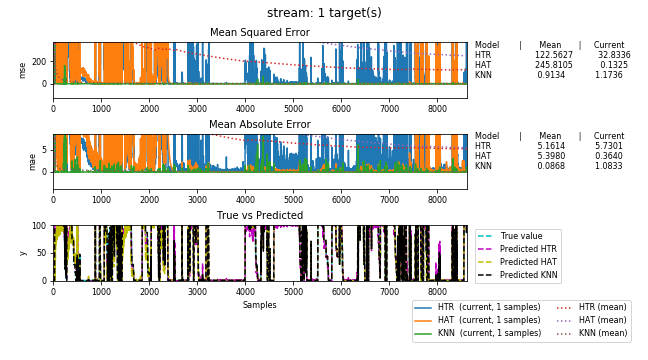

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #################### [100%] [358.81s]
Processed samples: 8617
Mean performance:
HTR - MSE          : 122.5627
HTR - MAE          : 5.161366
HAT - MSE          : 245.8105
HAT - MAE          : 5.398046
KNN - MSE          : 0.9134
KNN - MAE          : 0.086769
0.05
Ensemble learning "CPU usage [%]" mean absolute error: 0.6994290078473437


In [246]:
ensemble_learning_weight_change_multiple_modification_equality_show(0,data,0.05)

###  Ensemble learning modifying weights with percentage

In [247]:
def ensemble_learning_percentage_weight(label_option, data, learning_percentage):
    '''
    The same ensemble learning = "ensemble_learning_weight_change_different_substract".
    However, this ensemble learning uses percentages when increasing or decreasing the weight of the algorithms.
    '''
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    from skmultiflow.trees import HoeffdingTreeRegressor
    from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor
    from skmultiflow.data import DataStream
    import numpy as np
    
    # Setup a data stream
    if(label_option == 0): #Predict "CPU usage [%]"
        DATA_COLUMNS = ["CPU usage [%]","Memory usage [%]" ]
        LABEL_COLUMN = "CPU usage [%]"
    else: #Predict "Memory usage [%]"
        DATA_COLUMNS = ["CPU usage [%]","Memory usage [%]" ]
        LABEL_COLUMN = "Memory usage [%]"
    
    TIME_COLUMN = "Date"
    # Convert time column to datetime
    data[TIME_COLUMN] = pd.to_datetime(data[TIME_COLUMN])

    # Sort data by time
    data = data.sort_values(by=TIME_COLUMN)
    
    # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")

    #best_k = knn_best_n_neighbors(10,data)

    knn = KNNRegressor(n_neighbors = 1)
    ht_reg = HoeffdingTreeRegressor()
    hat_reg = HoeffdingAdaptiveTreeRegressor()
    
    best_previous_step = []
    best_value = []
    y_predictions = np.zeros(5)
    algorithm_weights = np.full(5,0.20)
        
    n_samples = 0
    correct_cnt = 0
    max_samples = num_rows
    y_previo = 0

    y_pred_ensem = np.zeros(max_samples)
    y_pred_knn = np.zeros(max_samples)
    y_pred_ht_reg = np.zeros(max_samples)
    y_pred_hat_reg= np.zeros(max_samples)
    y_pred_pers_model = np.zeros(max_samples)
    y_pred_arima_model = np.zeros(max_samples)
    
    y_true = np.zeros(max_samples)
    
    print(learning_percentage)

    while n_samples < max_samples and stream.has_more_samples():
        
        X, y = stream.next_sample()
        
        y_true[n_samples]= y[0]

        y_pred_ht_reg[n_samples] = y_predictions[0] = ht_reg.predict(X)[0]
        y_pred_hat_reg[n_samples] = y_predictions[1] = hat_reg.predict(X)[0]
        y_pred_knn[n_samples] = y_predictions[2] = knn.predict(X)[0]
        y_pred_pers_model[n_samples] = y_predictions[3] = y_previo
        y_pred_arima_model[n_samples] = y_predictions[4] = arimaModelv2(label_option, n_samples,DATA_COLUMNS, data)
        
        y_pred_ensem[n_samples] = (y_pred_ht_reg[n_samples]*algorithm_weights[0])+(y_pred_hat_reg[n_samples]*algorithm_weights[1])+(y_pred_knn[n_samples]*algorithm_weights[2])+(y_pred_pers_model[n_samples]*algorithm_weights[3])+(y_pred_arima_model[n_samples]*algorithm_weights[4])
    
        worst_previous_step = -1   
        worst_value = 0
        results = abs(y_predictions-y[0])
        
        best_value.append(results[0])
        best_previous_step.append(0) 
        
        if(n_samples>0):
            for i in range(1, len(results)):
                if(results[i] < best_value[0]):
                    best_value.clear()
                    best_previous_step.clear()
                    best_value.append(results[i])
                    best_previous_step.append(i)
                elif(results[i] == best_value[0]):
                    best_value.append(results[i])
                    best_previous_step.append(i)

            for best_step in best_previous_step:
                for i in range(len(results)):
                    if (algorithm_weights[i]>0):
                        if(results[i] > worst_value):
                            worst_value = results[i]
                            worst_previous_step = i
                        elif((results[i] == worst_value) and (algorithm_weights[i]>algorithm_weights[worst_previous_step])):
                            worst_value = results[i]
                            worst_previous_step = i 

                if(worst_previous_step!=best_step):
                    learning = algorithm_weights[best_step]*learning_percentage
                    algorithm_weights[best_step] += (learning)
                    if(algorithm_weights[worst_previous_step]<learning):
                        worst_weight = algorithm_weights[worst_previous_step]
                        algorithm_weights[worst_previous_step] = 0.0
                        list_pos_with_values = []
                        for i in range(len(results)):
                            if(i!=best_step and algorithm_weights[i]>0.0):
                                list_pos_with_values.append(i)
                        for i in list_pos_with_values:
                            algorithm_weights[i] -= (learning-worst_weight)/len(list_pos_with_values)
                    else:
                        algorithm_weights[worst_previous_step] -= (learning)

            for i in range(len(algorithm_weights)):
                if(algorithm_weights[i]>1.0): algorithm_weights[i] = 1.0
                if(algorithm_weights[i]<0.0): algorithm_weights[i] = 0.0

            algorithm_weights /= sum(algorithm_weights)
        
        best_value.clear()
        best_previous_step.clear()
        
        knn.partial_fit(X, y)
        ht_reg.partial_fit(X, y)
        hat_reg.partial_fit(X, y)

        y_previo = y[0]
        n_samples += 1
    
    if(label_option == 0): print('Ensemble learning "CPU usage [%]" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))
    else: print('Ensemble learning "Memory usage [%]" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))

In [248]:
def ensemble_learning_percentage_weight_diff(label_option, data, learning_percentage):
    '''
    The same ensemble learning = "ensemble_learning_percentage_weight".
    However, this ensemble learning increases a constant value to the best predictor when 
    it is  wanted to increase the algorithm that has a weight of 0.
    This is due to not be able to increase a porcentage of its weight.
    '''
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    from skmultiflow.trees import HoeffdingTreeRegressor
    from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor
    from skmultiflow.data import DataStream
    import numpy as np
   
    # Setup a data stream
    if(label_option == 0): #Predict "CPU usage [%]"
        DATA_COLUMNS = ["CPU usage [%]","Memory usage [%]"]
        LABEL_COLUMN = "CPU usage [%]"
    else: #Predict "Memory usage [%]"
        DATA_COLUMNS = ["CPU usage [%]","Memory usage [%]"]
        LABEL_COLUMN = "Memory usage [%]"
    
    TIME_COLUMN = "Date"
    # Convert time column to datetime
    data[TIME_COLUMN] = pd.to_datetime(data[TIME_COLUMN])

    # Sort data by time
    data = data.sort_values(by=TIME_COLUMN)
    
    # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")

    #best_k = knn_best_n_neighbors(10,data)

    knn = KNNRegressor(n_neighbors = 1)
    ht_reg = HoeffdingTreeRegressor()
    hat_reg = HoeffdingAdaptiveTreeRegressor()
    
    best_previous_step = []
    best_value = []
    y_predictions = np.zeros(5)
    algorithm_weights = np.full(5,0.20)
        
    n_samples = 0
    correct_cnt = 0
    max_samples = num_rows
    y_previo = 0

    y_pred_ensem = np.zeros(max_samples)
    y_pred_knn = np.zeros(max_samples)
    y_pred_ht_reg = np.zeros(max_samples)
    y_pred_hat_reg= np.zeros(max_samples)
    y_pred_pers_model = np.zeros(max_samples)
    y_pred_arima_model = np.zeros(max_samples)
    
    y_true = np.zeros(max_samples)
    
    print(learning_percentage)

    while n_samples < max_samples and stream.has_more_samples():
        
        X, y = stream.next_sample()
        
        y_true[n_samples]= y[0]

        y_pred_ht_reg[n_samples] = y_predictions[0] = ht_reg.predict(X)[0]
        y_pred_hat_reg[n_samples] = y_predictions[1] = hat_reg.predict(X)[0]
        y_pred_knn[n_samples] = y_predictions[2] = knn.predict(X)[0]
        y_pred_pers_model[n_samples] = y_predictions[3] = y_previo
        y_pred_arima_model[n_samples] = y_predictions[4] = arimaModelv2(label_option, n_samples,DATA_COLUMNS, data)
        
        y_pred_ensem[n_samples] = (y_pred_ht_reg[n_samples]*algorithm_weights[0])+(y_pred_hat_reg[n_samples]*algorithm_weights[1])+(y_pred_knn[n_samples]*algorithm_weights[2])+(y_pred_pers_model[n_samples]*algorithm_weights[3])+(y_pred_arima_model[n_samples]*algorithm_weights[4])
    
        worst_previous_step = -1   
        worst_value = 0
        results = abs(y_predictions-y[0])
        
        best_value.append(results[0])
        best_previous_step.append(0) 
        
        if(n_samples>0):
            for i in range(1, len(results)):
                if(results[i] < best_value[0]):
                    best_value.clear()
                    best_previous_step.clear()
                    best_value.append(results[i])
                    best_previous_step.append(i)
                elif(results[i] == best_value[0]):
                    best_value.append(results[i])
                    best_previous_step.append(i)

            for best_step in best_previous_step:
                for i in range(len(results)):
                    if (algorithm_weights[i]>0):
                        if(results[i] > worst_value):
                            worst_value = results[i]
                            worst_previous_step = i
                        elif((results[i] == worst_value) and (algorithm_weights[i]>algorithm_weights[worst_previous_step])):
                            worst_value = results[i]
                            worst_previous_step = i 

                if(worst_previous_step!=best_step):
                    learning = algorithm_weights[best_step]*learning_percentage
                    if(learning==0): learning = 0.05
                    algorithm_weights[best_step] += (learning)
                    if(algorithm_weights[worst_previous_step]<learning):
                        worst_weight = algorithm_weights[worst_previous_step]
                        algorithm_weights[worst_previous_step] = 0.0
                        list_pos_with_values = []
                        for i in range(len(results)):
                            if(i!=best_step and algorithm_weights[i]>0.0):
                                list_pos_with_values.append(i)
                        for i in list_pos_with_values:
                            algorithm_weights[i] -= (learning-worst_weight)/len(list_pos_with_values)
                    else:
                        algorithm_weights[worst_previous_step] -= (learning)

            for i in range(len(algorithm_weights)):
                if(algorithm_weights[i]>1.0): algorithm_weights[i] = 1.0
                if(algorithm_weights[i]<0.0): algorithm_weights[i] = 0.0

            algorithm_weights /= sum(algorithm_weights)
        
        best_value.clear()
        best_previous_step.clear()
        
        knn.partial_fit(X, y)
        ht_reg.partial_fit(X, y)
        hat_reg.partial_fit(X, y)

        y_previo = y[0]
        n_samples += 1
    
    if(label_option == 0): print('Ensemble learning "CPU usage [%]" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))
    else: print('Ensemble learning "Memory usage [%]" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))

In [249]:
for i in range(0,10):
    ensemble_learning_percentage_weight(0,data,i/10)
    ensemble_learning_percentage_weight_diff(0,data,i/10)

0.0
Ensemble learning "CPU usage [%]" mean absolute error: 3.102350786412228
0.0
Ensemble learning "CPU usage [%]" mean absolute error: 0.11172170929301735
0.1
Ensemble learning "CPU usage [%]" mean absolute error: 0.08916141620787905
0.1
Ensemble learning "CPU usage [%]" mean absolute error: 0.09533678633831012
0.2
Ensemble learning "CPU usage [%]" mean absolute error: 0.08680678702077611
0.2
Ensemble learning "CPU usage [%]" mean absolute error: 0.09448926053171403
0.3
Ensemble learning "CPU usage [%]" mean absolute error: 0.0868051083541034
0.3
Ensemble learning "CPU usage [%]" mean absolute error: 0.09780003120632359
0.4
Ensemble learning "CPU usage [%]" mean absolute error: 0.08680546840228774
0.4
Ensemble learning "CPU usage [%]" mean absolute error: 0.09924033338667224
0.5
Ensemble learning "CPU usage [%]" mean absolute error: 0.08680527379590613
0.5
Ensemble learning "CPU usage [%]" mean absolute error: 0.10744421819688862
0.6
Ensemble learning "CPU usage [%]" mean absolute err

In [250]:
for i in range(0,10):
    ensemble_learning_percentage_weight(1,data,i/10)
    ensemble_learning_percentage_weight_diff(1,data,i/10)

0.0
Ensemble learning "Memory usage [%]" mean absolute error: 0.015178379629177965
0.0
Ensemble learning "Memory usage [%]" mean absolute error: 0.008161841215606595
0.1
Ensemble learning "Memory usage [%]" mean absolute error: 0.026099170560197952
0.1
Ensemble learning "Memory usage [%]" mean absolute error: 0.017460183151826528
0.2
Ensemble learning "Memory usage [%]" mean absolute error: 0.025473896318313483
0.2
Ensemble learning "Memory usage [%]" mean absolute error: 0.018134436919942813
0.3
Ensemble learning "Memory usage [%]" mean absolute error: 0.025473305171288613
0.3
Ensemble learning "Memory usage [%]" mean absolute error: 0.012555172803602395
0.4
Ensemble learning "Memory usage [%]" mean absolute error: 0.02547408861094874
0.4
Ensemble learning "Memory usage [%]" mean absolute error: 0.014575311161386403
0.5
Ensemble learning "Memory usage [%]" mean absolute error: 0.025473402825975575
0.5
Ensemble learning "Memory usage [%]" mean absolute error: 0.010277687958896036
0.6
E

## 4 Types of goals

### Nail the maximum number of possible cases

In [251]:
def ensemble_learning_nail_cases(label_option, data, learning):
    '''
    The same ensemble learning = "ensemble_learning_weight_change_multiple_modification_equality".
    However, this ensemble learning will count how many times we predict the exact value.
    '''
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    from skmultiflow.trees import HoeffdingTreeRegressor
    from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor
    from skmultiflow.data import DataStream
    import numpy as np
    
    # Setup a data stream
    if(label_option == 0): #Predict "CPU usage [%]"
        DATA_COLUMNS = ["CPU usage [%]","Memory usage [%]"]
        LABEL_COLUMN = "CPU usage [%]"
    else: #Predict "Memory usage [%]"
        DATA_COLUMNS = ["CPU usage [%]","Memory usage [%]"]
        LABEL_COLUMN = "Memory usage [%]"
    
    TIME_COLUMN = "Date"
    # Convert time column to datetime
    data[TIME_COLUMN] = pd.to_datetime(data[TIME_COLUMN])

    # Sort data by time
    data = data.sort_values(by=TIME_COLUMN)
    
     # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")

    #best_k = knn_best_n_neighbors(10,data)

    knn = KNNRegressor(n_neighbors = 1)
    ht_reg = HoeffdingTreeRegressor()
    hat_reg = HoeffdingAdaptiveTreeRegressor()
    
    best_previous_step = []
    best_value = []
    y_predictions = np.zeros(5)
    algorithm_weights = np.full(5,0.20)
        
    n_samples = 0
    correct_cnt = 0
    max_samples = num_rows
    y_previo = 0

    y_pred_ensem = np.zeros(max_samples)
    y_pred_knn = np.zeros(max_samples)
    y_pred_ht_reg = np.zeros(max_samples)
    y_pred_hat_reg= np.zeros(max_samples)
    y_pred_pers_model = np.zeros(max_samples)
    y_pred_arima_model = np.zeros(max_samples)

    y_true = np.zeros(max_samples)
    count = 0
    
    print(learning)

    while n_samples < max_samples and stream.has_more_samples():
        
        X, y = stream.next_sample()
        
        y_true[n_samples]= y[0]

        y_pred_ht_reg[n_samples] = y_predictions[0] = ht_reg.predict(X)[0]
        y_pred_hat_reg[n_samples] = y_predictions[1] = hat_reg.predict(X)[0]
        y_pred_knn[n_samples] = y_predictions[2] = knn.predict(X)[0]
        y_pred_pers_model[n_samples] = y_predictions[3] = y_previo
        y_pred_arima_model[n_samples] = y_predictions[4] = arimaModelv2(label_option, n_samples,DATA_COLUMNS, data)
        
        y_pred_ensem[n_samples] = (y_pred_ht_reg[n_samples]*algorithm_weights[0])+(y_pred_hat_reg[n_samples]*algorithm_weights[1])+(y_pred_knn[n_samples]*algorithm_weights[2])+(y_pred_pers_model[n_samples]*algorithm_weights[3])+(y_pred_arima_model[n_samples]*algorithm_weights[4])
        
        if((abs(y_pred_ensem[n_samples]-y[0])/y[0])*100<=2):
            count += 1
            
        worst_previous_step = -1   
        worst_value = 0
        results = abs(y_predictions-y[0])
        
        best_value.append(results[0])
        best_previous_step.append(0) 
        
        if(n_samples>0):
            for i in range(1, len(results)):
                if(results[i] < best_value[0]):
                    best_value.clear()
                    best_previous_step.clear()
                    best_value.append(results[i])
                    best_previous_step.append(i)
                elif(results[i] == best_value[0]):
                    best_value.append(results[i])
                    best_previous_step.append(i)

            for best_step in best_previous_step:
                for i in range(len(results)):
                    if (algorithm_weights[i]>0):
                        if(results[i] > worst_value):
                            worst_value = results[i]
                            worst_previous_step = i
                        elif((results[i] == worst_value) and (algorithm_weights[i]>algorithm_weights[worst_previous_step])):
                            worst_value = results[i]
                            worst_previous_step = i 


                if(worst_previous_step!=best_step):
                    algorithm_weights[best_step] += (learning)
                    if(algorithm_weights[worst_previous_step]<learning):
                        worst_weight = algorithm_weights[worst_previous_step]
                        algorithm_weights[worst_previous_step] = 0.0
                        list_pos_with_values = []
                        for i in range(len(results)):
                            if(i!=best_step and algorithm_weights[i]>0.0):
                                list_pos_with_values.append(i)
                        for i in list_pos_with_values:
                            algorithm_weights[i] -= (learning-worst_weight)/len(list_pos_with_values)
                    else:
                        algorithm_weights[worst_previous_step] -= (learning)

            for i in range(len(algorithm_weights)):
                if(algorithm_weights[i]>1.0): algorithm_weights[i] = 1.0
                if(algorithm_weights[i]<0.0): algorithm_weights[i] = 0.0

            algorithm_weights /= sum(algorithm_weights)
        
        best_value.clear()
        best_previous_step.clear()
        
        knn.partial_fit(X, y)
        ht_reg.partial_fit(X, y)
        hat_reg.partial_fit(X, y)

        y_previo = y[0]
        n_samples += 1
    
    print(count)
    if(label_option == 0): print('Ensemble learning "CPU usage [%]" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))
    else: print('Ensemble learning "Memory usage [%]" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))

In [252]:
for i in range(0,10):
    ensemble_learning_nail_cases(0,data,i/10)

0.0
2699
Ensemble learning "CPU usage [%]" mean absolute error: 1.9562873199863273
0.1
7953
Ensemble learning "CPU usage [%]" mean absolute error: 0.16752906256156228
0.2
7908
Ensemble learning "CPU usage [%]" mean absolute error: 0.1940557414941699
0.3
7887
Ensemble learning "CPU usage [%]" mean absolute error: 0.21531712039527603
0.4
7829
Ensemble learning "CPU usage [%]" mean absolute error: 0.2585543432030265
0.5
7743
Ensemble learning "CPU usage [%]" mean absolute error: 0.26945705270809495
0.6
7834
Ensemble learning "CPU usage [%]" mean absolute error: 0.24803840889228312
0.7
7826
Ensemble learning "CPU usage [%]" mean absolute error: 0.23229256970238973
0.8
7792
Ensemble learning "CPU usage [%]" mean absolute error: 0.3100616083249596
0.9
7714
Ensemble learning "CPU usage [%]" mean absolute error: 0.2987424706165707


In [253]:
for i in range(0,10):
    ensemble_learning_nail_cases(1,data,i/10)

0.0
644
Ensemble learning "Memory usage [%]" mean absolute error: 0.015642446030426534
0.1
1402
Ensemble learning "Memory usage [%]" mean absolute error: 0.012831044055675972
0.2
1661
Ensemble learning "Memory usage [%]" mean absolute error: 0.00921303367318698
0.3
1189
Ensemble learning "Memory usage [%]" mean absolute error: 0.01221072776574003
0.4
2093
Ensemble learning "Memory usage [%]" mean absolute error: 0.008581836936955913
0.5
3308
Ensemble learning "Memory usage [%]" mean absolute error: 0.005404817633378068
0.6
1500
Ensemble learning "Memory usage [%]" mean absolute error: 0.010888738655883539
0.7
2925
Ensemble learning "Memory usage [%]" mean absolute error: 0.0071952879643791086
0.8
1853
Ensemble learning "Memory usage [%]" mean absolute error: 0.010044520524494423
0.9
2226
Ensemble learning "Memory usage [%]" mean absolute error: 0.010096452741603477


##  Over-optimize

In [254]:
def ensemble_learning_higher_count(label_option, data, learning):
    '''
    The same ensemble learning = "ensemble_learning_weight_change_multiple_modification_equality".
    However, this ensemble learning will count how many times we predict above the real value.
    '''
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    from skmultiflow.trees import HoeffdingTreeRegressor
    from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor
    from skmultiflow.data import DataStream
    import numpy as np
    
    # Setup a data stream
    if(label_option == 0): #Predict "CPU usage [%]"
        DATA_COLUMNS = ["CPU usage [%]","Memory usage [%]"]
        LABEL_COLUMN = "CPU usage [%]"
    else: #Predict "Memory usage [%]"
        DATA_COLUMNS = ["CPU usage [%]","Memory usage [%]"]
        LABEL_COLUMN = "Memory usage [%]"
    
    TIME_COLUMN = "Date"
    # Convert time column to datetime
    data[TIME_COLUMN] = pd.to_datetime(data[TIME_COLUMN])

    # Sort data by time
    data = data.sort_values(by=TIME_COLUMN)
    
    # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")

    #best_k = knn_best_n_neighbors(10,data)

    knn = KNNRegressor(n_neighbors = 1)
    ht_reg = HoeffdingTreeRegressor()
    hat_reg = HoeffdingAdaptiveTreeRegressor()
    
    best_previous_step = []
    best_value = []
    y_predictions = np.zeros(5)
    algorithm_weights = np.full(5,0.20)
        
    n_samples = 0
    correct_cnt = 0
    max_samples = num_rows
    y_previo = 0

    y_pred_ensem = np.zeros(max_samples)
    y_pred_knn = np.zeros(max_samples)
    y_pred_ht_reg = np.zeros(max_samples)
    y_pred_hat_reg= np.zeros(max_samples)
    y_pred_pers_model = np.zeros(max_samples)
    y_pred_arima_model = np.zeros(max_samples)

    y_true = np.zeros(max_samples)
    count = 0
    
    print(learning)

    while n_samples < max_samples and stream.has_more_samples():
        
        X, y = stream.next_sample()
        
        y_true[n_samples]= y[0]

        y_pred_ht_reg[n_samples] = y_predictions[0] = ht_reg.predict(X)[0]
        y_pred_hat_reg[n_samples] = y_predictions[1] = hat_reg.predict(X)[0]
        y_pred_knn[n_samples] = y_predictions[2] = knn.predict(X)[0]
        y_pred_pers_model[n_samples] = y_predictions[3] = y_previo
        y_pred_arima_model[n_samples] = y_predictions[4] = arimaModelv2(label_option, n_samples,DATA_COLUMNS, data)
        
        y_pred_ensem[n_samples] = (y_pred_ht_reg[n_samples]*algorithm_weights[0])+(y_pred_hat_reg[n_samples]*algorithm_weights[1])+(y_pred_knn[n_samples]*algorithm_weights[2])+(y_pred_pers_model[n_samples]*algorithm_weights[3])+(y_pred_arima_model[n_samples]*algorithm_weights[4])
        
        if((y_pred_ensem[n_samples]-y[0])>=0):
            count += 1
   
        worst_previous_step = -1   
        worst_value = 0
        results = abs(y_predictions-y[0])
        
        best_value.append(results[0])
        best_previous_step.append(0) 
        
        if(n_samples>0):
            for i in range(1, len(results)):
                if(results[i] < best_value[0]):
                    best_value.clear()
                    best_previous_step.clear()
                    best_value.append(results[i])
                    best_previous_step.append(i)
                elif(results[i] == best_value[0]):
                    best_value.append(results[i])
                    best_previous_step.append(i)

            for best_step in best_previous_step:
                for i in range(len(results)):
                    if (algorithm_weights[i]>0):
                        if(results[i] > worst_value):
                            worst_value = results[i]
                            worst_previous_step = i
                        elif((results[i] == worst_value) and (algorithm_weights[i]>algorithm_weights[worst_previous_step])):
                            worst_value = results[i]
                            worst_previous_step = i 

                if(worst_previous_step!=best_step):
                    algorithm_weights[best_step] += (learning)
                    if(algorithm_weights[worst_previous_step]<learning):
                        worst_weight = algorithm_weights[worst_previous_step]
                        algorithm_weights[worst_previous_step] = 0.0
                        list_pos_with_values = []
                        for i in range(len(results)):
                            if(i!=best_step and algorithm_weights[i]>0.0):
                                list_pos_with_values.append(i)
                        for i in list_pos_with_values:
                            algorithm_weights[i] -= (learning-worst_weight)/len(list_pos_with_values)
                    else:
                        algorithm_weights[worst_previous_step] -= (learning)

            for i in range(len(algorithm_weights)):
                if(algorithm_weights[i]>1.0): algorithm_weights[i] = 1.0
                if(algorithm_weights[i]<0.0): algorithm_weights[i] = 0.0

            algorithm_weights /= sum(algorithm_weights)
        
        best_value.clear()
        best_previous_step.clear()
        
        knn.partial_fit(X, y)
        ht_reg.partial_fit(X, y)
        hat_reg.partial_fit(X, y)

        y_previo = y[0]
        n_samples += 1
    
    print(count)
    if(label_option == 0): print('Ensemble learning "CPU usage [%]" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))
    else: print('Ensemble learning "Memory usage [%]" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))

In [255]:
for i in range(0,10):
    ensemble_learning_higher_count(0,data,i/10)

0.0
4896
Ensemble learning "CPU usage [%]" mean absolute error: 2.7555499230858853
0.1
6103
Ensemble learning "CPU usage [%]" mean absolute error: 0.16977311291132083
0.2
6103
Ensemble learning "CPU usage [%]" mean absolute error: 0.19360122541230457
0.3
5957
Ensemble learning "CPU usage [%]" mean absolute error: 0.20425321972142746
0.4
6141
Ensemble learning "CPU usage [%]" mean absolute error: 0.24352969094687688
0.5
6179
Ensemble learning "CPU usage [%]" mean absolute error: 0.2714167266626148
0.6
6219
Ensemble learning "CPU usage [%]" mean absolute error: 0.2451078830828446
0.7
6166
Ensemble learning "CPU usage [%]" mean absolute error: 0.22666577783853736
0.8
6228
Ensemble learning "CPU usage [%]" mean absolute error: 0.30534576281978987
0.9
6207
Ensemble learning "CPU usage [%]" mean absolute error: 0.3103753601921918


In [256]:
for i in range(0,10):
    ensemble_learning_higher_count(1,data,i/10)

0.0
5627
Ensemble learning "Memory usage [%]" mean absolute error: 0.014517161050323718
0.1
5005
Ensemble learning "Memory usage [%]" mean absolute error: 0.006671122649756935
0.2
5103
Ensemble learning "Memory usage [%]" mean absolute error: 0.006920114540253455
0.3
5170
Ensemble learning "Memory usage [%]" mean absolute error: 0.007412424815117804
0.4
5194
Ensemble learning "Memory usage [%]" mean absolute error: 0.00810385553194637
0.5
5257
Ensemble learning "Memory usage [%]" mean absolute error: 0.010015569153718016
0.6
5298
Ensemble learning "Memory usage [%]" mean absolute error: 0.01251884717121357
0.7
5355
Ensemble learning "Memory usage [%]" mean absolute error: 0.011728271905621819
0.8
5166
Ensemble learning "Memory usage [%]" mean absolute error: 0.008371357435763371
0.9
5194
Ensemble learning "Memory usage [%]" mean absolute error: 0.005188325175236532


In [257]:
def ensemble_learning_higher_cases(label_option, data, learning):
    '''
    The same ensemble learning = "ensemble_learning_higher_count".
    However, this ensemble learning will better value the higher predictions than the lower ones when modifying weights.
    '''
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    from skmultiflow.trees import HoeffdingTreeRegressor
    from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor
    from skmultiflow.data import DataStream
    import numpy as np
    
    # Setup a data stream
    if(label_option == 0): #Predict "CPU usage [%]"
        DATA_COLUMNS = ["CPU usage [%]","Memory usage [%]"]
        LABEL_COLUMN = "CPU usage [%]"
    else: #Predict "Memory usage [%]"
        DATA_COLUMNS = ["CPU usage [%]","Memory usage [%]"]
        LABEL_COLUMN = "Memory usage [%]"
    
    TIME_COLUMN = "Date"
    # Convert time column to datetime
    data[TIME_COLUMN] = pd.to_datetime(data[TIME_COLUMN])

    # Sort data by time
    data = data.sort_values(by=TIME_COLUMN)
    
    # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")

    #best_k = knn_best_n_neighbors(10,data)

    knn = KNNRegressor(n_neighbors = 1)
    ht_reg = HoeffdingTreeRegressor()
    hat_reg = HoeffdingAdaptiveTreeRegressor()
    
    best_previous_step = []
    best_value = []
    y_predictions = np.zeros(5)
    algorithm_weights = np.full(5,0.20)
        
    n_samples = 0
    correct_cnt = 0
    max_samples = num_rows
    y_previo = 0

    y_pred_ensem = np.zeros(max_samples)
    y_pred_knn = np.zeros(max_samples)
    y_pred_ht_reg = np.zeros(max_samples)
    y_pred_hat_reg= np.zeros(max_samples)
    y_pred_pers_model = np.zeros(max_samples)
    y_pred_arima_model = np.zeros(max_samples)
    
    y_true = np.zeros(max_samples)
    count = 0
    
    print(learning)

    while n_samples < max_samples and stream.has_more_samples():
        
        X, y = stream.next_sample()
        
        y_true[n_samples]= y[0]

        y_pred_ht_reg[n_samples] = y_predictions[0] = ht_reg.predict(X)[0]
        y_pred_hat_reg[n_samples] = y_predictions[1] = hat_reg.predict(X)[0]
        y_pred_knn[n_samples] = y_predictions[2] = knn.predict(X)[0]
        y_pred_pers_model[n_samples] = y_predictions[3] = y_previo
        y_pred_arima_model[n_samples] = y_predictions[4] = arimaModelv2(label_option, n_samples,DATA_COLUMNS, data)
        
        y_pred_ensem[n_samples] = (y_pred_ht_reg[n_samples]*algorithm_weights[0])+(y_pred_hat_reg[n_samples]*algorithm_weights[1])+(y_pred_knn[n_samples]*algorithm_weights[2])+(y_pred_pers_model[n_samples]*algorithm_weights[3])+(y_pred_arima_model[n_samples]*algorithm_weights[4])
        
        if((y_pred_ensem[n_samples]-y[0])>=0):
            count += 1
            
        import operator
   
        worst_previous_step = -1   
        worst_value = 0
        results = y_predictions-y[0]
        
        best_value.append(results[0])
        best_previous_step.append(0) 
        
        if(n_samples>0):
            for i in range(1, len(results)):
                if((results[i]>0) and (results[i] < best_value[0])):
                    best_value.clear()
                    best_previous_step.clear()
                    best_value.append(results[i])
                    best_previous_step.append(i)
                elif( (results[i]>0)  and results[i] == best_value[0]):
                    best_value.append(results[i])
                    best_previous_step.append(i)
            
            if(best_value[0] < 0):
                best_previous_step, value = min(enumerate(abs(y_predictions-y[0])), key=operator.itemgetter(1))
                best_prev_step = []
                best_prev_step.append(best_previous_step)
                best_previous_step = best_prev_step
            
            for best_step in best_previous_step:
                for i in range(len(results)):
                    if (algorithm_weights[i]>0):
                        if(results[i] > worst_value):
                            worst_value = results[i]
                            worst_previous_step = i
                        elif((results[i] == worst_value) and (algorithm_weights[i]>algorithm_weights[worst_previous_step])):
                            worst_value = results[i]
                            worst_previous_step = i 

                if(worst_previous_step!=best_step):
                    algorithm_weights[best_step] += (learning)
                    if(algorithm_weights[worst_previous_step]<learning):
                        worst_weight = algorithm_weights[worst_previous_step]
                        algorithm_weights[worst_previous_step] = 0.0
                        list_pos_with_values = []
                        for i in range(len(results)):
                            if(i!=best_step and algorithm_weights[i]>0.0):
                                list_pos_with_values.append(i)
                        for i in list_pos_with_values:
                            algorithm_weights[i] -= (learning-worst_weight)/len(list_pos_with_values)
                    else:
                        algorithm_weights[worst_previous_step] -= (learning)

            for i in range(len(algorithm_weights)):
                if(algorithm_weights[i]>1.0): algorithm_weights[i] = 1.0
                if(algorithm_weights[i]<0.0): algorithm_weights[i] = 0.0

            algorithm_weights /= sum(algorithm_weights)
        
        best_value.clear()
        best_previous_step.clear()
        
        knn.partial_fit(X, y)
        ht_reg.partial_fit(X, y)
        hat_reg.partial_fit(X, y)

        y_previo = y[0]
        n_samples += 1
    
    print(count)
    if(label_option == 0): print('Ensemble learning "CPU usage [%]" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))
    else: print('Ensemble learning "Memory usage [%]" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))

In [258]:
for i in range(0,10):
    ensemble_learning_higher_cases(0,data,i/10)

0.0
4336
Ensemble learning "CPU usage [%]" mean absolute error: 2.9577212115186726
0.1
5876
Ensemble learning "CPU usage [%]" mean absolute error: 0.521947894552285
0.2
5733
Ensemble learning "CPU usage [%]" mean absolute error: 0.48638864591852793
0.3
5645
Ensemble learning "CPU usage [%]" mean absolute error: 0.5407626045728199
0.4
5806
Ensemble learning "CPU usage [%]" mean absolute error: 0.6439084331385825
0.5
4891
Ensemble learning "CPU usage [%]" mean absolute error: 0.44646533310674474
0.6
5086
Ensemble learning "CPU usage [%]" mean absolute error: 0.8946012494449181
0.7
5023
Ensemble learning "CPU usage [%]" mean absolute error: 0.7159090391343195
0.8
3695
Ensemble learning "CPU usage [%]" mean absolute error: 0.06563141802186512
0.9
5850
Ensemble learning "CPU usage [%]" mean absolute error: 0.4366353109033683


In [259]:
for i in range(0,10):
    ensemble_learning_higher_cases(1,data,i/10)

0.0
5447
Ensemble learning "Memory usage [%]" mean absolute error: 0.015270035851565637
0.1
4540
Ensemble learning "Memory usage [%]" mean absolute error: 0.008828942045652531
0.2
4317
Ensemble learning "Memory usage [%]" mean absolute error: 0.004724621069632106
0.3
4700
Ensemble learning "Memory usage [%]" mean absolute error: 0.009278023222660269
0.4
4743
Ensemble learning "Memory usage [%]" mean absolute error: 0.009385560944241273
0.5
4726
Ensemble learning "Memory usage [%]" mean absolute error: 0.014619754695230996
0.6
4597
Ensemble learning "Memory usage [%]" mean absolute error: 0.005941119298496046
0.7
4684
Ensemble learning "Memory usage [%]" mean absolute error: 0.006459489856338952
0.8
4683
Ensemble learning "Memory usage [%]" mean absolute error: 0.007656647914427196
0.9
5127
Ensemble learning "Memory usage [%]" mean absolute error: 0.015411235663362898


## Optimize

In [260]:
def ensemble_learning_optimize_count(label_option, data, learning):
    '''
    The same ensemble learning = "ensemble_learning_weight_change_multiple_modification_equality".
    However, this ensemble learning will count how many times we predict the value 5% above or below.
    '''
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    from skmultiflow.trees import HoeffdingTreeRegressor
    from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor
    from skmultiflow.data import DataStream
    import numpy as np
    
    # Setup a data stream
    if(label_option == 0): #Predict "CPU usage [%]"
        DATA_COLUMNS = ["CPU usage [%]","Memory usage [%]"]
        LABEL_COLUMN = "CPU usage [%]"
        comparison = data[["CPU usage [%]"]].copy()
    else: #Predict "Memory usage [%]"
        DATA_COLUMNS = ["CPU usage [%]","Memory usage [%]"]
        LABEL_COLUMN = "Memory usage [%]"
        comparison = data[["Memory usage [%]"]].copy()
    
    TIME_COLUMN = "Date"
    # Convert time column to datetime
    data[TIME_COLUMN] = pd.to_datetime(data[TIME_COLUMN])

    # Sort data by time
    data = data.sort_values(by=TIME_COLUMN)
    
     # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")

    #best_k = knn_best_n_neighbors(10,data)

    knn = KNNRegressor(n_neighbors = 1)
    ht_reg = HoeffdingTreeRegressor()
    hat_reg = HoeffdingAdaptiveTreeRegressor()
    
    best_previous_step = []
    best_value = []
    y_predictions = np.zeros(5)
    algorithm_weights = np.full(5,0.20)
        
    n_samples = 0
    correct_cnt = 0
    max_samples = num_rows
    y_previo = 0

    y_pred_ensem = np.zeros(max_samples)
    y_pred_knn = np.zeros(max_samples)
    y_pred_ht_reg = np.zeros(max_samples)
    y_pred_hat_reg= np.zeros(max_samples)
    y_pred_pers_model = np.zeros(max_samples)
    y_pred_arima_model = np.zeros(max_samples)

    y_true = np.zeros(max_samples)
    count = 0
    
    print(learning)

    while n_samples < max_samples and stream.has_more_samples():
        
        X, y = stream.next_sample()
        
        y_true[n_samples]= y[0]

        y_pred_ht_reg[n_samples] = y_predictions[0] = ht_reg.predict(X)[0]
        y_pred_hat_reg[n_samples] = y_predictions[1] = hat_reg.predict(X)[0]
        y_pred_knn[n_samples] = y_predictions[2] = knn.predict(X)[0]
        y_pred_pers_model[n_samples] = y_predictions[3] = y_previo
        y_pred_arima_model[n_samples] = y_predictions[4] = arimaModelv2(label_option, n_samples,DATA_COLUMNS, data)
        
        y_pred_ensem[n_samples] = (y_pred_ht_reg[n_samples]*algorithm_weights[0])+(y_pred_hat_reg[n_samples]*algorithm_weights[1])+(y_pred_knn[n_samples]*algorithm_weights[2])+(y_pred_pers_model[n_samples]*algorithm_weights[3])+(y_pred_arima_model[n_samples]*algorithm_weights[4])
        
        if((abs(y_pred_ensem[n_samples]-y[0])/y[0])*100<=5):
            count += 1
            
        worst_previous_step = -1   
        worst_value = 0
        results = abs(y_predictions-y[0])
        
        best_value.append(results[0])
        best_previous_step.append(0) 
        
        if(n_samples>0):
            for i in range(1, len(results)):
                if(results[i] < best_value[0]):
                    best_value.clear()
                    best_previous_step.clear()
                    best_value.append(results[i])
                    best_previous_step.append(i)
                elif(results[i] == best_value[0]):
                    best_value.append(results[i])
                    best_previous_step.append(i)

            for best_step in best_previous_step:
                for i in range(len(results)):
                    if (algorithm_weights[i]>0):
                        if(results[i] > worst_value):
                            worst_value = results[i]
                            worst_previous_step = i
                        elif((results[i] == worst_value) and (algorithm_weights[i]>algorithm_weights[worst_previous_step])):
                            worst_value = results[i]
                            worst_previous_step = i 

                if(worst_previous_step!=best_step):
                    algorithm_weights[best_step] += (learning)
                    if(algorithm_weights[worst_previous_step]<learning):
                        worst_weight = algorithm_weights[worst_previous_step]
                        algorithm_weights[worst_previous_step] = 0.0
                        list_pos_with_values = []
                        for i in range(len(results)):
                            if(i!=best_step and algorithm_weights[i]>0.0):
                                list_pos_with_values.append(i)
                        for i in list_pos_with_values:
                            algorithm_weights[i] -= (learning-worst_weight)/len(list_pos_with_values)
                    else:
                        algorithm_weights[worst_previous_step] -= (learning)

            for i in range(len(algorithm_weights)):
                if(algorithm_weights[i]>1.0): algorithm_weights[i] = 1.0
                if(algorithm_weights[i]<0.0): algorithm_weights[i] = 0.0

            algorithm_weights /= sum(algorithm_weights)
        
        best_value.clear()
        best_previous_step.clear()
        
        knn.partial_fit(X, y)
        ht_reg.partial_fit(X, y)
        hat_reg.partial_fit(X, y)

        y_previo = y[0]
        n_samples += 1
    
    print(count)
    if(label_option == 0): print('Ensemble learning "CPU usage [%]" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))
    else: print('Ensemble learning "Memory usage [%]" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))

In [261]:
for i in range(0,10):
    ensemble_learning_optimize_count(0,data,i/10)

0.0
2597
Ensemble learning "CPU usage [%]" mean absolute error: 4.189018778069516
0.1
8317
Ensemble learning "CPU usage [%]" mean absolute error: 0.16731021556249376
0.2
8286
Ensemble learning "CPU usage [%]" mean absolute error: 0.18629016934692263
0.3
8253
Ensemble learning "CPU usage [%]" mean absolute error: 0.19227155089071413
0.4
8244
Ensemble learning "CPU usage [%]" mean absolute error: 0.2438187708230118
0.5
8253
Ensemble learning "CPU usage [%]" mean absolute error: 0.2932307524531986
0.6
8286
Ensemble learning "CPU usage [%]" mean absolute error: 0.26428076511222404
0.7
8253
Ensemble learning "CPU usage [%]" mean absolute error: 0.2689536713099465
0.8
8199
Ensemble learning "CPU usage [%]" mean absolute error: 0.26768971529323177
0.9
8193
Ensemble learning "CPU usage [%]" mean absolute error: 0.3139636553990515


In [262]:
for i in range(0,10):
    ensemble_learning_optimize_count(1,data,i/10)

0.0
1569
Ensemble learning "Memory usage [%]" mean absolute error: 0.01516020835519457
0.1
2861
Ensemble learning "Memory usage [%]" mean absolute error: 0.010051304663369445
0.2
3724
Ensemble learning "Memory usage [%]" mean absolute error: 0.0068820458899272975
0.3
4084
Ensemble learning "Memory usage [%]" mean absolute error: 0.0054234937159321995
0.4
2916
Ensemble learning "Memory usage [%]" mean absolute error: 0.010844308893803209
0.5
2597
Ensemble learning "Memory usage [%]" mean absolute error: 0.011443726506233669
0.6
3619
Ensemble learning "Memory usage [%]" mean absolute error: 0.007868580656102969
0.7
2764
Ensemble learning "Memory usage [%]" mean absolute error: 0.01193176257972648
0.8
2466
Ensemble learning "Memory usage [%]" mean absolute error: 0.013562027451876844
0.9
3939
Ensemble learning "Memory usage [%]" mean absolute error: 0.007001422516813398


In [263]:
def ensemble_learning_optimize_count_modification(label_option, data, learning):
    '''
    The same ensemble learning = "ensemble_learning_weight_change_multiple_modification_equality".
    However, this ensemble learning will also increase the weight to the algorithms that are % above or below the real value.
    '''
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    from skmultiflow.trees import HoeffdingTreeRegressor
    from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor
    from skmultiflow.data import DataStream
    import numpy as np
    
    # Setup a data stream
    if(label_option == 0): #Predict "CPU usage [%]"
        DATA_COLUMNS = ["CPU usage [%]","Memory usage [%]"]
        LABEL_COLUMN = "CPU usage [%]"
        comparison = data[["CPU usage [%]"]].copy()
    else: #Predict "Memory usage [%]"
        DATA_COLUMNS = ["CPU usage [%]","Memory usage [%]"]
        LABEL_COLUMN = "Memory usage [%]"
        comparison = data[["Memory usage [%]"]].copy()
    
    TIME_COLUMN = "Date"
    # Convert time column to datetime
    data[TIME_COLUMN] = pd.to_datetime(data[TIME_COLUMN])

    # Sort data by time
    data = data.sort_values(by=TIME_COLUMN)
    
     # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")

    #best_k = knn_best_n_neighbors(10,data)

    knn = KNNRegressor(n_neighbors = 1)
    ht_reg = HoeffdingTreeRegressor()
    hat_reg = HoeffdingAdaptiveTreeRegressor()
    
    best_previous_step = []
    best_value = []
    y_predictions = np.zeros(5)
    algorithm_weights = np.full(5,0.20)
        
    n_samples = 0
    correct_cnt = 0
    max_samples = num_rows
    y_previo = 0

    y_pred_ensem = np.zeros(max_samples)
    y_pred_knn = np.zeros(max_samples)
    y_pred_ht_reg = np.zeros(max_samples)
    y_pred_hat_reg= np.zeros(max_samples)
    y_pred_pers_model = np.zeros(max_samples)
    y_pred_arima_model = np.zeros(max_samples)
    
    y_true = np.zeros(max_samples)
    count = 0
    nail_algorithms = []
    
    print(learning)

    while n_samples < max_samples and stream.has_more_samples():
        
        X, y = stream.next_sample()
        
        y_true[n_samples]= y[0]

        y_pred_ht_reg[n_samples] = y_predictions[0] = ht_reg.predict(X)[0]
        y_pred_hat_reg[n_samples] = y_predictions[1] = hat_reg.predict(X)[0]
        y_pred_knn[n_samples] = y_predictions[2] = knn.predict(X)[0]
        y_pred_pers_model[n_samples] = y_predictions[3] = y_previo
        y_pred_arima_model[n_samples] = y_predictions[4] = arimaModelv2(label_option, n_samples,DATA_COLUMNS, data)
        
        y_pred_ensem[n_samples] = (y_pred_ht_reg[n_samples]*algorithm_weights[0])+(y_pred_hat_reg[n_samples]*algorithm_weights[1])+(y_pred_knn[n_samples]*algorithm_weights[2])+(y_pred_pers_model[n_samples]*algorithm_weights[3])+(y_pred_arima_model[n_samples]*algorithm_weights[4])
        
        if((abs(y_pred_ensem[n_samples]-y[0])/y[0])*100<=5):
            count += 1
            
        
            
        worst_previous_step = -1   
        worst_value = 0
        results = abs(y_predictions-y[0])
        
        for i in range(len(results)):
            if((results[i]/y[0])*100<=2):
                nail_algorithms.append(i)
                
        best_value.append(results[0])
        best_previous_step.append(0) 
        
        if(n_samples>0):
            for i in range(1, len(results)):
                if(results[i] < best_value[0]):
                    best_value.clear()
                    best_previous_step.clear()
                    best_value.append(results[i])
                    best_previous_step.append(i)
                elif(results[i] == best_value[0]):
                    best_value.append(results[i])
                    best_previous_step.append(i)
            
            for i in nail_algorithms:
                algorithm_weights[i] += learning/8
            
            nail_algorithms.clear()
            
            for best_step in best_previous_step:
                for i in range(len(results)):
                    if (algorithm_weights[i]>0):
                        if(results[i] > worst_value):
                            worst_value = results[i]
                            worst_previous_step = i
                        elif((results[i] == worst_value) and (algorithm_weights[i]>algorithm_weights[worst_previous_step])):
                            worst_value = results[i]
                            worst_previous_step = i 


                if(worst_previous_step!=best_step):
                    algorithm_weights[best_step] += (learning)
                    if(algorithm_weights[worst_previous_step]<learning):
                        worst_weight = algorithm_weights[worst_previous_step]
                        algorithm_weights[worst_previous_step] = 0.0
                        list_pos_with_values = []
                        for i in range(len(results)):
                            if(i!=best_step and algorithm_weights[i]>0.0):
                                list_pos_with_values.append(i)
                        for i in list_pos_with_values:
                            algorithm_weights[i] -= (learning-worst_weight)/len(list_pos_with_values)
                    else:
                        algorithm_weights[worst_previous_step] -= (learning)

            for i in range(len(algorithm_weights)):
                if(algorithm_weights[i]>1.0): algorithm_weights[i] = 1.0
                if(algorithm_weights[i]<0.0): algorithm_weights[i] = 0.0

            algorithm_weights /= sum(algorithm_weights)
        
        best_value.clear()
        best_previous_step.clear()
        
        knn.partial_fit(X, y)
        ht_reg.partial_fit(X, y)
        hat_reg.partial_fit(X, y)

        y_previo = y[0]
        n_samples += 1
    
    print(count)
    if(label_option == 0): print('Ensemble learning "CPU usage [%]" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))
    else: print('Ensemble learning "Memory usage [%]" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))
    

In [264]:
for i in range(0,10):
    ensemble_learning_optimize_count_modification(0,data,i/10)

0.0
3592
Ensemble learning "CPU usage [%]" mean absolute error: 2.8291349485054815
0.1
8311
Ensemble learning "CPU usage [%]" mean absolute error: 0.1457331453344939
0.2
8291
Ensemble learning "CPU usage [%]" mean absolute error: 0.15990998070244683
0.3
8317
Ensemble learning "CPU usage [%]" mean absolute error: 0.18858708145103836
0.4
8267
Ensemble learning "CPU usage [%]" mean absolute error: 0.22700042357444955
0.5
8276
Ensemble learning "CPU usage [%]" mean absolute error: 0.2590038041725852
0.6
8267
Ensemble learning "CPU usage [%]" mean absolute error: 0.26164664498071455
0.7
8243
Ensemble learning "CPU usage [%]" mean absolute error: 0.23168950062166785
0.8
8239
Ensemble learning "CPU usage [%]" mean absolute error: 0.24848902676055637
0.9
8234
Ensemble learning "CPU usage [%]" mean absolute error: 0.2824126345866167


In [265]:
for i in range(0,10):
    ensemble_learning_optimize_count_modification(1,data,i/10)

0.0
1507
Ensemble learning "Memory usage [%]" mean absolute error: 0.014914811051300911
0.1
3013
Ensemble learning "Memory usage [%]" mean absolute error: 0.010391828907176402
0.2
4140
Ensemble learning "Memory usage [%]" mean absolute error: 0.005263128199596619
0.3
3779
Ensemble learning "Memory usage [%]" mean absolute error: 0.006796144135077031
0.4
3449
Ensemble learning "Memory usage [%]" mean absolute error: 0.007725715820897816
0.5
4230
Ensemble learning "Memory usage [%]" mean absolute error: 0.004945565422745114
0.6
2096
Ensemble learning "Memory usage [%]" mean absolute error: 0.014592047863676611
0.7
2033
Ensemble learning "Memory usage [%]" mean absolute error: 0.01497778814594233
0.8
4199
Ensemble learning "Memory usage [%]" mean absolute error: 0.005625294050036486
0.9
3504
Ensemble learning "Memory usage [%]" mean absolute error: 0.00903961961960269


## Minimize

In [266]:
def ensemble_learning_minimum_count(label_option, data, learning):
    '''
    The same ensemble learning = "ensemble_learning_weight_change_multiple_modification_equality".
    However, this ensemble learning will count how many times we predict below the real value.
    '''
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    from skmultiflow.trees import HoeffdingTreeRegressor
    from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor
    from skmultiflow.data import DataStream
    import numpy as np
    
    # Setup a data stream
    if(label_option == 0): #Predict "CPU usage [%]"
        DATA_COLUMNS = ["CPU usage [%]","Memory usage [%]"]
        LABEL_COLUMN = "CPU usage [%]"
    else: #Predict "Memory usage [%]"
        DATA_COLUMNS = ["CPU usage [%]","Memory usage [%]"]
        LABEL_COLUMN = "Memory usage [%]"
    
    TIME_COLUMN = "Date"
    # Convert time column to datetime
    data[TIME_COLUMN] = pd.to_datetime(data[TIME_COLUMN])

    # Sort data by time
    data = data.sort_values(by=TIME_COLUMN)
    
    # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")

    #best_k = knn_best_n_neighbors(10,data)

    knn = KNNRegressor(n_neighbors = 1)
    ht_reg = HoeffdingTreeRegressor()
    hat_reg = HoeffdingAdaptiveTreeRegressor()
    
    best_previous_step = []
    best_value = []
    y_predictions = np.zeros(5)
    algorithm_weights = np.full(5,0.20)
        
    n_samples = 0
    correct_cnt = 0
    max_samples = num_rows
    y_previo = 0

    y_pred_ensem = np.zeros(max_samples)
    y_pred_knn = np.zeros(max_samples)
    y_pred_ht_reg = np.zeros(max_samples)
    y_pred_hat_reg= np.zeros(max_samples)
    y_pred_pers_model = np.zeros(max_samples)
    y_pred_arima_model = np.zeros(max_samples)

    y_true = np.zeros(max_samples)
    count = 0
    
    print(learning)

    while n_samples < max_samples and stream.has_more_samples():
        
        X, y = stream.next_sample()
        
        y_true[n_samples]= y[0]

        y_pred_ht_reg[n_samples] = y_predictions[0] = ht_reg.predict(X)[0]
        y_pred_hat_reg[n_samples] = y_predictions[1] = hat_reg.predict(X)[0]
        y_pred_knn[n_samples] = y_predictions[2] = knn.predict(X)[0]
        y_pred_pers_model[n_samples] = y_predictions[3] = y_previo
        y_pred_arima_model[n_samples] = y_predictions[4] = arimaModelv2(label_option, n_samples,DATA_COLUMNS, data)
        
        y_pred_ensem[n_samples] = (y_pred_ht_reg[n_samples]*algorithm_weights[0])+(y_pred_hat_reg[n_samples]*algorithm_weights[1])+(y_pred_knn[n_samples]*algorithm_weights[2])+(y_pred_pers_model[n_samples]*algorithm_weights[3])+(y_pred_arima_model[n_samples]*algorithm_weights[4])
        
        if((y_pred_ensem[n_samples]-y[0])<=0):
            count += 1
   
        worst_previous_step = -1   
        worst_value = 0
        results = abs(y_predictions-y[0])
        
        best_value.append(results[0])
        best_previous_step.append(0) 
        
        if(n_samples>0):
            for i in range(1, len(results)):
                if(results[i] < best_value[0]):
                    best_value.clear()
                    best_previous_step.clear()
                    best_value.append(results[i])
                    best_previous_step.append(i)
                elif(results[i] == best_value[0]):
                    best_value.append(results[i])
                    best_previous_step.append(i)

            for best_step in best_previous_step:
                for i in range(len(results)):
                    if (algorithm_weights[i]>0):
                        if(results[i] > worst_value):
                            worst_value = results[i]
                            worst_previous_step = i
                        elif((results[i] == worst_value) and (algorithm_weights[i]>algorithm_weights[worst_previous_step])):
                            worst_value = results[i]
                            worst_previous_step = i 


                if(worst_previous_step!=best_step):
                    algorithm_weights[best_step] += (learning)
                    if(algorithm_weights[worst_previous_step]<learning):
                        worst_weight = algorithm_weights[worst_previous_step]
                        algorithm_weights[worst_previous_step] = 0.0
                        list_pos_with_values = []
                        for i in range(len(results)):
                            if(i!=best_step and algorithm_weights[i]>0.0):
                                list_pos_with_values.append(i)
                        for i in list_pos_with_values:
                            algorithm_weights[i] -= (learning-worst_weight)/len(list_pos_with_values)
                    else:
                        algorithm_weights[worst_previous_step] -= (learning)

            for i in range(len(algorithm_weights)):
                if(algorithm_weights[i]>1.0): algorithm_weights[i] = 1.0
                if(algorithm_weights[i]<0.0): algorithm_weights[i] = 0.0

            algorithm_weights /= sum(algorithm_weights)
        
        best_value.clear()
        best_previous_step.clear()
        
        knn.partial_fit(X, y)
        ht_reg.partial_fit(X, y)
        hat_reg.partial_fit(X, y)

        y_previo = y[0]
        n_samples += 1
    
    print(count)
    if(label_option == 0): print('Ensemble learning "CPU usage [%]" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))
    else: print('Ensemble learning "Memory usage [%]" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))

In [267]:
for i in range(0,10):
    ensemble_learning_minimum_count(0,data,i/10)

0.0
3642
Ensemble learning "CPU usage [%]" mean absolute error: 3.0631190635546135
0.1
5911
Ensemble learning "CPU usage [%]" mean absolute error: 0.16780836041910058
0.2
6048
Ensemble learning "CPU usage [%]" mean absolute error: 0.19773231653072407
0.3
6242
Ensemble learning "CPU usage [%]" mean absolute error: 0.21791588519974758
0.4
6260
Ensemble learning "CPU usage [%]" mean absolute error: 0.2547592488852489
0.5
6313
Ensemble learning "CPU usage [%]" mean absolute error: 0.26754423864912974
0.6
6369
Ensemble learning "CPU usage [%]" mean absolute error: 0.2549336124371957
0.7
6361
Ensemble learning "CPU usage [%]" mean absolute error: 0.27069020955529527
0.8
6346
Ensemble learning "CPU usage [%]" mean absolute error: 0.30986798855892356
0.9
6365
Ensemble learning "CPU usage [%]" mean absolute error: 0.3036979369215233


In [268]:
for i in range(0,10):
    ensemble_learning_minimum_count(1,data,i/10)

0.0
3089
Ensemble learning "Memory usage [%]" mean absolute error: 0.014808933703248438
0.1
4862
Ensemble learning "Memory usage [%]" mean absolute error: 0.012692524008641105
0.2
5046
Ensemble learning "Memory usage [%]" mean absolute error: 0.009627926634915617
0.3
5031
Ensemble learning "Memory usage [%]" mean absolute error: 0.007293982019235089
0.4
5114
Ensemble learning "Memory usage [%]" mean absolute error: 0.014882738234997884
0.5
5328
Ensemble learning "Memory usage [%]" mean absolute error: 0.008026969170391817
0.6
5258
Ensemble learning "Memory usage [%]" mean absolute error: 0.013106924747245985
0.7
5228
Ensemble learning "Memory usage [%]" mean absolute error: 0.015722130314041446
0.8
5344
Ensemble learning "Memory usage [%]" mean absolute error: 0.00999569738801735
0.9
5205
Ensemble learning "Memory usage [%]" mean absolute error: 0.014514869484521534


In [269]:
def ensemble_learning_minimum_cases(label_option, data, learning):
    '''
    The same ensemble learning = "ensemble_learning_minimum_count".
    However, this ensemble learning will better value the lower predictions than the lower ones when modifying weights.
    '''
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    from skmultiflow.trees import HoeffdingTreeRegressor
    from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor
    from skmultiflow.data import DataStream
    import numpy as np
    import operator
    
    # Setup a data stream
    if(label_option == 0): #Predict "CPU usage [%]"
        DATA_COLUMNS = ["CPU usage [%]","Memory usage [%]"]
        LABEL_COLUMN = "CPU usage [%]"
    else: #Predict "Memory usage [%]"
        DATA_COLUMNS = ["CPU usage [%]","Memory usage [%]"]
        LABEL_COLUMN = "Memory usage [%]"
    
    TIME_COLUMN = "Date"
    # Convert time column to datetime
    data[TIME_COLUMN] = pd.to_datetime(data[TIME_COLUMN])

    # Sort data by time
    data = data.sort_values(by=TIME_COLUMN)
    
    # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")

    #best_k = knn_best_n_neighbors(10,data)

    knn = KNNRegressor(n_neighbors = 1)
    ht_reg = HoeffdingTreeRegressor()
    hat_reg = HoeffdingAdaptiveTreeRegressor()
    
    best_previous_step = []
    best_value = []
    y_predictions = np.zeros(5)
    algorithm_weights = np.full(5,0.20)
        
    n_samples = 0
    correct_cnt = 0
    max_samples = num_rows
    y_previo = 0

    y_pred_ensem = np.zeros(max_samples)
    y_pred_knn = np.zeros(max_samples)
    y_pred_ht_reg = np.zeros(max_samples)
    y_pred_hat_reg= np.zeros(max_samples)
    y_pred_pers_model = np.zeros(max_samples)
    y_pred_arima_model = np.zeros(max_samples)

    y_true = np.zeros(max_samples)
    count = 0
    
    print(learning)

    while n_samples < max_samples and stream.has_more_samples():
        
        X, y = stream.next_sample()
        
        y_true[n_samples]= y[0]

        y_pred_ht_reg[n_samples] = y_predictions[0] = ht_reg.predict(X)[0]
        y_pred_hat_reg[n_samples] = y_predictions[1] = hat_reg.predict(X)[0]
        y_pred_knn[n_samples] = y_predictions[2] = knn.predict(X)[0]
        y_pred_pers_model[n_samples] = y_predictions[3] = y_previo
        y_pred_arima_model[n_samples] = y_predictions[4] = arimaModelv2(label_option, n_samples,DATA_COLUMNS, data)
        
        y_pred_ensem[n_samples] = (y_pred_ht_reg[n_samples]*algorithm_weights[0])+(y_pred_hat_reg[n_samples]*algorithm_weights[1])+(y_pred_knn[n_samples]*algorithm_weights[2])+(y_pred_pers_model[n_samples]*algorithm_weights[3])+(y_pred_arima_model[n_samples]*algorithm_weights[4])
        
        if((y_pred_ensem[n_samples]-y[0])<=0):
            count += 1
   
        worst_previous_step = -1   
        worst_value = 0
        results = y_predictions-y[0]
        
        best_value.append(results[0])
        best_previous_step.append(0) 
        
        if(n_samples>0):
            for i in range(1, len(results)):
                if((results[i]<0) and (results[i] > best_value[0])):
                    best_value.clear()
                    best_previous_step.clear()
                    best_value.append(results[i])
                    best_previous_step.append(i)
                elif( (results[i]<0)  and results[i] == best_value[0]):
                    best_value.append(results[i])
                    best_previous_step.append(i)
            
            if(best_value[0] > 0):
                best_previous_step, value = min(enumerate(abs(y_predictions-y[0])), key=operator.itemgetter(1))
                best_prev_step = []
                best_prev_step.append(best_previous_step)
                best_previous_step = best_prev_step
                
            for best_step in best_previous_step:
                for i in range(len(results)):
                    if (algorithm_weights[i]>0):
                        if(results[i] > worst_value):
                            worst_value = results[i]
                            worst_previous_step = i
                        elif((results[i] == worst_value) and (algorithm_weights[i]>algorithm_weights[worst_previous_step])):
                            worst_value = results[i]
                            worst_previous_step = i 

                if(worst_previous_step!=best_step):
                    algorithm_weights[best_step] += (learning)
                    if(algorithm_weights[worst_previous_step]<learning):
                        worst_weight = algorithm_weights[worst_previous_step]
                        algorithm_weights[worst_previous_step] = 0.0
                        list_pos_with_values = []
                        for i in range(len(results)):
                            if(i!=best_step and algorithm_weights[i]>0.0):
                                list_pos_with_values.append(i)
                        for i in list_pos_with_values:
                            algorithm_weights[i] -= (learning-worst_weight)/len(list_pos_with_values)
                    else:
                        algorithm_weights[worst_previous_step] -= (learning)

            for i in range(len(algorithm_weights)):
                if(algorithm_weights[i]>1.0): algorithm_weights[i] = 1.0
                if(algorithm_weights[i]<0.0): algorithm_weights[i] = 0.0

            algorithm_weights /= sum(algorithm_weights)
        
        best_value.clear()
        best_previous_step.clear()
        
        knn.partial_fit(X, y)
        ht_reg.partial_fit(X, y)
        hat_reg.partial_fit(X, y)

        y_previo = y[0]
        n_samples += 1
    
    print(count)
    if(label_option == 0): print('Ensemble learning "CPU usage [%]" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))
    else: print('Ensemble learning "Memory usage [%]" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))

In [270]:
for i in range(0,10):
    ensemble_learning_minimum_cases(0,data,i/10)

0.0
3951
Ensemble learning "CPU usage [%]" mean absolute error: 2.2993878358136444
0.1
6325
Ensemble learning "CPU usage [%]" mean absolute error: 1.3994377040597223
0.2
6491
Ensemble learning "CPU usage [%]" mean absolute error: 0.3825939398086196
0.3
6517
Ensemble learning "CPU usage [%]" mean absolute error: 0.4361015810075492
0.4
6382
Ensemble learning "CPU usage [%]" mean absolute error: 0.35024113316565875
0.5
6113
Ensemble learning "CPU usage [%]" mean absolute error: 0.7360168244187093
0.6
6331
Ensemble learning "CPU usage [%]" mean absolute error: 1.581826109946108
0.7
6239
Ensemble learning "CPU usage [%]" mean absolute error: 0.11472052852011505
0.8
6274
Ensemble learning "CPU usage [%]" mean absolute error: 0.45204447161561995
0.9
6392
Ensemble learning "CPU usage [%]" mean absolute error: 1.659040565525341


In [271]:
for i in range(0,10):
    ensemble_learning_minimum_cases(1,data,i/10)

0.0
3056
Ensemble learning "Memory usage [%]" mean absolute error: 0.015720140963421166
0.1
5700
Ensemble learning "Memory usage [%]" mean absolute error: 0.010422410937859724
0.2
5625
Ensemble learning "Memory usage [%]" mean absolute error: 0.008762345114795693
0.3
5373
Ensemble learning "Memory usage [%]" mean absolute error: 0.011869238124934704
0.4
5597
Ensemble learning "Memory usage [%]" mean absolute error: 0.009652955045269234
0.5
5417
Ensemble learning "Memory usage [%]" mean absolute error: 0.007164795724504348
0.6
5477
Ensemble learning "Memory usage [%]" mean absolute error: 0.012823790647567234
0.7
5526
Ensemble learning "Memory usage [%]" mean absolute error: 0.008167100559282933
0.8
5463
Ensemble learning "Memory usage [%]" mean absolute error: 0.013112914356626855
0.9
5228
Ensemble learning "Memory usage [%]" mean absolute error: 0.00866612752492246
